# DESCRIPCION DEL DATASET  
La empresa ha extraído de sus sistemas un conjunto de datos del mes de septiembre de 2022. Un mismo enlace a un artículo genera varios archivos JSON distintos (cada uno con una información concreta de la noticia) que, juntos, recogen toda la información relativa a dicho enlace. Los campos que aparecen en los JSON son los siguientes:
  
• t_id: identificador único de la noticia.  
• tiempo: unidad de tiempo (número entero) que representa el momento en que se publica el artículo periodístico contando el número de horas que han pasado desde las 07:00 del 1 de septiembre de 2022. Por ejemplo, si este campo indica un 8 significa que la noticia se publicó a las 15:00 (07:00 más 8 horas) del 1 de septiembre; mientras que si indica un 25 significa que se publicó a las 08:00 del 2 de septiembre de 2022 (25 horas después del momento de referencia).  
• titulo: título con el que se identifica la noticia.  
• texto: texto íntegro de la noticia.  
• fake: naturaleza de la noticia clasificada como: fake new (FAKE) o noticia veraz (REAL).  
• autor: autor que redacte la noticia.  
• fuente: periódico o página web que publique el artículo bajo su firma.  
• tipo: tipo de noticia (columna, carta al editor, artículo de opinión, …).  
• visitas: número de visualizaciones que ha recibido la noticia.  
• compartir: número de veces que se ha compartido el enlace de la noticia en redes sociales.  
• compartir_tiempo: al igual que en el campo de tiempo, unidad de tiempo (número entero) que representa el momento en el que se comparte el artículo periodístico.  
• duracion: tiempo de lectura del usuario.  
• favorito: número de veces que un usuario ha marcado el artículo como favorito.  
• pais: país donde se publica la noticia.  
• idioma: idioma en el que se redacta la noticia.  

# EXTRACCIÓN DE DATOS

In [1]:
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1.Compartir tiempo - BELÉN

### Carga

In [2]:
# with open("/content/compartir_tiempo.json","r") as ct:
#   dic_compartir_tiempo = json.load(ct)

with open("data/compartir_tiempo.json","r") as ct:
  dic_compartir_tiempo = json.load(ct)

In [3]:
# print(dic_compartir_tiempo)

In [4]:
type(dic_compartir_tiempo)

dict

### Reestructuración
Resultado buscado = {"compartir_tiempo":[ ],"id_noticia":[ ]}
Donde "compartir_tiempo" es una lista compuesta por las claves de dic_compartir_tiempo repetidas tantas veces como elementos de la lista correspondiente, y la lista "id_noticia" está compuesta por los números enteros que componen las listas de valores de dic_compartir_tiempo.

In [5]:
resultado_ct = {"compartir_tiempo":[],"id_noticia":[]}

for c_t in dic_compartir_tiempo: # devuelve las claves de dic_compartir_tiempo
  for id_noticia in dic_compartir_tiempo[c_t]: # iteración dentro de cada lista que conforma los valores de dic_compartir_tiempo
    resultado_ct["compartir_tiempo"].append(c_t)
    resultado_ct["id_noticia"].append(id_noticia)

# print(resultado_ct)

### Creación dataframe

In [6]:
df_compartir_tiempo = pd.DataFrame(resultado_ct) # dtype para meter el tipo de dato que se requiera directamente

display(df_compartir_tiempo)

compartir_tiempo  id_noticia
0                   1        4013
1                   2        8521
2                   2       10531
3                   2        7867
4                   2         726
...               ...         ...
6330              960        4439
6331              960        3258
6332              960         206
6333              960        1350
6334              960        7122

[6335 rows x 2 columns]

In [7]:
# Características básicas df_compartir_tiempo:
print(f"--- Dimensiones:\n{df_compartir_tiempo.shape}")
print(f"--- Tipo de datos:\n{df_compartir_tiempo.dtypes}")
print(f"--- Nulos por columna:\n{df_compartir_tiempo.isna().sum()}")

--- Dimensiones:
(6335, 2)
--- Tipo de datos:
compartir_tiempo    object
id_noticia           int64
dtype: object
--- Nulos por columna:
compartir_tiempo    0
id_noticia          0
dtype: int64


### Comprobación id_noticia únicos

In [8]:
# Confirmar que valores en la columna id_noticia son únicos:
df_compartir_tiempo['id_noticia'].nunique() == len(df_compartir_tiempo)

True

In [9]:
# Confirmar que no hay duplicados:
df_compartir_tiempo['id_noticia'].duplicated().sum()

0

## 2.Contenido - BELÉN

### Carga

In [10]:
# with open("/content/contenido.json","r") as con:
#   dic_contenido = json.load(con)

with open("data/contenido.json","r") as con:
  dic_contenido = json.load(con)

In [11]:
#dic_contenido

In [12]:
type(dic_contenido)

dict

In [13]:
print(len(dic_contenido))

6335


In [14]:
# primer_elemento_contenido = list(dic_contenido.items())[0]
# print(primer_elemento_contenido)

### Reestructuración
dic_contenido es un diccionario donde la clave es "id_noticia" y cada valor es otro diccionario compuesto por las claves "título" y "texto". Resultado buscado = {"id_noticia":[ ],"cont_titulo":[ ],"cont_texto":[ ]}

In [15]:
resultado_contenido = {"id_noticia":[],"cont_titulo":[],"cont_texto":[]}

for idnoticia in dic_contenido:
    resultado_contenido["id_noticia"].append(idnoticia)
    resultado_contenido["cont_titulo"].append(dic_contenido[idnoticia]["titulo"])
    resultado_contenido["cont_texto"].append(dic_contenido[idnoticia]["texto"])
# print(resultado_contenido)

 ### Creación dataframe

In [16]:
df_contenido = pd.DataFrame(resultado_contenido)

df_contenido

id_noticia                                        cont_titulo  \
0          8476                       You Can Smell Hillary’s Fear   
1         10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2          3608        Kerry to go to Paris in gesture of sympathy   
3         10142  Bernie supporters on Twitter erupt in anger ag...   
4           875   The Battle of New York: Why This Primary Matters   
...         ...                                                ...   
6330       4490  State Department says it can't find emails fro...   
6331       8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332       8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333       4021  In Ethiopia, Obama seeks progress on peace, se...   
6334       4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                             cont_texto  
0     Daniel Greenfield, a Shillman Journalism Fello...  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  
2     U.S. Secretary of State John F. Kerry said Mon...  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  
4     It's primary day in New York and front-runners...  
...                                                 ...  
6330  The State Department told the Republican Natio...  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  
6332   Anti-Trump Protesters Are Tools of the Oligar...  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  

[6335 rows x 3 columns]

In [17]:
# Características básicas df_contenido:
print(f"--- Dimensiones:\n{df_contenido.shape}")
print(f"--- Tipo de datos:\n{df_contenido.dtypes}")
print(f"--- Nulos por columna:\n{df_contenido.isna().sum()}")

--- Dimensiones:
(6335, 3)
--- Tipo de datos:
id_noticia     object
cont_titulo    object
cont_texto     object
dtype: object
--- Nulos por columna:
id_noticia     0
cont_titulo    0
cont_texto     0
dtype: int64


### Comprobación id_noticia únicos

In [18]:
# Confirmar que valores en la columna id_noticia son únicos:
df_contenido['id_noticia'].nunique() == len(df_contenido)

True

In [19]:
# Confirmar que no hay duplicados:
df_contenido['id_noticia'].duplicated().sum()

0

## 3.Fake - CAROL

### Carga:

In [20]:
# from google.colab import files

In [21]:
# uploaded = files.upload()

In [22]:
# with open("/content/fake.json","r") as f:
#   dic_fake = json.load(f)

with open("data/fake.json","r") as con:
  dic_fake = json.load(con)

In [23]:
# print(dic_fake)

In [24]:
print(len(dic_fake))

6335


#### Creacion del dataframe

In [25]:
real_fake =[]
id_noticia=[]

for id_,etiqueta in dic_fake.items():
  id_noticia.append(id_)
  real_fake.append(etiqueta)

df_fake_real=pd.DataFrame({'real_fake':real_fake, 'id_noticia':id_noticia})
print(df_fake_real)

     real_fake id_noticia
0         FAKE       8476
1         FAKE      10294
2         REAL       3608
3         FAKE      10142
4         REAL        875
...        ...        ...
6330      REAL       4490
6331      FAKE       8062
6332      FAKE       8622
6333      REAL       4021
6334      REAL       4330

[6335 rows x 2 columns]


#### Varias comprobaciones:

In [26]:
# Confirmar que valores en la columna id_noticia son únicos:
df_fake_real['id_noticia'].nunique() == len(df_fake_real)

True

In [27]:
#confirmar que no hay duplicados:
df_fake_real['id_noticia'].duplicated().sum()

0

In [28]:
df_fake_real['real_fake'].duplicated().sum()

6333

In [29]:
# Características básicas df_contenido:
print(f"--- Dimensiones:\n{df_fake_real.shape}")
print(f"--- Tipo de datos:\n{df_fake_real.dtypes}")
print(f"--- Nulos por columna:\n{df_fake_real.isna().sum()}")

--- Dimensiones:
(6335, 2)
--- Tipo de datos:
real_fake     object
id_noticia    object
dtype: object
--- Nulos por columna:
real_fake     0
id_noticia    0
dtype: int64


## 4.Info - CAROL

#### Carga:

In [30]:
# uploaded = files.upload()

In [31]:
# with open ('/content/info.json',"r") as nf:
#   dic_info = json.load(nf)

with open ('data/info.json',"r") as nf:
   dic_info = json.load(nf)

print(dic_info['autor'][:10])

[[8476, 'Marcus Liu'], [10294, 'Lily Wang'], [3608, 'Nora Patel'], [10142, 'Avery Kim'], [875, 'Daniel Patel'], [6903, 'Noah Khan'], [7341, 'Victoria Singh'], [95, 'Owen Rodriguez'], [4869, 'Isabella Nguyen'], [2909, 'Ella Sharma']]


#### Creación del dataFrame

In [32]:
info = {"id_noticia":[], "autor":[], "fuente":[]}


for lista in dic_info['fuente']:
  info['id_noticia'].append(lista[0])


for lista in dic_info['autor']:
  # print(lista)
  info['autor'].append(lista[1])


for lista in dic_info['fuente']:
  info['fuente'].append(lista[1])



print(len(info))
# print(info)

3


In [33]:
df_info = pd.DataFrame(info)
df_info.head(5)

id_noticia         autor              fuente
0        8476    Marcus Liu  The Daily Dispatch
1       10294     Lily Wang    Insider Insights
2        3608    Nora Patel        Daily Beacon
3       10142     Avery Kim           The Pulse
4         875  Daniel Patel        Morning Star

##### Varias comprobaciones:

In [34]:
# Como se puede ver 6333 en autor nos sale un -1

In [35]:
#confirmar que no hay duplicados:
df_info['id_noticia'].duplicated().sum()

0

In [36]:
# Características básicas df_contenido:
print(f"--- Dimensiones:\n{df_info.shape}")
print(f"--- Tipo de datos:\n{df_info.dtypes}")
print(f"--- Nulos por columna:\n{df_info.isna().sum()}")

--- Dimensiones:
(6335, 3)
--- Tipo de datos:
id_noticia     int64
autor         object
fuente        object
dtype: object
--- Nulos por columna:
id_noticia      0
autor         266
fuente          0
dtype: int64


## 5.Metadatos - AMPARO

### Carga

In [37]:
# with open("/content/metadatos.json","r") as mt:
#   dic_metadatos = json.load(mt)

with open("data/metadatos.json","r") as mt:
  dic_metadatos = json.load(mt)

# print(dic_metadatos)

### Reestructuración

In [38]:
metadatos = {"id_noticia":[], "visitas":[], "compartir":[], "duracion":[], "favorito":[]}
for t_id in dic_metadatos:
  metadatos["id_noticia"].append(t_id)
  metadatos["visitas"].append(dic_metadatos[t_id]["visitas"])
  metadatos["compartir"].append(dic_metadatos[t_id]["compartir"])
  metadatos["duracion"].append(dic_metadatos[t_id]["duracion"])
  metadatos["favorito"].append(dic_metadatos[t_id]["favorito"])

# print(metadatos)

### Creación de dataframe

In [39]:
df_metadatos = pd.DataFrame(metadatos)
df_metadatos.head(5)

id_noticia visitas compartir  duracion favorito
0       8476  389073     55938       599     8008
1      10294  239160     34348       216     7958
2       3608   48853     43056       447     8145
3      10142  710817     96927       184     1102
4        875  997280     74788       175     3299

In [40]:
# Características básicas df_metadatos:
print(f"--- Dimensiones:\n{df_metadatos.shape}")
print(f"--- Tipo de datos:\n{df_metadatos.dtypes}")
print(f"--- Nulos por columna:\n{df_metadatos.isna().sum()}")

--- Dimensiones:
(6335, 5)
--- Tipo de datos:
id_noticia    object
visitas       object
compartir     object
duracion       int64
favorito      object
dtype: object
--- Nulos por columna:
id_noticia      0
visitas         2
compartir      15
duracion        0
favorito      112
dtype: int64


### Comprobación id_noticia únicos

In [41]:
print(f"Nº de id_noticias únicos:", len(df_metadatos['id_noticia'].unique()))
print(f"Nº de duplicados en id_noticias:", df_metadatos['id_noticia'].duplicated().sum())

Nº de id_noticias únicos: 6335
Nº de duplicados en id_noticias: 0


## 6.Pais_Idioma - AMPARO

### Carga

In [42]:
# with open("/content/pais_idioma.json","r") as pais_idioma:
#   lista_pais_idioma = json.load(pais_idioma)

with open("data/pais_idioma.json","r") as pais_idioma:
  lista_pais_idioma = json.load(pais_idioma)

# print(lista_pais_idioma)
type(lista_pais_idioma)

list

### Reestructuración

In [43]:
## Prueba con re.split:
re.split("---|###",lista_pais_idioma[0])

['8476', 'United States', 'English']

In [44]:
split_lista_pid = []

for i in range(len(lista_pais_idioma)):
  s = re.split("---|###",lista_pais_idioma[i])
  split_lista_pid.append(s)

split_lista_pid [0]

['8476', 'United States', 'English']

### Creación dataframe

In [45]:
df_pais_idioma = pd.DataFrame(split_lista_pid)
df_pais_idioma = df_pais_idioma.rename(columns={0:"id_noticia",1:"pais",2:"idioma"})
df_pais_idioma.head(5)

id_noticia           pais   idioma
0       8476  United States  English
1      10294     Bangladesh  English
2       3608       Tanzania  English
3      10142       Thailand  English
4        875          Kenya  English

In [46]:
# Características básicas df_pais_idioma:
print(f"--- Dimensiones:\n{df_pais_idioma.shape}")
print(f"--- Tipo de datos:\n{df_pais_idioma.dtypes}")
print(f"--- Nulos por columna:\n{df_pais_idioma.isna().sum()}")

--- Dimensiones:
(6335, 3)
--- Tipo de datos:
id_noticia    object
pais          object
idioma        object
dtype: object
--- Nulos por columna:
id_noticia    0
pais          0
idioma        0
dtype: int64


### Comprobación id_noticia únicos

In [47]:
print(f"Nº de id_noticias únicos:", len(df_pais_idioma['id_noticia'].unique()))
print(f"Nº de duplicados en id_noticias:", df_pais_idioma['id_noticia'].duplicated().sum())

Nº de id_noticias únicos: 6335
Nº de duplicados en id_noticias: 0


## 7.Tiempo - LUCIA

### Carga  
Se abre el archivo con open y json.load de la librería json

In [48]:
# with open("tiempo.json", 'r') as f:
#     dic_tiempo = json.load(f)

with open("data/tiempo.json", 'r') as f:
    dic_tiempo = json.load(f)

In [49]:
print(len(dic_tiempo))
print(type(dic_tiempo))
# dic_tiempo

960
<class 'dict'>


### Reestructuración  
Se tiene un diccionario donde los valores son listas de enteros.   
Se quiere llegar a crear un diccionario con dos claves llamadas tiempo y id_noticia donde los valores de la clave tiempo sean las claves del diccionario dic_tiempo visto arriba y los valores de id_noticia sean los numeros enteros que hay en las listas (que son los valores del diccionario dic_tiempo).  
A diferencia del diccionario dic_tiempo donde las horas son claves únicas e irrepetibles, en esta nueva estructuración, las horas estarán duplicadas para coincidir con sus id_noticia de forma desglosada. (es un poco lío, lo sé)

In [50]:
# Se quiere llegar a esto: resultado = {'tiempo':[], 'id_noticia':[]}
resultado = {'tiempo':[], 'id_noticia':[]}

for hora in dic_tiempo:
  ''' Este bucle devuelve el nombre de las claves del diccionario tiempo
  y junto con la sintaxis de diccionarios tiempo[hora] se pueden ver los valores'''
  # print(hora, tiempo[hora])
  for id_noticia in dic_tiempo[hora]:
    ''' Este bucle aninado, o bucle dentro de bucle, itera por la lista (valor de una clave)
    obteniendo cada número entero'''
    # print(id_noticia)
    resultado['tiempo'].append(hora)
    resultado['id_noticia'].append(id_noticia)

# print(resultado)

### Creación dataframe  
Se introduce el diccionario resultante en un dataframe. El método pd.DataFrame acepta la estructura de diccionario para formar dataframes.

In [51]:
df_tiempo = pd.DataFrame(resultado)

display(df_tiempo)

tiempo  id_noticia
0         1        6220
1         1        2831
2         1        5951
3         2         139
4         2        9680
...     ...         ...
6330    959        2433
6331    959       10447
6332    960        6442
6333    960        4253
6334    960        4499

[6335 rows x 2 columns]

In [52]:
# Características básicas df_contenido:
print(f"--- Dimensiones:\n{df_tiempo.shape}")
print(f"--- Tipo de datos:\n{df_tiempo.dtypes}")
print(f"--- Nulos por columna:\n{df_tiempo.isna().sum()}")

--- Dimensiones:
(6335, 2)
--- Tipo de datos:
tiempo        object
id_noticia     int64
dtype: object
--- Nulos por columna:
tiempo        0
id_noticia    0
dtype: int64


### Comprobación id_noticia únicos
Se comprueba si todos los id_noticia son únicos comparando la cantidad de únicos que hay en esa columna con el total de registros del dataframe.
También se comprobaran los duplicados en esa columna.

In [53]:
df_tiempo['id_noticia'].nunique() == len(df_tiempo)

True

In [54]:
df_tiempo['id_noticia'].duplicated().sum()

0

Son únicos

## 8.Tipo - LUCIA

### Carga  
Se abre el json con open

In [55]:
# with open("tiempo.json", 'r') as f:
#     tipo = json.load(f)

with open("data/tipo.json", "r") as f:
    tipo = json.load(f)

In [56]:
# tipo

### Reestructuración  
Tenemos un diccionario donde los valores son listas.  
Se aplanan las listas para obtener registros que tengan tipo (claves del diccionario) y id_noticia (cada número entero que aparece en los valores del diccionario) creando un diccionario.

In [57]:
diccionario = {'tipo':[], 'id_noticia':[]}

for tipo_noticia in tipo:
    # print(tipo_noticia, tipo[tipo_noticia])
    for id_noticia in tipo[tipo_noticia]:
        # print(tipo_noticia, id_noticia)
        diccionario['tipo'].append(tipo_noticia)
        diccionario['id_noticia'].append(id_noticia)
# diccionario

### Creación dataframe

In [58]:
df_tipo = pd.DataFrame(diccionario)
df_tipo

tipo  id_noticia
0               Columna        3608
1               Columna        4869
2               Columna         139
3               Columna        3424
4               Columna        1718
...                 ...         ...
6024  Noticia destacada        7675
6025  Noticia destacada        3658
6026  Noticia destacada        1736
6027  Noticia destacada        7836
6028  Noticia destacada        4515

[6029 rows x 2 columns]

In [59]:
# Características básicas df_contenido:
print(f"--- Dimensiones:\n{df_tipo.shape}")
print(f"--- Tipo de datos:\n{df_tipo.dtypes}")
print(f"--- Nulos por columna:\n{df_tipo.isna().sum()}")

--- Dimensiones:
(6029, 2)
--- Tipo de datos:
tipo          object
id_noticia     int64
dtype: object
--- Nulos por columna:
tipo          0
id_noticia    0
dtype: int64


### Observación registros totales
Los registros totales no coinciden con los de otras tablas

In [60]:
print(f"El total de registros de la tabla tipo {len(df_tipo)} no coincide con el total de tiempo {len(df_tiempo)}")

El total de registros de la tabla tipo 6029 no coincide con el total de tiempo 6335


Eso quiere decir que hay algunas noticias que no aparecen en la tabla tipo, es decir, noticias que no se les ha registrado un tipo.

<hr>   

### <font color='yellow'>WARNING</font>  
En el momento en el que se unan las tablas (si lo creemos necesario) hay que tener en cuenta que la tabla de tipo no tiene la misma cantidad de registros que otras tablas, tiene menos, así que se tendrá que unir a otra tabla con un LEFT JOIN (merge(how='left)) siendo tipo la tabla de la derecha para que nos traiga todo inluyendo los nulos. Ejemplo de unión con la tabla contenido: `merged_table =  pd.merge(df_contenido, df_tipo, on='id_noticia', how='left')`.
<hr>

### Comprobación id_noticia únicos

In [61]:
df_tipo['id_noticia'].nunique() == len(df_tipo)

True

In [62]:
df_tipo['id_noticia'].duplicated().sum()

0

Son únicos

# CAMBIO TIPO DE ID_NOTICIA DE TODOS LOS DFS  
Para poder unir los dfs sin problemas

In [63]:
df_compartir_tiempo['id_noticia'] = df_compartir_tiempo['id_noticia'].astype(str)


df_info['id_noticia'] = df_info['id_noticia'].astype(str)



df_tiempo['id_noticia'] = df_tiempo['id_noticia'].astype(str)



df_tipo['id_noticia'] = df_tipo['id_noticia'].astype(str)

In [64]:
# df_compartir_tiempo['id_noticia'] = df_compartir_tiempo['id_noticia'].astype(str)
# df_compartir_tiempo['compartir_tiempo'] = df_compartir_tiempo['compartir_tiempo'].astype(int)

# df_info['id_noticia'] = df_info['id_noticia'].astype(str)

# df_metadatos['visitas'].apply(pd.to_numeric, errors='coerce')
# df_metadatos['compartir'].apply(pd.to_numeric, errors='coerce')

# df_tiempo['id_noticia'] = df_tiempo['id_noticia'].astype(str)
# df_tiempo['tiempo'] = df_tiempo['tiempo'].astype(int)


# df_tipo['id_noticia'] = df_tipo['id_noticia'].astype(str)

# COMBINACIÓN BASES DE DATOS



### COMPROBAR UN VALOR DE ID_NOTICIA EN TODAS LAS TABLAS PARA QUE QUEDE REGISTRADO LOS DATOS CORRESPONDIENTES DEL RESTO DE COLUMNAS

In [65]:
valor = '4013'

id_en_compartir_tiempo = df_compartir_tiempo[df_compartir_tiempo['id_noticia'] == valor]
id_en_contenido = df_contenido[df_contenido['id_noticia'] == valor]
id_en_fake = df_fake_real[df_fake_real['id_noticia'] == valor]
id_en_info = df_info[df_info['id_noticia'] == valor]
id_en_metadatos = df_metadatos[df_metadatos['id_noticia'] == valor]
id_en_pais_idioma = df_pais_idioma[df_pais_idioma['id_noticia'] == valor]
id_en_tiempo = df_tiempo[df_tiempo['id_noticia'] == valor]
id_en_tipo = df_tipo[df_tipo['id_noticia'] == valor]



print(id_en_compartir_tiempo)
print(id_en_contenido)
print(id_en_fake)
print(id_en_info)
print(id_en_metadatos)
print(id_en_pais_idioma)
print(id_en_tiempo)
print(id_en_tipo)

  compartir_tiempo id_noticia
0                1       4013
     id_noticia                                        cont_titulo  \
4821       4013  U.S.-backed Syrian rebels appeal for antiaircr...   

                                             cont_texto  
4821  U.S.-backed rebels in Syria appealed to the Ob...  
     real_fake id_noticia
4821      REAL       4013
     id_noticia autor          fuente
4821       4013  None  Global Insight
     id_noticia visitas compartir  duracion favorito
4821       4013  233744     28703       481      363
     id_noticia      pais   idioma
4821       4013  Colombia  English
     tiempo id_noticia
4577    695       4013
                    tipo id_noticia
389  Artículo de opinión       4013


### ESTABLECER ÍNDICES

In [66]:
# df_compartir_tiempo = df_compartir_tiempo.set_index("id_noticia")
# df_contenido = df_contenido.set_index("id_noticia")
# df_fake_real = df_fake_real.set_index("id_noticia")
# df_info = df_info.set_index("id_noticia")
# df_metadatos = df_metadatos.set_index("id_noticia")
# df_pais_idioma = df_pais_idioma.set_index("id_noticia")
# df_tiempo = df_tiempo.set_index("id_noticia")
# df_tipo = df_tipo.set_index("id_noticia")

### COMBINAR BASES

In [67]:
# df_comb_1 = pd.merge(df_compartir_tiempo, df_contenido, how = 'outer', left_index = True, right_index = True)
# df_comb_1.head(2)

In [68]:
# df_comb_2 = pd.merge(df_comb_1, df_fake_real, how = 'outer', left_index = True, right_index = True)
# df_comb_2.head(2)

In [69]:
# df_comb_3 = pd.merge(df_comb_2, df_info, how = 'outer', left_index = True, right_index = True)
# df_comb_3.head(2)

In [70]:
# df_comb_4 = pd.merge(df_comb_3, df_metadatos, how = 'outer', left_index = True, right_index = True)
# df_comb_4.head(2)

In [71]:
# df_comb_5 = pd.merge(df_comb_4, df_pais_idioma, how = 'outer', left_index = True, right_index = True)
# df_comb_5.head(2)

In [72]:
# df_comb_6 = pd.merge(df_comb_5, df_tiempo, how = 'outer', left_index = True, right_index = True)
# df_comb_6.head(2)

In [73]:
# df_noticias = pd.merge(df_comb_6, df_tipo, how = 'outer', left_index = True, right_index = True)
# df_noticias.head(2)

# <font color="yellow">OTRA FORMA DE UNIR LOS DFS SIN CONVERTIR ID_NOTICIA EN INDICE
</font>

In [74]:
from functools import reduce

# print(len(df_contenido), len(df_compartir_tiempo), len(df_fake_real), len(df_info), len(df_metadatos),len(df_pais_idioma), len(df_tiempo), len(df_tipo))

lista_dfs = [df_contenido, df_compartir_tiempo, df_fake_real, df_info, df_metadatos,df_pais_idioma,df_tiempo,df_tipo]

# Documentar y explicar
df_noticias = reduce(lambda x,y: pd.merge(x, y, on='id_noticia', how='outer'), lista_dfs)

In [75]:
for df in lista_dfs:
    display(df)

id_noticia                                        cont_titulo  \
0          8476                       You Can Smell Hillary’s Fear   
1         10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2          3608        Kerry to go to Paris in gesture of sympathy   
3         10142  Bernie supporters on Twitter erupt in anger ag...   
4           875   The Battle of New York: Why This Primary Matters   
...         ...                                                ...   
6330       4490  State Department says it can't find emails fro...   
6331       8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332       8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333       4021  In Ethiopia, Obama seeks progress on peace, se...   
6334       4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                             cont_texto  
0     Daniel Greenfield, a Shillman Journalism Fello...  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  
2     U.S. Secretary of State John F. Kerry said Mon...  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  
4     It's primary day in New York and front-runners...  
...                                                 ...  
6330  The State Department told the Republican Natio...  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  
6332   Anti-Trump Protesters Are Tools of the Oligar...  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  

[6335 rows x 3 columns]

compartir_tiempo id_noticia
0                   1       4013
1                   2       8521
2                   2      10531
3                   2       7867
4                   2        726
...               ...        ...
6330              960       4439
6331              960       3258
6332              960        206
6333              960       1350
6334              960       7122

[6335 rows x 2 columns]

real_fake id_noticia
0         FAKE       8476
1         FAKE      10294
2         REAL       3608
3         FAKE      10142
4         REAL        875
...        ...        ...
6330      REAL       4490
6331      FAKE       8062
6332      FAKE       8622
6333      REAL       4021
6334      REAL       4330

[6335 rows x 2 columns]

id_noticia         autor              fuente
0          8476    Marcus Liu  The Daily Dispatch
1         10294     Lily Wang    Insider Insights
2          3608    Nora Patel        Daily Beacon
3         10142     Avery Kim           The Pulse
4           875  Daniel Patel        Morning Star
...         ...           ...                 ...
6330       4490       Zoe Lee        The Reporter
6331       8062    Logan Wong        The Reporter
6332       8622     Aria Shah      Global Gazette
6333       4021            -1      Global Insight
6334       4330   Ethan Hayes         Times Today

[6335 rows x 3 columns]

id_noticia visitas compartir  duracion favorito
0          8476  389073     55938       599     8008
1         10294  239160     34348       216     7958
2          3608   48853     43056       447     8145
3         10142  710817     96927       184     1102
4           875  997280     74788       175     3299
...         ...     ...       ...       ...      ...
6330       4490  600913     22117       108     4299
6331       8062  261047     93829       178     5714
6332       8622  150709     90656       -60     9885
6333       4021  722283     14882       428     5709
6334       4330  593554     68616       373      568

[6335 rows x 5 columns]

id_noticia           pais   idioma
0          8476  United States  English
1         10294     Bangladesh  English
2          3608       Tanzania  English
3         10142       Thailand  English
4           875          Kenya  English
...         ...            ...      ...
6330       4490     Bangladesh  English
6331       8062   South Africa  English
6332       8622          China  English
6333       4021        Ukraine  English
6334       4330         Uganda  English

[6335 rows x 3 columns]

tiempo id_noticia
0         1       6220
1         1       2831
2         1       5951
3         2        139
4         2       9680
...     ...        ...
6330    959       2433
6331    959      10447
6332    960       6442
6333    960       4253
6334    960       4499

[6335 rows x 2 columns]

tipo id_noticia
0               Columna       3608
1               Columna       4869
2               Columna        139
3               Columna       3424
4               Columna       1718
...                 ...        ...
6024  Noticia destacada       7675
6025  Noticia destacada       3658
6026  Noticia destacada       1736
6027  Noticia destacada       7836
6028  Noticia destacada       4515

[6029 rows x 2 columns]

In [76]:
df_noticias.head(3)

id_noticia                                        cont_titulo  \
0         10  Scalia’s death comes just a month before the c...   
1        100  Rachel Dolezal's brother: She's 'making up mor...   
2      10001              What A Hillary Presidency Would Bring   

                                          cont_texto compartir_tiempo  \
0  The unexpected death of Justice Antonin Scalia...              175   
1  (CNN) Ezra Dolezal would love to see his siste...              401   
2  Behind the headlines - conspiracies, cover-ups...              552   

  real_fake       autor       fuente visitas compartir  duracion favorito  \
0      REAL     Zoe Lee  The Insight   24881     59275       558     5035   
1      REAL  Nora Patel     Newsline  737334     60949       279     9823   
2      FAKE   Grace Liu     Newsline  563200     10094       432     5226   

          pais   idioma tiempo                tipo  
0  Philippines  English    150          Entrevista  
1        Italy  English    178  Reportaje especial  
2        Egypt  English    244              Reseña

### COMPROBACIÓN DE QUE TODO COINCIDE CON ID_NOTICIA COMPROBADO PREVIAMENTE EN CADA BASE

In [77]:
valor = '4013'

id_en_comb_7 = df_noticias[df_noticias['id_noticia'] == valor]

print(id_en_comb_7)

     id_noticia                                        cont_titulo  \
2303       4013  U.S.-backed Syrian rebels appeal for antiaircr...   

                                             cont_texto compartir_tiempo  \
2303  U.S.-backed rebels in Syria appealed to the Ob...                1   

     real_fake autor          fuente visitas compartir  duracion favorito  \
2303      REAL  None  Global Insight  233744     28703       481      363   

          pais   idioma tiempo                 tipo  
2303  Colombia  English    695  Artículo de opinión  


# EDA   
CON BASES COMBINADAS EN UNA (df_noticias)

In [78]:
df_noticias.head(2)

id_noticia                                        cont_titulo  \
0         10  Scalia’s death comes just a month before the c...   
1        100  Rachel Dolezal's brother: She's 'making up mor...   

                                          cont_texto compartir_tiempo  \
0  The unexpected death of Justice Antonin Scalia...              175   
1  (CNN) Ezra Dolezal would love to see his siste...              401   

  real_fake       autor       fuente visitas compartir  duracion favorito  \
0      REAL     Zoe Lee  The Insight   24881     59275       558     5035   
1      REAL  Nora Patel     Newsline  737334     60949       279     9823   

          pais   idioma tiempo                tipo  
0  Philippines  English    150          Entrevista  
1        Italy  English    178  Reportaje especial

In [79]:
df_noticias.tail(3)

id_noticia                                        cont_titulo  \
6332       9992  Spirit to thank veterans at annual Veterans Da...   
6333       9995  Hacker Guccifer 2.0 Issues Dire Warning to Ame...   
6334       9998                               The Israeli Trumpess   

                                             cont_texto compartir_tiempo  \
6332  ‹ › Arnaldo Rodgers is a trained and educated ...              828   
6333  Hacker Guccifer 2.0 Issues Dire Warning to Ame...              305   
6334  WHAT WILL Donald Trump do if he loses the elec...              202   

     real_fake          autor              fuente visitas compartir  duracion  \
6332      FAKE                 The Daily Dispatch  452893     94994      -211   
6333      FAKE  Alexander Lee          Metro News  708124     40498       443   
6334      FAKE    Jacob Gupta        Evening Echo  876320     65512       459   

     favorito      pais   idioma tiempo                    tipo  
6332      614    Turkey  English    260  Noticia de última hora  
6333     7844  Ethiopia  English    659      Reportaje especial  
6334     5378   Myanmar  English    562  Noticia de última hora

In [80]:
df_noticias.sample(3)

id_noticia                                        cont_titulo  \
1043       2108  The long history of linking climate change to ...   
1399       2663  Normalizing Trump, demonizing Hillary: The med...   
21        10031  Don’t Root, Root, Root for the Racist, Red-Fac...   

                                             cont_texto compartir_tiempo  \
1043  "We have a little bit of money devoted to a co...              245   
1399  One of the most vexing challenges of the Trump...              753   
21    Don’t Root, Root, Root for the Racist, Red-Fac...              151   

     real_fake           autor            fuente visitas compartir  duracion  \
1043      REAL  Gabriel Santos  Insider Insights  377904      7039       246   
1399      REAL   Alexander Lee         Newsflash  991802      3648       189   
21        FAKE         Zoe Lee        City Times  784016     39508       132   

     favorito           pais   idioma tiempo                       tipo  
1043     5586        Germany  English    154                    Crónica  
1399     5514  United States  English    236  Artículo de investigación  
21       2249       DR Congo  English    160     Noticia de última hora

In [81]:
# Características básicas df_noticias:
print(f"--- Dimensiones:\n{df_noticias.shape}")
print(f"--- Tipo de datos:\n{df_noticias.dtypes}")
print(f"--- Nulos por columna:\n{df_noticias.isna().sum()}")

# ahora habrá valores nulos en la columna de tipo, pues en esta base había menos filas al principio

--- Dimensiones:
(6335, 15)
--- Tipo de datos:
id_noticia          object
cont_titulo         object
cont_texto          object
compartir_tiempo    object
real_fake           object
autor               object
fuente              object
visitas             object
compartir           object
duracion             int64
favorito            object
pais                object
idioma              object
tiempo              object
tipo                object
dtype: object
--- Nulos por columna:
id_noticia            0
cont_titulo           0
cont_texto            0
compartir_tiempo      0
real_fake             0
autor               266
fuente                0
visitas               2
compartir            15
duracion              0
favorito            112
pais                  0
idioma                0
tiempo                0
tipo                306
dtype: int64


In [82]:
df_noticias.describe()

duracion
count  6335.000000
mean    239.958485
std     198.703748
min    -512.000000
25%     108.500000
50%     241.000000
75%     373.000000
max     961.000000

In [83]:
df_noticias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_noticia        6335 non-null   object
 1   cont_titulo       6335 non-null   object
 2   cont_texto        6335 non-null   object
 3   compartir_tiempo  6335 non-null   object
 4   real_fake         6335 non-null   object
 5   autor             6069 non-null   object
 6   fuente            6335 non-null   object
 7   visitas           6333 non-null   object
 8   compartir         6320 non-null   object
 9   duracion          6335 non-null   int64 
 10  favorito          6223 non-null   object
 11  pais              6335 non-null   object
 12  idioma            6335 non-null   object
 13  tiempo            6335 non-null   object
 14  tipo              6029 non-null   object
dtypes: int64(1), object(14)
memory usage: 742.5+ KB


## Categóricas: cambio de tipo y limpieza


In [84]:
categoricas = df_noticias.select_dtypes(include='object')
categoricas.columns

Index(['id_noticia', 'cont_titulo', 'cont_texto', 'compartir_tiempo',
       'real_fake', 'autor', 'fuente', 'visitas', 'compartir', 'favorito',
       'pais', 'idioma', 'tiempo', 'tipo'],
      dtype='object')

In [85]:
# Resumen de nulos en todas las columnas
categoricas.isnull().sum()

id_noticia            0
cont_titulo           0
cont_texto            0
compartir_tiempo      0
real_fake             0
autor               266
fuente                0
visitas               2
compartir            15
favorito            112
pais                  0
idioma                0
tiempo                0
tipo                306
dtype: int64

### Autor

In [86]:
df_noticias['autor'].dtypes

dtype('O')

In [87]:
# Qué tipo de nulo es y cuántos hay
print(df_noticias['autor'].isnull().sum())

df_noticias[df_noticias['autor'].isnull()][['id_noticia','autor']].sample(5)

266


id_noticia autor
4567       7362  None
3567       5903  None
5548       8824  None
2406       4160  None
3695       6084  None

<font color='yellow'>Solución, indicar los None con un "Sin autor"</font>

In [88]:
# Sustituir None por "Sin autor"
try:
    df_noticias['autor'].apply(lambda x: x.replace('None', 'Sin autor'))
except Exception as e:
    print(e)

'NoneType' object has no attribute 'replace'


No se puede con replace, considera los nulos como integers

In [89]:
# Se sustituyen nulos por el valor "Sin autor" con fillna
df_noticias['autor'].fillna("Sin autor", inplace=True) # Hay que indicar el inplace=True para que sobreescriba el df

# Se comprueban los nulos
print("Nulos",df_noticias['autor'].isnull().sum())

# Se comprueba si se han cambiado los nulos
print("Registros sin autor",(df_noticias['autor'] == 'Sin autor').sum())
display(df_noticias[df_noticias['autor'] == "Sin autor"].sample(1))

Nulos 0
Registros sin autor 266


C:\Users\lcc00\AppData\Local\Temp\ipykernel_22300\4124919820.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_noticias['autor'].fillna("Sin autor", inplace=True) # Hay que indicar el inplace=True para que sobreescriba el df


id_noticia                                        cont_titulo  \
1029       2086  Paris climate summit: What to expect from hist...   

                                             cont_texto compartir_tiempo  \
1029  For the first time, nearly all of the countrie...              320   

     real_fake      autor        fuente visitas compartir  duracion favorito  \
1029      REAL  Sin autor  Daily Digest  210905     59639       238       76   

          pais   idioma tiempo           tipo  
1029  Thailand  English    351  Noticia local

Cambio de tipo de autor


In [90]:
df_noticias['autor'] = df_noticias['autor'].astype('str')

df_noticias['autor'].dtype

dtype('O')

#### Se busca valores cadenas vacías y numeros

In [91]:
# Cadenas vacías en autor

# df_noticias[df_noticias['autor'] == '']

(df_noticias['autor'] == '').sum()

338

In [92]:
# Se reemplazan las cadenas vacías por "Sin autor"
# AÑADIR COMPROBACION asctualmente 266 Sin autor

# Ahora cambiar las cadenas vacías por "Sin autor" HAY QUE USAR PATRONES REGEX
df_noticias['autor'] = df_noticias['autor'].replace(r'^\s*$', 'Sin autor', regex=True)
# replace se puede usar sobre una serie sin necesidad de usar apply. junto con regex funciona mejor, de hecho.
# El patrón dice que empiece (^) por espacio (\s) con cero o más ocurrencias (*) y termine($) también por espacio. Así solo buscará valores de cadena vacía o solo varios espacios en blanco. Con r antes del patrón se indica que es una cadena "raw" es decir, va a interpretar lass \ sin escaparlas y con regex=True se indica que el primer argumento de replace es un patrón regex.


# Se comprueba el cambio
print("Registros 'Sin autor'",(df_noticias['autor'] == "Sin autor").sum())
df_noticias[df_noticias['autor'] == '']

Registros 'Sin autor' 604


Empty DataFrame
Columns: [id_noticia, cont_titulo, cont_texto, compartir_tiempo, real_fake, autor, fuente, visitas, compartir, duracion, favorito, pais, idioma, tiempo, tipo]
Index: []

In [93]:
# Se cambia la columa a tipo str
df_noticias['autor'] = df_noticias['autor'].astype('str')

# Registros con -1
print("Registros con '-1'",(df_noticias['autor'] == '-1').sum())

# Ya se puede usar replace para cambiar los -1 por Sin autor
df_noticias['autor'] = df_noticias['autor'].apply(lambda x: x.replace('-1','Sin autor'))

# Se comprueba el cambio
print("Registros Sin autor",(df_noticias['autor'] == 'Sin autor').sum())
df_noticias[df_noticias['autor'] == -1]

Registros con '-1' 315
Registros Sin autor 919


Empty DataFrame
Columns: [id_noticia, cont_titulo, cont_texto, compartir_tiempo, real_fake, autor, fuente, visitas, compartir, duracion, favorito, pais, idioma, tiempo, tipo]
Index: []

In [94]:
# Comprobación
print(df_noticias['autor'].unique())
display(df_noticias.groupby('autor', as_index=False).agg(recuento=('autor','count')))

['Zoe Lee' 'Nora Patel' 'Grace Liu' 'Lily Wang' 'Madison Wong'
 'Isabella Nguyen' 'Victoria Singh' 'Mia Gupta' 'Ethan Hayes' 'Sin autor'
 'Gabriel Santos' 'Emily Parker' 'Owen Rodriguez' 'Daniel Patel'
 'Amelia Rivera' 'William Kumar' 'Michael Sharma' 'Sophie Chen'
 'Benjamin Singh' 'Lucas Kim' 'Chloe Nguyen' 'Avery Kim' 'Aria Shah'
 'Noah Khan' 'Xavier Chang' 'Samantha Chen' 'Ava Murphy' 'Ella Sharma'
 'Olivia Kumar' 'Caleb Shah' 'Alexander Lee' 'Logan Wong' 'Jacob Gupta'
 'Maxwell Rivera' 'Marcus Liu']


autor  recuento
0     Alexander Lee       178
1     Amelia Rivera       169
2         Aria Shah       162
3        Ava Murphy       161
4         Avery Kim       153
5    Benjamin Singh       136
6        Caleb Shah       152
7      Chloe Nguyen       166
8      Daniel Patel       161
9       Ella Sharma       161
10     Emily Parker       157
11      Ethan Hayes       160
12   Gabriel Santos       154
13        Grace Liu       158
14  Isabella Nguyen       178
15      Jacob Gupta       155
16        Lily Wang       164
17       Logan Wong       146
18        Lucas Kim       163
19     Madison Wong       138
20       Marcus Liu       162
21   Maxwell Rivera       145
22        Mia Gupta       152
23   Michael Sharma       173
24        Noah Khan       157
25       Nora Patel       156
26     Olivia Kumar       147
27   Owen Rodriguez       186
28    Samantha Chen       162
29        Sin autor       919
30      Sophie Chen       164
31   Victoria Singh       157
32    William Kumar       168
33     Xavier Chang       162
34          Zoe Lee       153

#### Se han sustituido 266 nulos, 338 cadenas vacías y 315 valores numéricos (-1) por "Sin autor"

### Tipo

In [95]:
df_noticias['tipo'].dtype

dtype('O')

In [96]:
df_noticias['tipo'].isnull().sum()

306

In [97]:
# Ejemplo de
df_noticias[df_noticias['tipo'].isnull()][['tipo']].head(3)

tipo
30  NaN
44  NaN
47  NaN

Esta vez los nulos son Nan, no son None

<font color='yellow'>Solución, indicar los Nan con un "Sin tipo"</font>

In [98]:
try:
    df_noticias['tipo'] = df_noticias['tipo'].apply(lambda x: x.replace('Nan', 'Sin tipo'))
except Exception as e:
    print(e)

'float' object has no attribute 'replace'


Considera los nan como valor numérico y no tiene el método de cadena replace

In [99]:
# Se sustituyen nulos con fillna y se indica que no tienen tipo
df_noticias['tipo'].fillna("Sin tipo", inplace=True)

C:\Users\lcc00\AppData\Local\Temp\ipykernel_22300\3634293007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_noticias['tipo'].fillna("Sin tipo", inplace=True)


In [100]:
df_noticias['tipo'].isnull().sum()

0

In [101]:
# Cantidad de "Sin tipo"
print("Cantidad registros 'Sin tipo'",(df_noticias['tipo'] == "Sin tipo").sum())

# Mostramos los tipos únicos y sus recuentos
df_noticias['tipo'].value_counts()

Cantidad registros 'Sin tipo' 306


tipo
Noticia de última hora       1401
Sin tipo                      306
Crítica                       268
Crónica                       254
Reportaje                     249
Entrevista a fondo            248
Carta al editor               238
Noticia destacada             238
Columna de humor              236
Noticia internacional         236
Reseña                        231
Artículo de investigación     231
Entrevista en profundidad     228
Entrevista exclusiva          227
Análisis                      227
Editorial                     226
Entrevista                    224
Artículo de opinión           223
Columna                       221
Reportaje especial            217
Opinión del lector            203
Noticia local                 203
Name: count, dtype: int64

#### Limpieza de tipos de noticia que son iguales

In [102]:
valores_unicos_tipo = df_noticias['tipo'].unique()
print(valores_unicos_tipo)

['Entrevista' 'Reportaje especial' 'Reseña' 'Crítica'
 'Noticia de última hora' 'Editorial' 'Opinión del lector'
 'Artículo de opinión' 'Artículo de investigación' 'Sin tipo'
 'Entrevista a fondo' 'Reportaje' 'Entrevista en profundidad'
 'Carta al editor' 'Análisis' 'Noticia destacada' 'Columna de humor'
 'Crónica' 'Noticia internacional' 'Columna' 'Entrevista exclusiva'
 'Noticia local']


In [103]:
# 'Entrevista en profundidad' y 'Entrevista a fondo' son el mismo tipo de noticia, vamos a juntar ambos en el tipo 'Entrevista a fondo' para simplificar la información:

# Reemplazar 'Entrevista en profundidad' por 'Entrevista a fondo':
df_noticias['tipo'] = df_noticias['tipo'].replace("Entrevista en profundidad", "Entrevista a fondo")

# Verificar cambio:
print(df_noticias['tipo'].unique())

['Entrevista' 'Reportaje especial' 'Reseña' 'Crítica'
 'Noticia de última hora' 'Editorial' 'Opinión del lector'
 'Artículo de opinión' 'Artículo de investigación' 'Sin tipo'
 'Entrevista a fondo' 'Reportaje' 'Carta al editor' 'Análisis'
 'Noticia destacada' 'Columna de humor' 'Crónica' 'Noticia internacional'
 'Columna' 'Entrevista exclusiva' 'Noticia local']


### Cont_titulo

In [104]:
df_noticias['cont_titulo'].dtype

dtype('O')

In [105]:
df_noticias['cont_titulo'].isnull().sum()

0

In [106]:
df_noticias['cont_titulo'].duplicated().sum()

79

Hay duplicados en titulo

#### Se comprueban espacios iniciales y finales

In [107]:
print("Espacios iniciales",len(df_noticias[df_noticias['cont_titulo'].str.startswith(' ')]))
display(df_noticias[df_noticias['cont_titulo'].str.startswith(' ')])

df_noticias['cont_titulo'] = df_noticias['cont_titulo'].apply(lambda x : x.strip())

print("Espacios finales",len(df_noticias[df_noticias['cont_titulo'].str.endswith(' ')]))

Espacios iniciales 0


Empty DataFrame
Columns: [id_noticia, cont_titulo, cont_texto, compartir_tiempo, real_fake, autor, fuente, visitas, compartir, duracion, favorito, pais, idioma, tiempo, tipo]
Index: []

Espacios finales 0


#### Búsqueda de títulos vacíos

In [108]:
cantidad_vacios = len(df_noticias[df_noticias['cont_titulo'].str.contains(r'^$')])
print(cantidad_vacios)
df_noticias[df_noticias['cont_titulo'].str.contains(r'^$', regex=True)]

0


Empty DataFrame
Columns: [id_noticia, cont_titulo, cont_texto, compartir_tiempo, real_fake, autor, fuente, visitas, compartir, duracion, favorito, pais, idioma, tiempo, tipo]
Index: []

#### Identificar caracteres

In [109]:
# Caracteres únicos en los titulos

novelon=[]
for texto in df_noticias['cont_titulo']:
    novelon.extend(texto)
print(len(novelon))

novelon = pd.Series(novelon)

print(novelon.sort_values().unique())

413534
[' ' '!' '"' '#' '$' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0' '1'
 '2' '3' '4' '5' '6' '7' '8' '9' ':' ';' '=' '?' '@' 'A' 'B' 'C' 'D' 'E'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z' '[' ']' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm'
 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' '|' '~' '\x91' '\x92'
 '\x96' '\x97' '«' '®' '°' '·' '»' 'Ú' 'á' 'â' 'æ' 'é' 'а' 'б' 'в' 'д' 'е'
 'з' 'и' 'к' 'м' 'н' 'о' 'п' 'р' 'с' 'т' 'я' 'آ' 'ا' 'ت' 'ج' 'د' 'ر' 'ز'
 'س' 'ط' 'ع' 'ق' 'ل' 'م' 'ن' 'ه' 'و' 'ک' 'گ' 'ی' '‒' '–' '—' '‘' '’' '“'
 '”' '•' '…' '€' '™' '≠']


In [110]:
# Filtrar carateres arriba encontrados de uno en uno manualmente y comprobar si tienen sentido
filtro_caracter_concreto = df_noticias[df_noticias['cont_titulo'].str.contains('\x97', regex=False)]
print(len(filtro_caracter_concreto))

for texto in filtro_caracter_concreto['cont_titulo']:
    print(texto, end='\n-------\n')

1
Cyber War  From Trifle to Catastrophe     : Information
-------


In [111]:
# Función para clasificar caracteres
def identificar_caracter(caracter):
    rangos_ascii = {
            "Espacio y símbolos (32-47)": range(0, 48),
            "Números (48-57)": range(48, 58),
            "Símbolos (58-64)": range(58, 65),
            "Letras mayúsculas (65-90)": range(65, 91),
            "Símbolos (91-96)": range(91, 97),
            "Letras minúsculas (97-122)": range(97, 123),
            "Símbolos (123-126)": range(123, 127),
            "Borrar Control (127)": range(127, 128),
            "Letras latinas extendidas": range(127, 256),  # Unicode extendido para letras latinas
            "Letras sin idioma clasificado": range(256, 880),
            "Griego": range(880, 1024),  # Bloque griego
            "Cirílico": range(1024, 1280),  # Bloque cirílico
            "Letras desconocidas": range(1280,1536),
            "Árabe": range(1536, 1792),  # Bloque árabe
            "Letras a eliminar": range(1792, 128512),  
            "Emoji": range(128512, 129473)  # Emoji y otros
        }
    for etiqueta, rango in rangos_ascii.items():
        if ord(caracter) in rango:
            return etiqueta
        
    return "No catalogado"


In [112]:
# Comprobación punto de código UNICODE de un caracter y clasificación
caracter='д'
print(ord(caracter))
print(identificar_caracter(caracter))

1076
Cirílico


#### Limpiar caracteres

In [113]:
# id que se converte en nulo si se quitan más caracteres que los impprimibles
df_noticias[df_noticias['id_noticia']=='2179']

id_noticia cont_titulo  \
1082       2179  ‘We Caved’   

                                             cont_texto compartir_tiempo  \
1082  On a late July day this past summer, a roar fi...              284   

     real_fake       autor         fuente visitas compartir  duracion  \
1082      REAL  Marcus Liu  The Chronicle  906281     46805       137   

     favorito     pais   idioma tiempo             tipo  
1082     7561  Nigeria  English    626  Carta al editor

In [114]:
# Limpiar no printeables, emoticonos, simbolos y saltos de linea

# df_noticias['cont_titulo'] = df_noticias['cont_titulo'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
# re.sub busca y reemplaza, [^\x00-\x7F] representa a todos los caracteres básicos en ASCII (saltos de línea, tabulaciones, letras, digitos, puntuación) el símbolo + indica se debe encontrar uno o más caracteres consecutivos. El simbolo ^ significa "distinto a"

df_noticias['cont_titulo'] = df_noticias['cont_titulo'].apply(lambda x: " ".join([palabra for palabra in x.split() if (caracter.isprintable() for caracter in palabra)]))
      

# ord() devuelve el número (punto de codigo) que ocupa ese caracter en UNICODE (código universal para todos los idiomas)


# Coprobación
novelon=[]

for texto in df_noticias['cont_titulo']:
    novelon.extend(texto)
    
print(len(novelon))

novelon = pd.Series((novelon))

display(novelon.sort_values().unique())


413431


array([' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',',
       '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ':', ';', '=', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H',
       'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
       'V', 'W', 'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '~', '\x91', '\x92',
       '\x96', '\x97', '«', '®', '°', '·', '»', 'Ú', 'á', 'â', 'æ', 'é',
       'а', 'б', 'в', 'д', 'е', 'з', 'и', 'к', 'м', 'н', 'о', 'п', 'р',
       'с', 'т', 'я', 'آ', 'ا', 'ت', 'ج', 'د', 'ر', 'ز', 'س', 'ط', 'ع',
       'ق', 'ل', 'م', 'ن', 'ه', 'و', 'ک', 'گ', 'ی', '‒', '–', '—', '‘',
       '’', '“', '”', '•', '…', '€', '™', '≠'], dtype=object)

In [115]:
# Se comprueba que no se ha convertido en nulo
df_noticias[df_noticias['id_noticia']=='2179']

id_noticia cont_titulo  \
1082       2179  ‘We Caved’   

                                             cont_texto compartir_tiempo  \
1082  On a late July day this past summer, a roar fi...              284   

     real_fake       autor         fuente visitas compartir  duracion  \
1082      REAL  Marcus Liu  The Chronicle  906281     46805       137   

     favorito     pais   idioma tiempo             tipo  
1082     7561  Nigeria  English    626  Carta al editor

In [116]:
# Se comprueba si hay urls en los titulos
df_noticias[df_noticias['cont_titulo'].str.contains('http')]

Empty DataFrame
Columns: [id_noticia, cont_titulo, cont_texto, compartir_tiempo, real_fake, autor, fuente, visitas, compartir, duracion, favorito, pais, idioma, tiempo, tipo]
Index: []

In [117]:
# Comprobacion para ver si se han creado nulos
df_noticias[df_noticias['cont_titulo'].isna()]

Empty DataFrame
Columns: [id_noticia, cont_titulo, cont_texto, compartir_tiempo, real_fake, autor, fuente, visitas, compartir, duracion, favorito, pais, idioma, tiempo, tipo]
Index: []

#### Cantidad de palabras en los títulos

In [118]:
# Comprobación de total de caracteres únicas en todos los textos
texto_limpio = df_noticias['cont_titulo'].apply(lambda x: re.sub(r"[^\w\s]",'',x)) # Esta expresión reemplaza los caractéres que no (^) son palabras (\w) ni espacios en blanco (\s) por cadena vacía.

novelon=[]
for texto in texto_limpio:
    novelon.extend(texto.split())

novelon = pd.Series(novelon)

print(novelon.shape)
print(novelon.sort_values().unique())

(65738,)
['0' '01' '05' ... 'مطالعاتی' 'مورد' 'کدآمایی']


#### Se pasan a minusculas salvo la primera letra

In [119]:
# df_noticias['cont_titulo'] = df_noticias['cont_titulo'].apply(lambda x: x.capitalize())

### Cont_text

In [120]:
df_noticias['cont_texto'].dtype

dtype('O')

In [121]:
df_noticias['cont_texto'].isnull().sum()

0

In [122]:
df_noticias['cont_texto'].duplicated().sum()

275

#### Se quitan espacios en blanco iniciales y finales.

In [123]:
len(df_noticias[df_noticias['cont_texto'].str.contains(r'^ | $')])

796

In [124]:
print(len(df_noticias[df_noticias['cont_texto'].str.startswith(' ')]))
df_noticias[df_noticias['cont_texto'].str.startswith(' ')].head(3)

191


id_noticia                                        cont_titulo  \
8       10010                        Michael Moore Owes Me $4.99   
10      10015  Trump Dedicates D.C. Hotel: 'The Future Lies W...   
33      10054  The Source of our Rage: The Ruling Elite Is Pr...   

                                           cont_texto compartir_tiempo  \
8     28, 2016 | Reviews   Michael Moore in New Yo...              745   
10   \nRepublican presidential nominee Donald Trum...              828   
33    Charles Hugh Smith \nThere are many sources ...              460   

   real_fake           autor            fuente visitas compartir  duracion  \
8       FAKE  Victoria Singh      Morning Star  198284      2741       353   
10      FAKE     Ethan Hayes  Insider Insights  268526     50868       674   
33      FAKE       Sin autor   Frontline Times  260491      9045       389   

   favorito       pais   idioma tiempo                    tipo  
8      7197  Argentina  English    213  Noticia de última hora  
10     4445    Algeria  English    810      Reportaje especial  
33     2352     Turkey  English      2      Opinión del lector

In [125]:
# Se quitan los espacios iniciales y finales
df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x : x.strip())
print(len(df_noticias[df_noticias['cont_texto'].str.startswith(' ')]))

0


In [126]:
len(df_noticias[df_noticias['cont_texto'].str.contains(r'^ | $')])

0

#### Limpiar dobles comillas iniciales, finales, comillas adicionales entre el texto y caracteres “ y ”

In [127]:
#1522 id_noticias con problemas
# df_noticias[df_noticias['id_noticia'] == 1522]['cont_texto'].iloc[0]
# Aparentemente no tiene problemas

In [128]:
# Comillas adicionales entre el texto
print("Registros con comillas adicionales entre el texto",len(df_noticias[df_noticias['cont_texto'].str.contains(r'\"\"')]))
print("Indices de esos registros\n",df_noticias[df_noticias['cont_texto'].str.contains(r'\"\"', regex=True)].index)
# df_noticias[df_noticias['cont_texto'].str.contains(r'\"\"', regex=True)]

Registros con comillas adicionales entre el texto 14
Indices de esos registros
 Index([2084, 3263, 4012, 4045, 4282, 4291, 4785, 5095, 5683, 5701, 5893, 6069,
       6073, 6320],
      dtype='int64')


In [129]:
# df_noticias[df_noticias['id_noticia'] == 1639]['cont_texto'].iloc[0]

In [130]:
# Comillas “ y ” entre el texto (diferentes a ")
print("Caracteres “ y ”",len(df_noticias[df_noticias['cont_texto'].str.contains('“')][['cont_texto']]))
df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x: str(x).replace('“', ''))
df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x: str(x).replace('”', ''))
print("Caracteres “ y ” después de limpieza",len(df_noticias[df_noticias['cont_texto'].str.contains('“')][['cont_texto']]))

Caracteres “ y ” 3591
Caracteres “ y ” después de limpieza 0


In [131]:
# Se limpia de comillas iniciales y finales
empiezan_y_terminan_con_comillas = df_noticias[(df_noticias['cont_texto'].str.startswith('"')) | (df_noticias['cont_texto'].str.endswith('"'))]
print(len(empiezan_y_terminan_con_comillas))

df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x: x.strip(r'"'))

# Se quitan las dobles comillas dobles
# df_noticias['cont_texto'] = df_noticias['cont_texto'].str.replace(r"\"\"", '\"', regex=True)
df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x: str(x).replace('""', '"'))

# Se comprueban las dos limpiezas
print(len(df_noticias[(df_noticias['cont_texto'].str.startswith('"')) | (df_noticias['cont_texto'].str.endswith('"'))]))

print(len(df_noticias[df_noticias['cont_texto'].str.contains(r'\"\"')]))

398
0
0


#### Se buscan textos vacíos

In [132]:
cantidad_vacios = len(df_noticias[df_noticias['cont_texto'].str.contains(r'^$')])
print("Cantidad de textos vacíos",cantidad_vacios)
# df_noticias[df_noticias['cont_texto'].str.contains(r'^$', regex=True)]

Cantidad de textos vacíos 36


In [133]:
df_noticias[df_noticias['cont_texto'].str.contains(r'^$', regex=True)]['real_fake'].value_counts()

real_fake
FAKE    36
Name: count, dtype: int64

Se usa en el modelo para ver que aprende de los fake

In [134]:
print(f"Porcentaje de noticias vacías {round(cantidad_vacios/len(df_noticias), 3)}%")

Porcentaje de noticias vacías 0.006%


Se les da un valor "Sin texto"

In [135]:
# Se sustituyen las cadenas vacías por "Sin texto"
df_noticias.loc[df_noticias['cont_texto'] =='', 'cont_texto'] = "Sin texto"
print(f"Cantidad registros 'Sin texto' {len(df_noticias.loc[df_noticias['cont_texto'] =='Sin texto'])}")
print(f"Cantidad registros con el texto vacío {len(df_noticias.loc[df_noticias['cont_texto'] ==''])}")

Cantidad registros 'Sin texto' 36
Cantidad registros con el texto vacío 0


In [136]:
# Se comprueba si estos sin texto son real o fake filtrando por tipo
df_sin_texto = df_noticias[df_noticias['cont_texto']=="Sin texto"]
print(len(df_sin_texto))

df_sin_texto.groupby(['real_fake','tipo'], as_index=False).agg(conteo=('id_noticia','count'))
# Todos son fake

36


real_fake                       tipo  conteo
0       FAKE  Artículo de investigación       2
1       FAKE            Carta al editor       1
2       FAKE           Columna de humor       1
3       FAKE                    Crítica       1
4       FAKE                    Crónica       1
5       FAKE         Entrevista a fondo       3
6       FAKE       Entrevista exclusiva       2
7       FAKE     Noticia de última hora      16
8       FAKE          Noticia destacada       2
9       FAKE      Noticia internacional       1
10      FAKE         Opinión del lector       1
11      FAKE                  Reportaje       1
12      FAKE         Reportaje especial       1
13      FAKE                     Reseña       1
14      FAKE                   Sin tipo       2

#### Identificar caracteres

In [137]:
# Caracteres únicos en los textos

novelon=[]
for texto in df_noticias['cont_texto']:
    novelon.extend(texto)
print(len(novelon))

novelon = pd.Series(novelon)

print(novelon.sort_values().unique())

29749314
['\n' ' ' '!' '"' '#' '$' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0'
 '1' '2' '3' '4' '5' '6' '7' '8' '9' ':' ';' '<' '=' '>' '?' '@' 'A' 'B'
 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T'
 'U' 'V' 'W' 'X' 'Y' 'Z' '[' '\\' ']' '^' '_' '`' 'a' 'b' 'c' 'd' 'e' 'f'
 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x'
 'y' 'z' '{' '|' '}' '~' '\x7f' '\x80' '\x81' '\x82' '\x83' '\x8f' '\x91'
 '\x92' '\x93' '\x94' '\x95' '\x96' '\x97' '\x98' '\x99' '\x9a' '\x9c'
 '\x9d' '\x9f' '\xa0' '¡' '¢' '£' '§' '¨' '©' '«' '\xad' '®' '°' '±' '²'
 '´' '¶' '·' '¸' '¹' '»' '¼' '½' '¿' 'À' 'Á' 'Â' 'É' '×' 'Ú' 'Ü' 'à' 'á'
 'â' 'ã' 'ä' 'å' 'æ' 'ç' 'è' 'é' 'ê' 'ë' 'í' 'î' 'ï' 'ð' 'ñ' 'ò' 'ó' 'ô'
 'ö' 'ø' 'ú' 'ü' 'ā' 'Ă' 'ă' 'č' 'ď' 'đ' 'ğ' 'ī' 'İ' 'Ń' 'ń' 'ō' 'œ' 'Ś'
 'ş' 'Š' 'š' 'Ť' 'ť' 'Ÿ' 'Ź' 'ș' '˚' '˜' '̄' 'Ν' 'ά' 'ί' 'α' 'β' 'ε' 'η'
 'ι' 'κ' 'λ' 'μ' 'ν' 'ο' 'ρ' 'υ' 'Г' 'Э' 'а' 'б' 'в' 'г' 'и' 'й' 'к' 'л'
 'н' 'о' 'р' 'с' 'т' 'у' 'я' 'א' 'ב' 'ג' 

In [138]:
# Comprobación punto de código UNICODE de un caracter y clasificación
caracter='ח'
print(ord(caracter))
print(identificar_caracter(caracter))

1495
Letras desconocidas


In [139]:
# Filtrar carateres arriba encontrados de uno en uno manualmente y comprobar si tienen sentido
filtro_caracter_concreto = df_noticias[df_noticias['cont_texto'].str.contains('ף', regex=False)]
print(len(filtro_caracter_concreto))

for texto in filtro_caracter_concreto['cont_texto']:
    print(texto, end='\n------------------------------------------------\n')

1
Videos Israel: Ancient Papyrus Proves Jerusalem Belongs To Israel Israel is using a fragment of an old tax bill is meant to undercut Muslims', and UNESCO claims to the important site. | October 27, 2016 Be Sociable, Share! A view of the Dome of the Rock Mosque in the Al Aqsa Mosque compound in Jerusalem’s Old City, Monday, May 2, 2016. 
While the UNESCO resolution which recognized the al-Aqsa Mosque in Jerusalem as a Muslim holy site of worship was barely reported around the world, and considered fairly non-controversial, Israeli officials have been expressing fury over the matter for two solid weeks. 
And the Muslims may have a huge, ancient mosque that has been a key part of Islam for 1,300 years, but Israel has a small strip of papyrus they found in a cave, which they’re pretty sure is a far more conclusive document, since it mentioned the word Jerusalem and was written in Hebrew. 
Israeli officials have claimed that the UNESCO resolution, in recognizing the mosque as important to

#### Limpiar caracteres

In [140]:
# Limpiar no printeables, emoticonos y simbolos

# df_noticias['cont_titulo'] = df_noticias['cont_titulo'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
# re.sub busca y reemplaza, [^\x00-\x7F] representa a todos los caracteres básicos en ASCII (saltos de línea, tabulaciones, letras, digitos, puntuación) el símbolo + indica se debe encontrar uno o más caracteres consecutivos. El simbolo ^ significa "distinto a"

df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(
    lambda x: " ".join([palabra for palabra in x.split() if all(
        caracter.isprintable() 
        and (ord(caracter) < 1792 
        or ord(caracter) in range(123, 128)
        ) for caracter in palabra)])
)
# ord() devuelve el número (punto de codigo) que ocupa ese caracter en UNICODE (código universal para todos los idiomas)

# Comprobación
novelon=[]

for texto in df_noticias['cont_texto']:
    novelon.extend(texto)
    
print(len(novelon))

novelon = pd.Series((novelon))

display(novelon.sort_values().unique())

29062444


array([' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',',
       '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
       'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`',
       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
       '{', '|', '}', '~', '¡', '¢', '£', '§', '¨', '©', '«', '®', '°',
       '±', '²', '´', '¶', '·', '¹', '»', '¼', '½', '¿', 'À', 'Á', 'Â',
       'É', '×', 'Ú', 'Ü', 'à', 'á', 'â', 'ã', 'ä', 'æ', 'ç', 'è', 'é',
       'ê', 'ë', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'ö', 'ø', 'ú',
       'ü', 'ā', 'Ă', 'ă', 'č', 'ď', 'ğ', 'ī', 'İ', 'ń', 'ō', 'ş', 'Š',
       'š', 'Ť', 'ť', 'ș', '˚', '̄', 'Ν', 'ά', 'ί', 'α', 'β', 'ε', 'η',
       'ι', 'κ', 'λ', 'μ', 'ν', 'ο', 'ρ', 'υ', 'Г', 'Э', 'а', '

In [141]:
# Comprobación de cómo ha quedado el tipo de los textos dentro de la columna
print(type(df_noticias['cont_texto'].iloc[10]))
df_noticias['cont_texto'].iloc[10]

# Ha quedado bien

<class 'str'>


'Republican presidential nominee Donald Trump on Wednesday celebrated the reuse of a landmark that was heading toward being just another old building before he made it a luxury hotel and turned it into a symbol of what he wants to achieve as president. Coming off of campaign events in Florida Tuesday and before he jetted off to North Carolina to resume his quest for the White House, Trump was joined by his wife and children at the formal grand opening of the Trump International Hotel Washington, D.C., built in the historic Old Post Office building. Under budget and ahead of schedule. So important. We hear those words so often, but you will, said Trump , linking the hotel redevelopment to his promised performance as president. Today is a metaphor for what we can accomplish for this country. Related Stories Trump Sets GOP Fundraising Milestone In Small-Donor Contributions Newt Gingrich Defends Donald Trump Against Accusations Donald Star On Hollywood Walk Of Fame Vandalized Trump also sp

In [142]:
# Comprobar si se han generado textos vacíos
cantidad_vacios = len(df_noticias[df_noticias['cont_texto'].str.contains(r'^$')])
print("Cantidad de textos vacíos",cantidad_vacios)

# No hay vacíos

Cantidad de textos vacíos 0


##### Limpiar enlaces en los textos

In [143]:
# Se localizan los textos que tienen urls, enlaces
print(df_noticias[df_noticias['cont_texto'].str.contains('http://|https://')].shape[0])
indices = df_noticias[df_noticias['cont_texto'].str.contains('http://|https://')].index

print(indices)

295
Index([  27,   36,   45,   59,   64,   70,   74,   81,   94,  101,
       ...
       6154, 6178, 6190, 6195, 6217, 6228, 6229, 6244, 6266, 6268],
      dtype='int64', length=295)


In [144]:
# Ejemplo con http
print(df_noticias['cont_texto'].iloc[indices[9]])
print()
# Ejemplo con https
print(df_noticias['cont_texto'].iloc[indices[0]])

Trump: Reopening 9/11 Investigation If this account is Trump merely intends to blame the Saudis which would be a continuation of the cover-up in different CIA, Mossad, and the neocon nazis will kill him before he is inaugerated. http://investmentwatchblog.com/trump-im-reopening-911-investigation/ The post Trump: Reopening 9/11 Investigation appeared first on PaulCraigRoberts.org .

Assassination attempt at Reno Trump rally? What other surprises lurk in the final hour? November 5, 2016 RENO, Nev. ( INTELLIHUB ) An assassination attempt was potentially a narrow miss at a Trump rally Saturday night. Right Side Broadcasting/YouTube The attempt, of some type, occurred at 9 p.m. and caused a commotion throughout the crowed, just before Republican Presidential Nominee Donald J. Trump was rushed off stage by Secret Service. The suspect was removed and detained. Watch what happened: WATCH: Donald Trump rushed off stage by Secret Service agents during event in Reno, Nevada. https://t.co/PXCTYaDa

In [145]:
# Se eliminan http:// o https:// que les sigue o no un espacio
# # http:// tcij.org/gavin-macfadyen linea 6
df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x: re.sub(r'http[s]?://[\s]?[\S]+\s', '', x))

# esto funciona r'http[s]?://[\s]?[\w.-/]+'

# Se vuelven a comprobar
# Ejemplo con http
print(df_noticias['cont_texto'].iloc[indices[9]])
print()
# Ejemplo con https
print(df_noticias['cont_texto'].iloc[indices[0]])

# Se han eliminado exitosamente

Trump: Reopening 9/11 Investigation If this account is Trump merely intends to blame the Saudis which would be a continuation of the cover-up in different CIA, Mossad, and the neocon nazis will kill him before he is inaugerated. The post Trump: Reopening 9/11 Investigation appeared first on PaulCraigRoberts.org .

Assassination attempt at Reno Trump rally? What other surprises lurk in the final hour? November 5, 2016 RENO, Nev. ( INTELLIHUB ) An assassination attempt was potentially a narrow miss at a Trump rally Saturday night. Right Side Broadcasting/YouTube The attempt, of some type, occurred at 9 p.m. and caused a commotion throughout the crowed, just before Republican Presidential Nominee Donald J. Trump was rushed off stage by Secret Service. The suspect was removed and detained. Watch what happened: WATCH: Donald Trump rushed off stage by Secret Service agents during event in Reno, Nevada. pic.twitter.com/Zf8ORObAQt ABC News (@ABC) November 6, 2016 Watch the full rally here: Nob

In [146]:
# Se comrpueba
print(df_noticias['cont_texto'].loc[(6154)])

What is going on with WikiLeaks? 28/10/2016 tweet WikiLeaks director and founder of the Centre for Investigative Journalism Gavin MacFadyen has died at age 76. The cause of death is yet unknown. His in have flocked online to post their farewells, including WikiLeaks co-founder Julian Assange. We are extremely sad to announce the death of Gavin MacFadyen, Founder, Director and its leading light , the Centre for Investigative Journalism team wrote on its Twitter. We are extremely sad to announce the death of Gavin MacFadyen, the Founder, Director and its leading light. CIJ (@cijournalism) 10:59 PM 22 Oct 2016 MacFadyen was a pioneering investigative journalist and filmmaker, who back in 2003 founded the Centre for Investigative Journalism (CIJ), an organization that helped break several major stories and has trained a number of prominent journalists. Gavin Macfadyen was mentor to Assange (and his closest friend in London), to Sarah Harrison, Joseph Farrell and many others. WikiLeaks (@wi

In [147]:
# Se eliminan las urls que empiezan con http o https que restan
df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))

# Se comprueba
print(df_noticias[df_noticias['cont_texto'].str.contains('http://|https://')].shape[0])

0


##### Limpiar enlaces que no empiezan con http://

In [148]:
# Se buscan
indices_enlaces = df_noticias[df_noticias['cont_texto'].str.contains(r'[\S.]+\.(com|es|org|net|edu|gov|info|io)\S+', regex=True)].index
print(len(indices_enlaces))
print(indices_enlaces)

C:\Users\lcc00\AppData\Local\Temp\ipykernel_22300\145527728.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  indices_enlaces = df_noticias[df_noticias['cont_texto'].str.contains(r'[\S.]+\.(com|es|org|net|edu|gov|info|io)\S+', regex=True)].index


427
Index([  15,   17,   24,   26,   27,   53,   54,   61,   70,   80,
       ...
       6178, 6187, 6196, 6212, 6280, 6295, 6299, 6307, 6322, 6323],
      dtype='int64', length=427)


In [149]:
print(df_noticias['cont_texto'].iloc[6196])

October 27, 2016 you take pity on this poor, innocent little child? This image of a 16-year-old migrant crying which is currently plastered on the front page of The Guardian is nothing short of laughable. A 16-year-old from Ethiopia cries while he awaits registration at a processing centre in the makeshift refugee camp near Calais, the caption reads. The image is placed under a headline reading: Councils resist pressure to take children from Calais. This crying child is supposed to make Brits feel guilty and demand their government allow children like him into their nation. The image is not a fake, nor is it being used satirically. It comes from the Associated Emilio Morenatti , you can see four pictures of the man for sale on their website . The child migrant is clearly in his yet their editors evidently believe their readers are so incredibly stupid actually believe looking at a 16-year-old boy. A look at twitter shows one person appears to have actually bought the lie: @morenatti200

In [150]:
# Se eliminan
df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x: re.sub(r'[\w.-_=]+\.(com|es|org|net|edu|gov|info|io|outlook)\S+', '', x))

In [151]:
# Se comprueba
print(df_noticias['cont_texto'].iloc[6196])

October 27, 2016 you take pity on this poor, innocent little child? This image of a 16-year-old migrant crying which is currently plastered on the front page of The Guardian is nothing short of laughable. A 16-year-old from Ethiopia cries while he awaits registration at a processing centre in the makeshift refugee camp near Calais, the caption reads. The image is placed under a headline reading: Councils resist pressure to take children from Calais. This crying child is supposed to make Brits feel guilty and demand their government allow children like him into their nation. The image is not a fake, nor is it being used satirically. It comes from the Associated Emilio Morenatti , you can see four pictures of the man for sale on their website . The child migrant is clearly in his yet their editors evidently believe their readers are so incredibly stupid actually believe looking at a 16-year-old boy. A look at twitter shows one person appears to have actually bought the lie: @morenatti200

In [152]:
print(df_noticias['cont_texto'].iloc[4923])

View source Re: Obama Says He Know Hillary Clinton Was Using Private Email Address - NYTimes.com From:pir@hrcoffice.com To: jennifer.m.palmieri@gmail.com Date: 2015-03-08 10:21 Subject: Re: Obama Says He Know Hillary Clinton Was Using Private Email Address - NYTimes.com Ok. Sounds like people are putting words into his mouth. On Mar 8, 2015, at 7:56 AM, Jennifer Palmieri  wrote: Suggest Philippe talk to Josh or Eric. They know POTUS and HRC emailed. Josh has been asked about that. Standard practice is not to confirm anything about his email, so his answer to press was that he would not comment/confirm. I recollect that Josh was also asked if POTUS ever noticed her personal email account and he said something like POTUS likely had better things to do than focus on his Cabinet's email addresses. Sent from my iPad On Mar 8, 2015, at 12:40 AM, Philippe Reines  wrote: I find it odd the NYT didn't actually quote the President saying what's in their headline. Especially since the story has a 

In [153]:
# Se intenta eliminar codigo de correo electronico
indices_codigo_correo = df_noticias[df_noticias['cont_texto'].str.contains('Received:', regex=True)].index
print(indices_codigo_correo)
df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x: re.sub(r'^(Received|X-Received|Received-|Received:|Return-Path|From|To|CC|Date|Message-ID|Received-SPF|Authentication-Results):.*$', '', x))

# Se comprueba
print(df_noticias['cont_texto'].iloc[4923])

Index([4923], dtype='int64')
View source Re: Obama Says He Know Hillary Clinton Was Using Private Email Address - NYTimes.com From:pir@hrcoffice.com To: jennifer.m.palmieri@gmail.com Date: 2015-03-08 10:21 Subject: Re: Obama Says He Know Hillary Clinton Was Using Private Email Address - NYTimes.com Ok. Sounds like people are putting words into his mouth. On Mar 8, 2015, at 7:56 AM, Jennifer Palmieri  wrote: Suggest Philippe talk to Josh or Eric. They know POTUS and HRC emailed. Josh has been asked about that. Standard practice is not to confirm anything about his email, so his answer to press was that he would not comment/confirm. I recollect that Josh was also asked if POTUS ever noticed her personal email account and he said something like POTUS likely had better things to do than focus on his Cabinet's email addresses. Sent from my iPad On Mar 8, 2015, at 12:40 AM, Philippe Reines  wrote: I find it odd the NYT didn't actually quote the President saying what's in their headline. Espe

Se encuentra esto : https:// twitter.com/gijn/status/78 9925620784439296  
y esto: pic.twitter.com/hZKiIlujaA  
pic.twitter.com/7zyzs1Qxxk   
Hay que seguir limpiando

##### Limpiar etiquetas HTML

In [154]:
# Se buscan
print(df_noticias[df_noticias['cont_texto'].str.contains(r'[<>]')].shape[0])
indices_etiquetas = df_noticias[df_noticias['cont_texto'].str.contains('[<>]')].index
indices_etiquetas

87


Index([   7,   36,   74,   89,  121,  123,  159,  167,  260,  268,  297,  332,
       1406, 2645, 2778, 3111, 3151, 3169, 3176, 3326, 3364, 3459, 3466, 3481,
       3509, 3521, 3599, 3605, 3613, 3647, 3652, 3678, 3685, 3699, 3752, 3791,
       3895, 3925, 3947, 3981, 4012, 4045, 4082, 4117, 4262, 4403, 4426, 4441,
       4474, 4533, 4563, 4580, 4603, 4651, 4700, 4724, 4736, 4772, 4785, 4794,
       4824, 4923, 4942, 4968, 4981, 5022, 5082, 5109, 5158, 5213, 5255, 5285,
       5318, 5345, 5435, 5478, 5522, 5523, 5573, 5685, 5736, 5888, 5913, 6045,
       6221, 6312, 6332],
      dtype='int64')

In [155]:
print(df_noticias['cont_texto'].iloc[36])

1 Comment on "How the election battle shapes up" Leave a Reply Click here to get more info on formatting (1) Leave the name field empty if you want to post as Anonymous. It's preferable that you choose a name so it becomes clear who said what. E-mail address is not mandatory either. The website automatically checks for spam. Please refer to our moderation policies for more details. We check to make sure that no comment is mistakenly marked as spam. This takes time and effort, so please be patient until your comment appears. Thanks. (2) 10 replies to a comment are the maximum. (3) Here are formating examples which you can use in your writing:<b>bold text</b> results in bold text <i>italic text</i> results in italic text (You can also combine two formating tags with each other, for example to get bold-italic text.)<em>emphasized text</em> results in emphasized text <strong>strong text</strong> results in strong text <q>a quote text</q> results in a quote text (quotation marks are added a

In [156]:
# Otro ejemplo con etiquetas HTML
print(df_noticias['cont_texto'].iloc[4923])

View source Re: Obama Says He Know Hillary Clinton Was Using Private Email Address - NYTimes.com From:pir@hrcoffice.com To: jennifer.m.palmieri@gmail.com Date: 2015-03-08 10:21 Subject: Re: Obama Says He Know Hillary Clinton Was Using Private Email Address - NYTimes.com Ok. Sounds like people are putting words into his mouth. On Mar 8, 2015, at 7:56 AM, Jennifer Palmieri  wrote: Suggest Philippe talk to Josh or Eric. They know POTUS and HRC emailed. Josh has been asked about that. Standard practice is not to confirm anything about his email, so his answer to press was that he would not comment/confirm. I recollect that Josh was also asked if POTUS ever noticed her personal email account and he said something like POTUS likely had better things to do than focus on his Cabinet's email addresses. Sent from my iPad On Mar 8, 2015, at 12:40 AM, Philippe Reines  wrote: I find it odd the NYT didn't actually quote the President saying what's in their headline. Especially since the story has a 

In [157]:
# Se eliminan
df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x: re.sub(r'<.*?>.*?<\/.*?>', '', x))

df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x: re.sub(r'</[^>]+>', '', x))

# Se comprueba
print(df_noticias['cont_texto'].iloc[36])

1 Comment on "How the election battle shapes up" Leave a Reply Click here to get more info on formatting (1) Leave the name field empty if you want to post as Anonymous. It's preferable that you choose a name so it becomes clear who said what. E-mail address is not mandatory either. The website automatically checks for spam. Please refer to our moderation policies for more details. We check to make sure that no comment is mistakenly marked as spam. This takes time and effort, so please be patient until your comment appears. Thanks. (2) 10 replies to a comment are the maximum. (3) Here are formating examples which you can use in your writing: results in bold text  results in italic text (You can also combine two formating tags with each other, for example to get bold-italic text.) results in emphasized text  results in strong text  results in a quote text (quotation marks are added automatically)  results in: a phrase or a block of text that needs to be cited  results in: a heavier vers

##### Limpiar codigo (java, html...)

In [158]:
# Eliminar parte de código
indices_codigo = df_noticias[df_noticias['cont_texto'].str.contains('=?', regex=False)].index
print(indices_codigo)

Index([4923], dtype='int64')


In [159]:
print(df_noticias['cont_texto'].iloc[4923])

View source Re: Obama Says He Know Hillary Clinton Was Using Private Email Address - NYTimes.com From:pir@hrcoffice.com To: jennifer.m.palmieri@gmail.com Date: 2015-03-08 10:21 Subject: Re: Obama Says He Know Hillary Clinton Was Using Private Email Address - NYTimes.com Ok. Sounds like people are putting words into his mouth. On Mar 8, 2015, at 7:56 AM, Jennifer Palmieri  wrote: Suggest Philippe talk to Josh or Eric. They know POTUS and HRC emailed. Josh has been asked about that. Standard practice is not to confirm anything about his email, so his answer to press was that he would not comment/confirm. I recollect that Josh was also asked if POTUS ever noticed her personal email account and he said something like POTUS likely had better things to do than focus on his Cabinet's email addresses. Sent from my iPad On Mar 8, 2015, at 12:40 AM, Philippe Reines  wrote: I find it odd the NYT didn't actually quote the President saying what's in their headline. Especially since the story has a 

In [160]:
# Se elimina
df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x: re.sub(r'=\?.*', '', x))
# Se comprueba
print(df_noticias['cont_texto'].iloc[4923])

View source Re: Obama Says He Know Hillary Clinton Was Using Private Email Address - NYTimes.com From:pir@hrcoffice.com To: jennifer.m.palmieri@gmail.com Date: 2015-03-08 10:21 Subject: Re: Obama Says He Know Hillary Clinton Was Using Private Email Address - NYTimes.com Ok. Sounds like people are putting words into his mouth. On Mar 8, 2015, at 7:56 AM, Jennifer Palmieri  wrote: Suggest Philippe talk to Josh or Eric. They know POTUS and HRC emailed. Josh has been asked about that. Standard practice is not to confirm anything about his email, so his answer to press was that he would not comment/confirm. I recollect that Josh was also asked if POTUS ever noticed her personal email account and he said something like POTUS likely had better things to do than focus on his Cabinet's email addresses. Sent from my iPad On Mar 8, 2015, at 12:40 AM, Philippe Reines  wrote: I find it odd the NYT didn't actually quote the President saying what's in their headline. Especially since the story has a 

##### Limpieza de correos electrónicos

In [161]:
# Se buscan
indices_correos = df_noticias[df_noticias['cont_texto'].str.contains(r'[\w.-=]+@\S+', regex=True)].index
print(indices_correos)
print("Ejemplo con correos", df_noticias['cont_texto'].iloc[60])

Index([  60,  212,  353,  453,  499,  520,  667,  718,  790,  795,  855,  921,
       1147, 1200, 1206, 1273, 1274, 1338, 1613, 1665, 1677, 1681, 1776, 1858,
       1904, 2117, 2160, 2205, 2230, 2273, 2398, 2564, 2582, 2634, 2894, 3096,
       3327, 3391, 3449, 3450, 3965, 3990, 4051, 4078, 4113, 4139, 4144, 4170,
       4204, 4210, 4388, 4441, 4449, 4528, 4830, 4843, 4872, 4900, 4908, 4923,
       4933, 4942, 4954, 5069, 5093, 5125, 5172, 5335, 5361, 5411, 5430, 5506,
       5554, 5698, 5705, 5783, 5913, 6135, 6306, 6309, 6321],
      dtype='int64')
Ejemplo con correos Notify me of follow-up comments by email. Notify me of new posts by email. PLEASE DONATE TO KEEP BARE NAKED ISLAM UP AND RUNNING. Choose DONATE for one-time donation or SUBSCRIBE for monthly donations Payment Options GET ALL NEW BNI POSTS/LINKS ON TWITTER Subscribe to Blog via Email Enter your email address to subscribe to this blog and receive notifications of new posts by email. Email Address CONTACT: barenakedislam@g

In [162]:
# Se eliminan
df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x: re.sub(r'[\w.-=]+@\S+', '', x))
print(len(df_noticias[df_noticias['cont_texto'].str.contains(r'[\w.]+@\S+', regex=True)].index))
print("Ejemplo con correos", df_noticias['cont_texto'].iloc[60])

0
Ejemplo con correos Notify me of follow-up comments by email. Notify me of new posts by email. PLEASE DONATE TO KEEP BARE NAKED ISLAM UP AND RUNNING. Choose DONATE for one-time donation or SUBSCRIBE for monthly donations Payment Options GET ALL NEW BNI POSTS/LINKS ON TWITTER Subscribe to Blog via Email Enter your email address to subscribe to this blog and receive notifications of new posts by email. Email Address CONTACT:  Top Posts


In [163]:
# Se comprueban 
indices_correos = df_noticias[df_noticias['cont_texto'].str.contains(r'S+@\S+', regex=True)].index
print(len(indices_correos))

0


In [164]:
print(df_noticias['cont_texto'].iloc[4923])

View source Re: Obama Says He Know Hillary Clinton Was Using Private Email Address - NYTimes.com  To:  Date: 2015-03-08 10:21 Subject: Re: Obama Says He Know Hillary Clinton Was Using Private Email Address - NYTimes.com Ok. Sounds like people are putting words into his mouth. On Mar 8, 2015, at 7:56 AM, Jennifer Palmieri  wrote: Suggest Philippe talk to Josh or Eric. They know POTUS and HRC emailed. Josh has been asked about that. Standard practice is not to confirm anything about his email, so his answer to press was that he would not comment/confirm. I recollect that Josh was also asked if POTUS ever noticed her personal email account and he said something like POTUS likely had better things to do than focus on his Cabinet's email addresses. Sent from my iPad On Mar 8, 2015, at 12:40 AM, Philippe Reines  wrote: I find it odd the NYT didn't actually quote the President saying what's in their headline. Especially since the story has a disbelieving tone to his not noticing. One of us sh

##### Se elimina el registro 4923

In [165]:
df_noticias['id_noticia'].iloc[4923]

'7886'

In [166]:
# Se elimina, que da muchos problemas y me tiene negra
df_noticias.drop(index=4923, inplace=True)

In [167]:
df_noticias[df_noticias['id_noticia']==7886]

Empty DataFrame
Columns: [id_noticia, cont_titulo, cont_texto, compartir_tiempo, real_fake, autor, fuente, visitas, compartir, duracion, favorito, pais, idioma, tiempo, tipo]
Index: []

##### Limpiar imagenes de twitter

In [168]:
print(df_noticias[df_noticias['cont_texto'].str.contains("pic.twitter.com")].shape[0])
print(df_noticias[df_noticias['cont_texto'].str.contains("pic.twitter.com")].index)

0
Index([], dtype='int64')


In [169]:
# Se seguirá visualizando registro 6154 que es el que más incidencias tiene
print(df_noticias['cont_texto'].loc[(6154)])

What is going on with WikiLeaks? 28/10/2016 tweet WikiLeaks director and founder of the Centre for Investigative Journalism Gavin MacFadyen has died at age 76. The cause of death is yet unknown. His in have flocked online to post their farewells, including WikiLeaks co-founder Julian Assange. We are extremely sad to announce the death of Gavin MacFadyen, Founder, Director and its leading light , the Centre for Investigative Journalism team wrote on its Twitter. We are extremely sad to announce the death of Gavin MacFadyen, the Founder, Director and its leading light. CIJ (@cijournalism) 10:59 PM 22 Oct 2016 MacFadyen was a pioneering investigative journalist and filmmaker, who back in 2003 founded the Centre for Investigative Journalism (CIJ), an organization that helped break several major stories and has trained a number of prominent journalists. Gavin Macfadyen was mentor to Assange (and his closest friend in London), to Sarah Harrison, Joseph Farrell and many others. WikiLeaks (@wi

In [170]:
# Se eliminan las imagenes de twitter

# Se visualizan los posibles patrones que pueden tener las imagenes
#twitter.com/gijn/status/78  
# 9925620784439296  
# pic.twitter.com/ypPSn0jrwR

df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x: re.sub(r'\spic.twitter.com[\w/]+', '', x))

# Se comprueba
print("cantidad registros con http o https:",df_noticias[df_noticias['cont_texto'].str.contains('http:// |https:// ')].shape[0])
print(df_noticias['cont_texto'].loc[(6154)])

cantidad registros con http o https: 0
What is going on with WikiLeaks? 28/10/2016 tweet WikiLeaks director and founder of the Centre for Investigative Journalism Gavin MacFadyen has died at age 76. The cause of death is yet unknown. His in have flocked online to post their farewells, including WikiLeaks co-founder Julian Assange. We are extremely sad to announce the death of Gavin MacFadyen, Founder, Director and its leading light , the Centre for Investigative Journalism team wrote on its Twitter. We are extremely sad to announce the death of Gavin MacFadyen, the Founder, Director and its leading light. CIJ (@cijournalism) 10:59 PM 22 Oct 2016 MacFadyen was a pioneering investigative journalist and filmmaker, who back in 2003 founded the Centre for Investigative Journalism (CIJ), an organization that helped break several major stories and has trained a number of prominent journalists. Gavin Macfadyen was mentor to Assange (and his closest friend in London), to Sarah Harrison, Joseph 

In [171]:
# Se comprueba si se han eliminado
print(df_noticias[df_noticias['cont_texto'].str.contains("pic.twitter.com")].shape[0])
print(df_noticias[df_noticias['cont_texto'].str.contains("pic.twitter.com")].index)

0
Index([], dtype='int64')


In [172]:
# Se comprueban registros que contienen twitter.com
indice_twitter = df_noticias[df_noticias['cont_texto'].str.contains('twitter.com')].index
print(indice_twitter)
# print(df_noticias['cont_texto'].iloc[1685])

# También contienen facebook.com pero no son problematicos

Index([], dtype='int64')


#### Cantidad de palabras únicas en los textos

In [173]:
# Comprobación de total de palabras únicas en todos los textos
texto_limpio = df_noticias['cont_texto'].apply(lambda x: re.sub(r"[^\w\s]",'',x)) # Esta expresión escoge los caractéres que no(^) son palabras o numeros (\w) ni espacios en blanco (\s)

novelon=[]
for texto in texto_limpio:
    novelon.extend(texto.split())

novelon = pd.Series(novelon)

print(novelon.shape[0])
print(novelon.sort_values().unique())

4810653
['0' '00' '000' ... 'من' 'هذا' 'والمرضى']


#### Noticias que tienen el texto igual al título, es decir, tienen la misma longtud el texto y el titulo


In [174]:
# Se comprueba
df_filtrado = df_noticias[(df_noticias['cont_texto'] == df_noticias['cont_titulo']) 
& (len(df_noticias['cont_texto']) == len(df_noticias['cont_titulo']))]
df_filtrado.head()

id_noticia                             cont_titulo  \
3711       6108  The Dark Art of Political Intimidation   

                                  cont_texto compartir_tiempo real_fake  \
3711  The Dark Art of Political Intimidation              792      FAKE   

               autor      fuente visitas compartir  duracion favorito    pais  \
3711  Benjamin Singh  City Times  437389     94395       313     3571  Turkey   

       idioma tiempo                    tipo  
3711  English    764  Noticia de última hora

In [175]:
repr(df_filtrado['cont_titulo'])


'3711    The Dark Art of Political Intimidation\nName: cont_titulo, dtype: object'

In [176]:
repr(df_filtrado['cont_texto'])

'3711    The Dark Art of Political Intimidation\nName: cont_texto, dtype: object'

In [177]:
longitudes = pd.concat([df_filtrado['cont_titulo'].apply(len), df_filtrado['cont_texto'].apply(len)], axis=1, keys=['longitud_titulo','longitud_texto'])
longitudes

longitud_titulo  longitud_texto
3711               38              38

In [178]:
# Visualización
print(df_noticias.loc[3711, 'cont_titulo'])
print(df_noticias.loc[3711, 'cont_texto'])

The Dark Art of Political Intimidation
The Dark Art of Political Intimidation


Se considera una incidencia, se elimina

In [179]:
df_noticias.drop(index=3711, axis=1, inplace=True)

In [180]:
df_noticias[df_noticias['id_noticia'] == 6108]

Empty DataFrame
Columns: [id_noticia, cont_titulo, cont_texto, compartir_tiempo, real_fake, autor, fuente, visitas, compartir, duracion, favorito, pais, idioma, tiempo, tipo]
Index: []

In [181]:
df_noticias.shape

(6333, 15)

#### Noticias que tienen el título en el texto

In [182]:
# Se filtran las noticias que tienen el título en el texto
df_filtrado = df_noticias[df_noticias.apply(lambda x: x['cont_titulo'] in x['cont_texto'], axis=1)]
longitudes = pd.concat([df_filtrado['cont_titulo'].apply(len), df_filtrado['cont_texto'].apply(len)], axis=1, keys=['longitud_titulo','longitud_texto'])
longitudes

longitud_titulo  longitud_texto
2                  37            1892
3                  66             505
15                 91            3205
16                 74             517
27                 42            1002
...               ...             ...
6315               41           12602
6318               74            5138
6325               43            3007
6331               74            2939
6332               54            1534

[916 rows x 2 columns]

In [183]:
df_noticias.loc[6331, ['cont_titulo','cont_texto']].tolist()

['Hillary Melts Down Over Weiner In Public, PICS Prove Campaign Is Imploding',
 'Hillary Melts Down Over Weiner In Public, PICS Prove Campaign Is Imploding Posted on October 30, 2016 by Rebecca Diserio in Politics Share This Hillary campaign is imploding, and so bad that she was caught having a mini meltdown after her press conference as she tried to explain this new email investigation by the FBI, thanks to Anthony laptop. As Hillary lost it, her campaign was caught red-handed, doing dirty tricks to pictures, and love just how desperate they have become as they see this election sinking like the Titanic. Rumors are flying after Hillary Clinton responded to the latest bomb dropped on her campaign, that thousands of government emails are on Anthony laptop. Everyone knows Hillary should have been indicted before, and she had a meltdown of sorts when Kristen Welker of Fox News asked, Are you worried this could sink your campaign, Secretary Clinton? While Hillary was walking away from the 

In [184]:
print(df_noticias.loc[2, 'cont_titulo'])
print(df_noticias.loc[2, 'cont_texto'][:200])

What A Hillary Presidency Would Bring
Behind the headlines - conspiracies, cover-ups, ancient mysteries and more. Real news and perspectives that you won't find in the mainstream media. Browse: Home / What A Hillary Presidency Would Bring


Parece que no son un problema, tiene sentido que el contenido tenga el titulo de la noticia

#### Se pasan a minusculas los textos salvo el primer caracter

In [185]:
# df_noticias['cont_texto'] = df_noticias['cont_texto'].apply(lambda x: x.capitalize())
# df_noticias['cont_texto']

### Real_fake

Comprobación de que no hay valores en minúscula o valores adicionales

In [186]:
df_noticias['real_fake'].dtypes

dtype('O')

In [187]:
df_noticias['real_fake'].isnull().sum()

0

In [188]:
df_noticias['real_fake'].unique()

array(['REAL', 'FAKE'], dtype=object)

In [189]:
df_noticias['real_fake'].value_counts()

real_fake
REAL    3171
FAKE    3162
Name: count, dtype: int64

Los valores están equilibrados, es decir, hay aproximadamente tantos valores FAKE como REAL

#### Se crea columna de enteros real_fake para la base de datos

In [190]:
# df_noticias['real_fake_integer'] = df_noticias['real_fake'].apply(lambda x : 1 if x=='REAL' else 0)
df_noticias['real_fake_integer'] = df_fake_real['real_fake'].map({'REAL': 1, 'FAKE': 0})

In [191]:
# Se comprueba
df_noticias.head(3)

id_noticia                                        cont_titulo  \
0         10  Scalia’s death comes just a month before the c...   
1        100  Rachel Dolezal's brother: She's 'making up mor...   
2      10001              What A Hillary Presidency Would Bring   

                                          cont_texto compartir_tiempo  \
0  The unexpected death of Justice Antonin Scalia...              175   
1  (CNN) Ezra Dolezal would love to see his siste...              401   
2  Behind the headlines - conspiracies, cover-ups...              552   

  real_fake       autor       fuente visitas compartir  duracion favorito  \
0      REAL     Zoe Lee  The Insight   24881     59275       558     5035   
1      REAL  Nora Patel     Newsline  737334     60949       279     9823   
2      FAKE   Grace Liu     Newsline  563200     10094       432     5226   

          pais   idioma tiempo                tipo  real_fake_integer  
0  Philippines  English    150          Entrevista                  0  
1        Italy  English    178  Reportaje especial                  0  
2        Egypt  English    244              Reseña                  1

#### Se crea columna real_fake_bool

In [192]:
# Se crea
df_noticias['real_fake_bool'] = df_fake_real['real_fake'].map({'REAL': True, 'FAKE': False})

# Se comprueba
df_noticias.head(3)

id_noticia                                        cont_titulo  \
0         10  Scalia’s death comes just a month before the c...   
1        100  Rachel Dolezal's brother: She's 'making up mor...   
2      10001              What A Hillary Presidency Would Bring   

                                          cont_texto compartir_tiempo  \
0  The unexpected death of Justice Antonin Scalia...              175   
1  (CNN) Ezra Dolezal would love to see his siste...              401   
2  Behind the headlines - conspiracies, cover-ups...              552   

  real_fake       autor       fuente visitas compartir  duracion favorito  \
0      REAL     Zoe Lee  The Insight   24881     59275       558     5035   
1      REAL  Nora Patel     Newsline  737334     60949       279     9823   
2      FAKE   Grace Liu     Newsline  563200     10094       432     5226   

          pais   idioma tiempo                tipo  real_fake_integer  \
0  Philippines  English    150          Entrevista                  0   
1        Italy  English    178  Reportaje especial                  0   
2        Egypt  English    244              Reseña                  1   

   real_fake_bool  
0           False  
1           False  
2            True

### Idioma

In [193]:
df_noticias['idioma'].dtype

dtype('O')

In [194]:
df_noticias['idioma'].isnull().sum()

0

In [195]:
df_noticias['idioma'].unique()
# Esta columna aporta información?????

array(['English'], dtype=object)

### Fuente

In [196]:
df_noticias['fuente'].dtype

dtype('O')

In [197]:
df_noticias['fuente'].isnull().sum()

0

In [198]:
print(df_noticias['fuente'].nunique())
df_noticias['fuente'].unique()

33


array(['The Insight', 'Newsline', 'Insider Insights', 'Times Today',
       'Global Gazette', 'Capital Gazette', 'Morning Star',
       'The Informer', 'Daily Digest', 'City Beat', 'Newsflash',
       'Express Tribune', 'Press Pulse', 'Global Insight',
       'Voice of the Nation', 'Echo News', 'City Times', 'Star Sentinel',
       'Urban News', 'Central Times', 'Frontline Times', 'The Pulse',
       'The Chronicle', 'The Observer', 'The Herald Tribune',
       'Sunrise Chronicle', 'World News Network', 'The Daily Dispatch',
       'Evening Echo', 'Daily Beacon', 'The Reporter', 'National Courier',
       'Metro News'], dtype=object)

### Pais

In [199]:
print(f"Tipo de la columna pais {df_noticias['pais'].dtype}")
print("Nulos",df_noticias['pais'].isnull().sum())
print(f"Cantidad de únicos en aa columna {df_noticias['pais'].nunique()}")

Tipo de la columna pais object
Nulos 0
Cantidad de únicos en aa columna 35


In [200]:
# Se comprueba si hay algún pais erróneo
df_noticias.groupby('pais', as_index=False).agg(recuento=('pais','count'))

pais  recuento
0          Algeria       172
1        Argentina       176
2       Bangladesh       191
3           Brazil       191
4            China       169
5         Colombia       182
6         DR Congo       166
7            Egypt       175
8         Ethiopia       163
9           France       172
10         Germany       168
11           India       193
12       Indonesia       180
13            Iran       175
14           Italy       177
15           Japan       180
16           Kenya       195
17          Mexico       185
18         Myanmar       216
19         Nigeria       166
20        Pakistan       155
21     Philippines       189
22          Russia       178
23    South Africa       181
24     South Korea       178
25           Spain       181
26           Sudan       189
27        Tanzania       174
28        Thailand       188
29          Turkey       181
30          Uganda       183
31         Ukraine       190
32  United Kingdom       201
33   United States       191
34         Vietnam       182

### Resumen: Categóricas sin nulos

In [201]:
categoricas = df_noticias.select_dtypes(include='object').columns
categoricas

Index(['id_noticia', 'cont_titulo', 'cont_texto', 'compartir_tiempo',
       'real_fake', 'autor', 'fuente', 'visitas', 'compartir', 'favorito',
       'pais', 'idioma', 'tiempo', 'tipo'],
      dtype='object')

In [202]:
df_noticias[['autor','tipo','cont_titulo','cont_texto','real_fake','idioma','fuente']].isnull().sum()

autor          0
tipo           0
cont_titulo    0
cont_texto     0
real_fake      0
idioma         0
fuente         0
dtype: int64

## Numéricas: cambio de tipo y limpieza  
Al cambiar el tipo de las columnas hay valores erróneos como cadenas de caracteres donde debería haber números. Se cambian los Nan a 0 (por ahora) para que no haya fallos al meter el dataframe en la base de datos.

In [203]:
# help(pd.DataFrame.select_dtypes)

In [204]:
# Columnas a cambiar
# ['compartir_tiempo', 'visitas','compartir','duracion','favorito','tiempo']

# Columnas que actualmente son numéricas (comprobar el tipo y errores)
df_noticias.select_dtypes(include=['int', 'float']).columns

Index(['duracion', 'real_fake_integer'], dtype='object')

### Visitas

In [205]:
df_noticias['visitas'].dtype

dtype('O')

In [206]:
print(df_noticias['visitas'].isnull().sum())
df_noticias[df_noticias['visitas'].isnull()]
# Son None

2


id_noticia                                        cont_titulo  \
2811       4759  Why LeBron James’s Endorsement Could Help Clin...   
5413       8626                                       World War 3?   

                                             cont_texto compartir_tiempo  \
2811  While Ohio has been a presidential bellwether ...                5   
5413                                          Sin texto              390   

     real_fake         autor          fuente visitas compartir  duracion  \
2811      REAL     Aria Shah     Press Pulse    None     16294      -416   
5413      FAKE  Olivia Kumar  Global Gazette    None     81291         2   

     favorito       pais   idioma tiempo                    tipo  \
2811     5099  Indonesia  English    931   Noticia internacional   
5413     1313      Italy  English    369  Noticia de última hora   

      real_fake_integer  real_fake_bool  
2811                  1            True  
5413                  1            True

In [207]:
try:
    df_noticias['visitas'] = df_noticias['visitas'].apply(pd.to_numeric) # , errors='coerce'
except Exception as e:
    print(e)

Unable to parse string "err" at position 0


In [208]:
# Se visualizan esos errores "err"
print((df_noticias['visitas'] == "err").sum())
df_err = df_noticias[df_noticias['visitas'] == "err" ]
# df_err

5


In [209]:
# Se comprueban cuantos registros tiene 0 visitas
len(df_noticias[df_noticias['visitas'] == 0])

0

---
Se cambiaran los nulos y valores erróneos por Nan

In [210]:
# Para evitar problemas se cambian los "err" por Nan
df_noticias.loc[df_noticias['visitas'] == "err", 'visitas'] = np.nan

len(df_noticias[df_noticias['visitas'].isnull()])
df_noticias[df_noticias['visitas'].isnull()]['visitas']

# 5 "err" y 2 None

220      NaN
2393     NaN
2811    None
2866     NaN
4255     NaN
5060     NaN
5413    None
Name: visitas, dtype: object

#### Se eliminan negativos de visitas

In [211]:
print(len(df_noticias[df_noticias['visitas']<0]))

1


In [212]:
df_noticias['visitas'] = df_noticias['visitas'].apply(pd.to_numeric)
df_noticias['visitas'] = df_noticias['visitas'].abs()
df_noticias['visitas'].dtype

dtype('float64')

In [213]:
# Mostrar el DataFrame actualizado para inspeccionar visualmente
# print(df_noticias)

# Verificar si todavía hay valores negativos en la columna 'duracion'
if (df_noticias['visitas'] < 0).any():
    print("Aún hay valores negativos en la columna 'visitas'.")
else:
    print("No hay valores negativos en la columna 'visitas'.")

No hay valores negativos en la columna 'visitas'.


#### Se prodece a cambiar los Nan por la mediana según su tipo de noticia

In [214]:
# Se crea columna con las medianas según el tipo de noticia
df_noticias['medianas'] = df_noticias.groupby('tipo')['visitas'].transform('median')

df_noticias.head(3)

id_noticia                                        cont_titulo  \
0         10  Scalia’s death comes just a month before the c...   
1        100  Rachel Dolezal's brother: She's 'making up mor...   
2      10001              What A Hillary Presidency Would Bring   

                                          cont_texto compartir_tiempo  \
0  The unexpected death of Justice Antonin Scalia...              175   
1  (CNN) Ezra Dolezal would love to see his siste...              401   
2  Behind the headlines - conspiracies, cover-ups...              552   

  real_fake       autor       fuente   visitas compartir  duracion favorito  \
0      REAL     Zoe Lee  The Insight   24881.0     59275       558     5035   
1      REAL  Nora Patel     Newsline  737334.0     60949       279     9823   
2      FAKE   Grace Liu     Newsline  563200.0     10094       432     5226   

          pais   idioma tiempo                tipo  real_fake_integer  \
0  Philippines  English    150          Entrevista                  0   
1        Italy  English    178  Reportaje especial                  0   
2        Egypt  English    244              Reseña                  1   

   real_fake_bool  medianas  
0           False  531659.0  
1           False  440129.0  
2            True  439289.0

In [215]:
# Se comprueba
df_noticias.groupby('tipo', as_index=False).agg({'visitas':'median'})

tipo   visitas
0                    Análisis  458707.0
1   Artículo de investigación  547552.0
2         Artículo de opinión  539800.0
3             Carta al editor  541517.5
4                     Columna  529851.0
5            Columna de humor  500048.5
6                     Crítica  504921.0
7                     Crónica  522442.0
8                   Editorial  540300.0
9                  Entrevista  531659.0
10         Entrevista a fondo  519479.5
11       Entrevista exclusiva  549389.0
12     Noticia de última hora  502092.0
13          Noticia destacada  487075.0
14      Noticia internacional  510061.0
15              Noticia local  502834.0
16         Opinión del lector  549271.0
17                  Reportaje  474011.5
18         Reportaje especial  440129.0
19                     Reseña  439289.0
20                   Sin tipo  527526.0

In [216]:
# Se almacenan los indices donde las visitas son nulos para posterior comprobación
indices_nulos = df_noticias[df_noticias['visitas'].isnull()].index
print(indices_nulos)

# df_noticias[df_noticias['visitas'].isnull()][['visitas','tipo']]

Index([220, 2393, 2811, 2866, 4255, 5060, 5413], dtype='int64')


In [217]:
# Se cambian los nulos por la mediana de su tipo de noticia

# df_noticias['visitas'] = df_noticias['visitas'].fillna(df_noticias['medianas'])
df_noticias.loc[df_noticias['visitas'].isnull(), 'visitas'] = df_noticias['medianas']

In [218]:
# Se comprueba el cambio

for log in indices_nulos:
    print(log)
    display(df_noticias.loc[log, ['tipo','visitas','medianas']])

220


tipo        Noticia de última hora
visitas                   502092.0
medianas                  502092.0
Name: 220, dtype: object

2393


tipo        Reportaje
visitas      474011.5
medianas     474011.5
Name: 2393, dtype: object

2811


tipo        Noticia internacional
visitas                  510061.0
medianas                 510061.0
Name: 2811, dtype: object

2866


tipo        Editorial
visitas      540300.0
medianas     540300.0
Name: 2866, dtype: object

4255


tipo        Sin tipo
visitas     527526.0
medianas    527526.0
Name: 4255, dtype: object

5060


tipo         Crítica
visitas     504921.0
medianas    504921.0
Name: 5060, dtype: object

5413


tipo        Noticia de última hora
visitas                   502092.0
medianas                  502092.0
Name: 5413, dtype: object

In [219]:
df_noticias.columns

df_noticias.drop(columns = ['medianas'], inplace=True)

In [220]:
# df_noticias['visitas'] = pd.to_numeric(df_noticias['visitas'])
df_noticias['visitas'] = df_noticias['visitas'].astype('int64')
df_noticias['visitas'].dtype

dtype('int64')

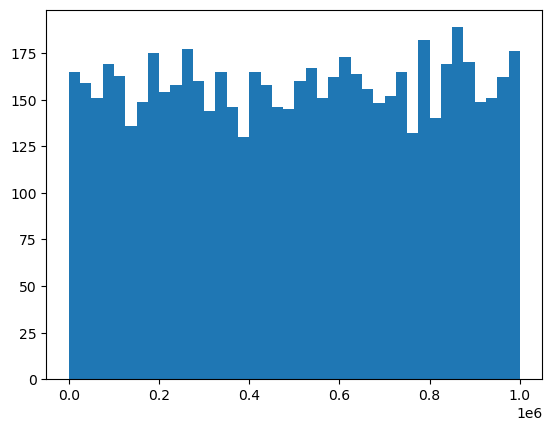

In [221]:
plt.hist(df_noticias['visitas'], bins=40)
plt.show()

---

Se han encontrado 5 errores "err" y 2 nulos (None) y se han sustituido por la mediana según su tipo de noticia. No se ha eliminado la fila pues es la única columna que no da valor, el resto de columnas puede aportar información.

### Compartir

In [222]:
# Tipo de la columna
print(df_noticias['compartir'].dtype)

object


In [223]:
# Se cambia el tipo
try:
    df_noticias['compartir'] = df_noticias['compartir'].apply(pd.to_numeric) # , errors='coerce'
except Exception as e:
    print(e)

Unable to parse string "null" at position 0


In [224]:
# Cantidad nulos
print("Cantidad de nulos",df_noticias['compartir'].isnull().sum())

# Cantidad "null"
print("Cantidad de 'null'",(df_noticias['compartir'] == 'null').sum())

# Registros nulos y "null"
df_noticias[(df_noticias['compartir'].isnull()) | (df_noticias['compartir'] == "null")][['id_noticia','compartir']]

Cantidad de nulos 15
Cantidad de 'null' 12


id_noticia compartir
136       10205      None
355       10551      None
831        1770      null
1322       2543      null
1865       3346      None
1955       3489      null
2013       3572      None
2289       3990      null
2316        403      None
2359       4096      null
2405        416      None
2829       4791      None
3395       5631      None
3553       5883      None
4359       7059      null
4401       7114      None
4744       7627      None
4838       7770      None
4887       7836      null
4914       7869      null
5208       8313      None
5445       8673      null
5575        887      null
5612       8927      None
5648       8991      null
5709       9085      null
5821       9235      None

---

#### Primero se pasarán errores a Nan

In [225]:
# Para evitar problemas se cambian los None y "null" por 0
df_noticias.loc[df_noticias['compartir'] == "null", 'compartir'] = np.nan

df_noticias['compartir'] = df_noticias['compartir'].fillna(np.nan)

len(df_noticias[df_noticias['compartir'].isnull()])

C:\Users\lcc00\AppData\Local\Temp\ipykernel_22300\295993.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_noticias['compartir'] = df_noticias['compartir'].fillna(np.nan)


27

In [226]:
# Se comprueban cuantos registros tiene 0
len(df_noticias[df_noticias['compartir'] == 0])

0

##### Se eliminan negativos en compartir

In [227]:
df_noticias['compartir'] = pd.to_numeric(df_noticias['compartir'])
df_noticias['compartir'] = df_noticias['compartir'].abs()

In [228]:
# print(df_noticias)

# Verificar si todavía hay valores negativos en la columna 'duracion'
if (df_noticias['compartir'] < 0).any():
    print("Aún hay valores negativos en la columna 'compartir'.")
else:
    print("No hay valores negativos en la columna 'compartir'.")

No hay valores negativos en la columna 'compartir'.


#### Se continua con el cambio de los nulos a la mediana según el tipo

In [229]:
# Se almacenan los indices donde las visitas se han puesto a 0 para posterior comprobación
indices_nulos = df_noticias[df_noticias['compartir'].isnull()].index
print(indices_nulos)

# df_noticias[df_noticias['compartir'] == 0]

Index([ 136,  355,  831, 1322, 1865, 1955, 2013, 2289, 2316, 2359, 2405, 2829,
       3395, 3553, 4359, 4401, 4744, 4838, 4887, 4914, 5208, 5445, 5575, 5612,
       5648, 5709, 5821],
      dtype='int64')


In [230]:
# Se crea columna con las medianas de compartir
df_noticias['medianas'] = df_noticias.groupby('tipo')['compartir'].transform('median')

df_noticias.head(3)

id_noticia                                        cont_titulo  \
0         10  Scalia’s death comes just a month before the c...   
1        100  Rachel Dolezal's brother: She's 'making up mor...   
2      10001              What A Hillary Presidency Would Bring   

                                          cont_texto compartir_tiempo  \
0  The unexpected death of Justice Antonin Scalia...              175   
1  (CNN) Ezra Dolezal would love to see his siste...              401   
2  Behind the headlines - conspiracies, cover-ups...              552   

  real_fake       autor       fuente  visitas  compartir  duracion favorito  \
0      REAL     Zoe Lee  The Insight    24881    59275.0       558     5035   
1      REAL  Nora Patel     Newsline   737334    60949.0       279     9823   
2      FAKE   Grace Liu     Newsline   563200    10094.0       432     5226   

          pais   idioma tiempo                tipo  real_fake_integer  \
0  Philippines  English    150          Entrevista                  0   
1        Italy  English    178  Reportaje especial                  0   
2        Egypt  English    244              Reseña                  1   

   real_fake_bool  medianas  
0           False   50284.5  
1           False   57194.0  
2            True   52904.0

In [231]:
# Se cambian los 0 por la mediana de su tipo de noticia
df_noticias.loc[df_noticias['compartir'].isnull(), 'compartir'] = df_noticias['medianas']

In [232]:
# Se comprueba el cambio

# for log in indices_nulos:
#     display(df_noticias.loc[log, ['tipo','compartir','medianas']])

In [233]:
df_noticias.columns

df_noticias.drop(columns = ['medianas'], inplace=True)

---

In [234]:
# Finalmente se cambia de tipo
# df_noticias['compartir'] = pd.to_numeric(df_noticias['compartir'])
df_noticias['compartir'] = df_noticias['compartir'].astype('int64')
df_noticias['compartir'].dtype

dtype('int64')

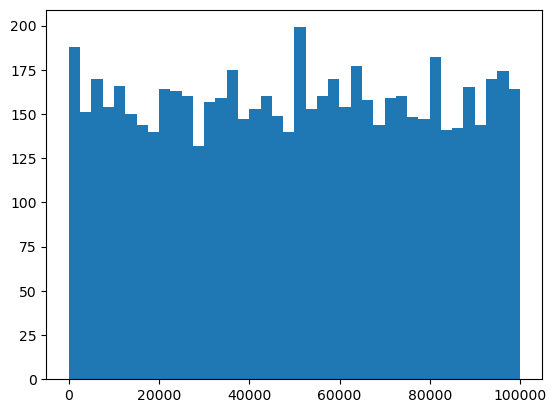

In [235]:
plt.hist(df_noticias['compartir'], bins=40)
plt.show()

### Duracion

In [236]:
try:
    df_noticias['duracion'] = df_noticias['duracion'].apply(pd.to_numeric)
except Exception as e:
    print(e)

In [237]:
# Comprobando nulos
df_noticias['duracion'].isnull().sum()

0

In [238]:
df_noticias['duracion'].dtype

dtype('int64')

No hay nulos, no hace falta cambiar valores por su mediana.

In [239]:
(df_noticias['duracion'] == 0).sum()

20

Esos 20 ceros viene predeterminados en el dataset, no son modificaciones

In [240]:
df_noticias['duracion'] = pd.to_numeric(df_noticias['duracion'])
df_noticias['duracion'].dtype

dtype('int64')

#### Se eliminan negativos de duración

In [241]:
df_noticias['duracion'] = df_noticias['duracion'].abs()

# Mostrar el DataFrame actualizado para inspeccionar visualmente
# print(df_noticias)

# Verificar si todavía hay valores negativos en la columna 'duracion'
if (df_noticias['duracion'] < 0).any():
    print("Aún hay valores negativos en la columna 'duracion'.")
else:
    print("No hay valores negativos en la columna 'duracion'.")

No hay valores negativos en la columna 'duracion'.


In [242]:
df_noticias['duracion'] = df_noticias['duracion'].astype('int64')
df_noticias['duracion'].dtype

dtype('int64')

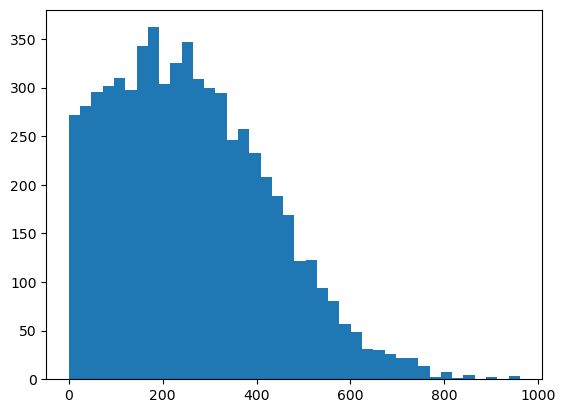

In [243]:
plt.hist(df_noticias['duracion'], bins=40)
plt.show()

### Favorito

In [244]:
df_noticias['favorito'].dtype

dtype('O')

In [245]:
df_noticias['favorito'].nunique()

4479

In [246]:
# Se comprueban nulos
print(df_noticias['favorito'].isnull().sum())
df_noticias[df_noticias['favorito'].isnull()]['favorito'].head(3)

112


7     None
11    None
62    None
Name: favorito, dtype: object

In [247]:
try:
    df_noticias['favorito'] = df_noticias['favorito'].apply(pd.to_numeric)
except Exception as e:
    print(e)

Unable to parse string "favx" at position 0


In [248]:
# Se tratan los nulos y errores para poder meter los datos en la base de datos en Mysql
print("Cantidad de nulos",df_noticias['favorito'].isnull().sum())

display(df_noticias[df_noticias['favorito'].isnull()]['favorito'].unique())
# Los errores son None

# Se visualizan esos 'favx'
print("Cantidad de 'favx'",(df_noticias['favorito'] == 'favx').sum())
display(df_noticias[df_noticias['favorito'] == "favx"].head(3))

Cantidad de nulos 112


array([None], dtype=object)

Cantidad de 'favx' 122


id_noticia                                        cont_titulo  \
56      10085        Climate Engineering And Cryosphere Collapse   
63      10092  Re: WikiLeaks: ‘How is what Bill Clinton did d...   
86      10130  The True Scandal of 2016 Was The Torture of Ch...   

                                           cont_texto compartir_tiempo  \
56  geoengineeringwatch.org Global climate enginee...               79   
63  WikiLeaks: is what Bill Clinton did different ...              188   
86  The True Scandal of 2016 Was The Torture of Ch...              241   

   real_fake           autor              fuente  visitas  compartir  \
56      FAKE  Michael Sharma  The Herald Tribune   575582      43590   
63      FAKE       Sin autor     Capital Gazette   357887      78674   
86      FAKE      Logan Wong   Sunrise Chronicle   158256      50016   

    duracion favorito     pais   idioma tiempo                tipo  \
56       109     favx  Nigeria  English    212            Análisis   
63       141     favx  Germany  English     93  Opinión del lector   
86       255     favx     Iran  English    902            Sin tipo   

    real_fake_integer  real_fake_bool  
56                  0           False  
63                  0           False  
86                  1            True

In [249]:
# Se muestran los 'favx' y los nulos 'None'
# df_noticias[(df_noticias['favorito'].isnull()) | (df_noticias['favorito'] == 'favx')]

In [250]:
# Para evitar problemas se cambian los "favx" y None por Nan
df_noticias.loc[df_noticias['favorito'] == "favx", 'favorito'] = np.nan
df_noticias.loc[df_noticias['favorito'].isnull(), 'favorito'] = np.nan

len(df_noticias[df_noticias['favorito'].isnull()])

234

In [251]:
# Se verifica si hay valores 0 predeterminados en la base de datos
len(df_noticias[df_noticias['favorito'] == '0'])

0

#### Valores menores que 1 que se convertirán en 0 cuando la columna se pase a tipo int64

In [252]:
# Valores menores que 1 que se convertirán en 0 cuando la columna se pase a tipo int64
print(df_noticias['favorito'].dtype)
df_noticias.loc[df_noticias['favorito'] < 1, ['id_noticia', 'favorito']]

object


id_noticia favorito
36        10057     0.73
49        10072     0.73
108       10161     0.73
187       10286     0.73
191        1029     0.73
...         ...      ...
6144       9706     0.73
6174       9753     0.73
6238        985     0.73
6298        994     0.73
6328       9989     0.73

[126 rows x 2 columns]

In [253]:
# Comprobación
df_noticias[df_noticias['favorito']==0.73].groupby('real_fake').agg(recuento_favoritos_073=('favorito','count'))

recuento_favoritos_073
real_fake                        
FAKE                           59
REAL                           67

#### Se eliminan valores negativos de favorito

In [254]:
df_noticias['favorito'] = df_noticias['favorito'].apply(pd.to_numeric)

print("Cantidad de registros negativos",(df_noticias['favorito'] < 0).sum())
# df_noticias[df_noticias['favorito'] < 0].head(3)

Cantidad de registros negativos 0


In [255]:
# Se verifica si hay valores 0 predeterminados en la base de datos
len(df_noticias[df_noticias['favorito'] == 0])

0

In [256]:
# print(df_noticias)

# Verificar si todavía hay valores negativos en la columna 'favorito'
if (df_noticias['favorito'] < 0).any():
    print("Aún hay valores negativos en la columna 'favorito'.")
else:
    print("No hay valores negativos en la columna 'favorito'.")

No hay valores negativos en la columna 'favorito'.


#### Se prodece a cambiar los Nan (que son los registros nulos y erróneos) por la mediana según su tipo de noticia

In [257]:
# Se almacenan los indices donde los favoritos son 0 para comprobalos después del cambio
indices_nulos = df_noticias[df_noticias['favorito'].isnull()].index
print(len(indices_nulos))
print(indices_nulos)

# df_noticias[df_noticias['favorito'].isnull()].head(3)

234
Index([   7,   11,   56,   62,   63,   85,   86,  131,  183,  205,
       ...
       6040, 6089, 6104, 6111, 6138, 6155, 6164, 6269, 6320, 6331],
      dtype='int64', length=234)


In [258]:
# Se crea columna con las medianas de favorito
df_noticias['medianas'] = df_noticias.groupby('tipo')['favorito'].transform('median')

df_noticias.head(3)

id_noticia                                        cont_titulo  \
0         10  Scalia’s death comes just a month before the c...   
1        100  Rachel Dolezal's brother: She's 'making up mor...   
2      10001              What A Hillary Presidency Would Bring   

                                          cont_texto compartir_tiempo  \
0  The unexpected death of Justice Antonin Scalia...              175   
1  (CNN) Ezra Dolezal would love to see his siste...              401   
2  Behind the headlines - conspiracies, cover-ups...              552   

  real_fake       autor       fuente  visitas  compartir  duracion  favorito  \
0      REAL     Zoe Lee  The Insight    24881      59275       558    5035.0   
1      REAL  Nora Patel     Newsline   737334      60949       279    9823.0   
2      FAKE   Grace Liu     Newsline   563200      10094       432    5226.0   

          pais   idioma tiempo                tipo  real_fake_integer  \
0  Philippines  English    150          Entrevista                  0   
1        Italy  English    178  Reportaje especial                  0   
2        Egypt  English    244              Reseña                  1   

   real_fake_bool  medianas  
0           False    4988.0  
1           False    4949.5  
2            True    5060.0

In [259]:
# Se cambian los 0 por la mediana de su tipo de noticia

df_noticias.loc[df_noticias['favorito'].isnull(), 'favorito'] = df_noticias['medianas']

In [260]:
df_noticias.groupby('tipo').agg(mediana=('favorito','median'))

mediana
tipo                              
Análisis                    5003.0
Artículo de investigación   5202.0
Artículo de opinión         5324.0
Carta al editor             4977.0
Columna                     5317.5
Columna de humor            5238.5
Crítica                     4801.0
Crónica                     4450.0
Editorial                   5104.0
Entrevista                  4988.0
Entrevista a fondo          4991.0
Entrevista exclusiva        4666.5
Noticia de última hora      4828.5
Noticia destacada           4660.0
Noticia internacional       5003.5
Noticia local               4977.0
Opinión del lector          4866.0
Reportaje                   4696.5
Reportaje especial          4949.5
Reseña                      5060.0
Sin tipo                    4456.5

In [261]:
# Se comprueba el cambio con los indices de los registros que antes tenia 0 en favorito

# for log in indices_nulos:
#     display(df_noticias.loc[log, ['tipo','favorito','medianas']])

In [262]:
# Se elimina la columna medias, ya no es necesaria
df_noticias.columns

df_noticias.drop(columns = ['medianas'], inplace=True)

---

In [263]:
print("Nulos",df_noticias['favorito'].isnull().sum())

# Se cambia a tipo entero
df_noticias['favorito'] = df_noticias['favorito'].astype('int64')

print(f"Cantidad de registros con 0 favoritos {len(df_noticias[df_noticias['favorito']==0])}")

print("Tipo de la columna",df_noticias['favorito'].dtype)

Nulos 0
Cantidad de registros con 0 favoritos 126
Tipo de la columna int64


'favx' 122 y None 112 cambiados por su mediana según tipo de noticia  

Al pasar la columna a tipo int64 los valores 0.7 que venían en el dataframe se convierten en ceros

#### Comprobación de la veracidad de esos registros con 0 favorito

In [264]:
df_noticias[df_noticias['favorito'] == 0].groupby('real_fake').agg(recuento_noticias=('id_noticia','count')).reset_index()

real_fake  recuento_noticias
0      FAKE                 59
1      REAL                 67

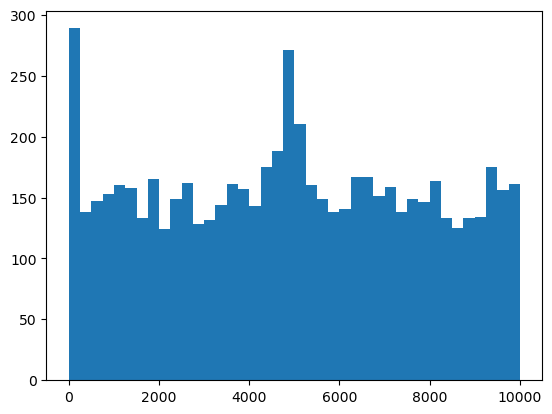

In [265]:
plt.hist(df_noticias['favorito'], bins=40)
plt.show()

### Tiempo

In [266]:
df_noticias['tiempo'].dtype

dtype('O')

#### Se crea columna para usar en los modelos de Machine Learning

In [267]:
# Se crea columna para usar en los modelos de Machine Learning
df_noticias['tiempo_encode'] = df_noticias['tiempo'].astype(int) *3600 # cantidad de segundos en una hora

print(df_noticias['tiempo_encode'].dtype)
print(df_noticias['tiempo_encode'].head(3))

int32
0    540000
1    640800
2    878400
Name: tiempo_encode, dtype: int32


In [268]:
# Se comprueba que no hay valores distintos a nulos que puedan dar fallo
df_noticias['tiempo'] = df_noticias['tiempo'].apply(pd.to_numeric)

In [269]:
df_noticias['tiempo'].isnull().sum()

0

---
#### Se pasa a un formato de fecha

In [270]:
# Se crea función cambiar_a_fecha
def cambiar_a_fecha(x):
    fecha_base = pd.to_datetime('2022-9-1 07')
    horas = pd.Timedelta(hours=x)
    fecha_final = (fecha_base + horas)
    return fecha_final

In [271]:
df_noticias['tiempo'] = df_noticias['tiempo'].apply(cambiar_a_fecha)

df_noticias['tiempo'].head(3)

0   2022-09-07 13:00:00
1   2022-09-08 17:00:00
2   2022-09-11 11:00:00
Name: tiempo, dtype: datetime64[ns]

0   2022-09-04 18:00:00  
1   2022-09-15 11:00:00  
2   2022-10-04 04:00:00  

In [272]:
df_noticias['tiempo'] = pd.to_datetime(df_noticias['tiempo'])

In [273]:
df_noticias['tiempo'].dtype

dtype('<M8[ns]')

---

### Compartir tiempo

In [274]:
df_noticias['compartir_tiempo'].dtype

dtype('O')

In [275]:
# Se crea columna para usar en los modelos de Machine Learning
df_noticias['tiempo_comparticion_encode'] = df_noticias['compartir_tiempo'].astype(int) *3600 # cantidad de segundos en una hora

print(df_noticias['tiempo_comparticion_encode'].dtype)
print(df_noticias['tiempo_comparticion_encode'].head(3))

int32
0     630000
1    1443600
2    1987200
Name: tiempo_comparticion_encode, dtype: int32


In [276]:
df_noticias['compartir_tiempo'] = df_noticias['compartir_tiempo'].astype('int')

In [277]:
df_noticias['compartir_tiempo'].isnull().sum()

0

---
Se pasa a un formato de fecha

In [278]:
# Se usa la función cambiar_a_fecha creada en el apartado anterior de tiempo
try:
    df_noticias['compartir_tiempo'] = df_noticias['compartir_tiempo'].apply(cambiar_a_fecha)
except:
    print("La columna ya ha sido cambiada")

In [279]:
df_noticias['compartir_tiempo'] = pd.to_datetime(df_noticias['compartir_tiempo'])

In [280]:
df_noticias['compartir_tiempo'].dtype

dtype('<M8[ns]')

---

In [281]:
df_noticias['compartir_tiempo'].nunique()

959

### Tiempo mayor que tiempo compartido

In [282]:
print(f"Registros donde tiempo es menor que compartir_tiempo {len(df_noticias[df_noticias['tiempo'] > df_noticias['compartir_tiempo']])}")
df_noticias[df_noticias['tiempo'] > df_noticias['compartir_tiempo']].head(3)

Registros donde tiempo es menor que compartir_tiempo 3169


id_noticia                                        cont_titulo  \
3      10004  Hillary Endorsed Donald Trump for President Ac...   
4      10006  US-led coalition killed 300 Syrian civilians i...   
6      10009  Putin: Use of 'mythical' Russian military thre...   

                                          cont_texto    compartir_tiempo  \
3  Hillary Endorsed Donald Trump for President Ac... 2022-09-07 06:00:00   
4  RT October 26, 2016 Around 300 civilians were ... 2022-09-05 12:00:00   
6  vladimir putin , Valdai , sochi , RBTH Daily R... 2022-09-17 16:00:00   

  real_fake           autor            fuente  visitas  compartir  duracion  \
3      FAKE       Lily Wang  Insider Insights   883120      30962       171   
4      FAKE    Madison Wong       Times Today   870165      51808       166   
6      FAKE  Victoria Singh    Global Gazette   260185      21433       222   

   favorito      pais   idioma              tiempo                    tipo  \
3      5078    Mexico  English 2022-09-24 14:00:00                 Crítica   
4      6424  Pakistan  English 2022-09-30 22:00:00  Noticia de última hora   
6      3849  Colombia  English 2022-10-07 20:00:00  Noticia de última hora   

   real_fake_integer  real_fake_bool  tiempo_encode  \
3                  0           False        2012400   
4                  1            True        2559600   
6                  0           False        3157200   

   tiempo_comparticion_encode  
3                      514800  
4                      363600  
6                     1414800

Se da por hecho que se introdujeron los datos de forma errónea así que se intercambian los valores de tiempo y compartir

In [283]:
# Comprobación antes del cambio
display(df_noticias.loc[2, ['tiempo', 'compartir_tiempo']])
display(df_noticias.loc[5, ['tiempo', 'compartir_tiempo']])
display(df_noticias.loc[8, ['tiempo', 'compartir_tiempo']])

tiempo              2022-09-11 11:00:00
compartir_tiempo    2022-09-24 07:00:00
Name: 2, dtype: object

tiempo              2022-10-07 03:00:00
compartir_tiempo    2022-10-08 23:00:00
Name: 5, dtype: object

tiempo              2022-09-10 04:00:00
compartir_tiempo    2022-10-02 08:00:00
Name: 8, dtype: object

In [284]:
# Se intercambia el tiempo y compartir_tiempo en los registros erróneos

# Se crea columna auxiliar para mantener el tiempo original
df_noticias['col_aux'] = df_noticias['tiempo']
# Se filtran los indices de los registros erróneos
indices_erroneos = df_noticias.loc[df_noticias['tiempo'] > df_noticias['compartir_tiempo']].index

# Se intercambian los valores
df_noticias.loc[indices_erroneos,'tiempo'] = df_noticias.loc[indices_erroneos,'compartir_tiempo']
df_noticias.loc[indices_erroneos,'compartir_tiempo'] = df_noticias.loc[indices_erroneos,'col_aux']

# Finalmente se elimina la columna auxiliar
df_noticias.drop('col_aux', axis=1, inplace=True)

print(len(df_noticias.loc[df_noticias['tiempo'] > df_noticias['compartir_tiempo']]))

0


In [285]:
# Comprobación después del cambio con los registros con la fecha cambiada

print(f"Registros con tiempo mayor que tiempo compartido: {len(df_noticias.loc[df_noticias['tiempo'] > df_noticias['compartir_tiempo']])}")
display(df_noticias.loc[2, ['tiempo', 'compartir_tiempo']])
display(df_noticias.loc[5, ['tiempo', 'compartir_tiempo']])
display(df_noticias.loc[8, ['tiempo', 'compartir_tiempo']])

Registros con tiempo mayor que tiempo compartido: 0


tiempo              2022-09-11 11:00:00
compartir_tiempo    2022-09-24 07:00:00
Name: 2, dtype: object

tiempo              2022-10-07 03:00:00
compartir_tiempo    2022-10-08 23:00:00
Name: 5, dtype: object

tiempo              2022-09-10 04:00:00
compartir_tiempo    2022-10-02 08:00:00
Name: 8, dtype: object

### Resumen numéricas

In [286]:
df_noticias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6333 entries, 0 to 6334
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_noticia                  6333 non-null   object        
 1   cont_titulo                 6333 non-null   object        
 2   cont_texto                  6333 non-null   object        
 3   compartir_tiempo            6333 non-null   datetime64[ns]
 4   real_fake                   6333 non-null   object        
 5   autor                       6333 non-null   object        
 6   fuente                      6333 non-null   object        
 7   visitas                     6333 non-null   int64         
 8   compartir                   6333 non-null   int64         
 9   duracion                    6333 non-null   int64         
 10  favorito                    6333 non-null   int64         
 11  pais                        6333 non-null   object        
 1

In [287]:
print((df_noticias['visitas'] == 0).sum())
print((df_noticias['compartir'] == 0).sum())
print((df_noticias['duracion'] == 0).sum())
print((df_noticias['favorito'] == 0).sum())

0
0
20
126


In [288]:
df_noticias.head(3)

id_noticia                                        cont_titulo  \
0         10  Scalia’s death comes just a month before the c...   
1        100  Rachel Dolezal's brother: She's 'making up mor...   
2      10001              What A Hillary Presidency Would Bring   

                                          cont_texto    compartir_tiempo  \
0  The unexpected death of Justice Antonin Scalia... 2022-09-08 14:00:00   
1  (CNN) Ezra Dolezal would love to see his siste... 2022-09-18 00:00:00   
2  Behind the headlines - conspiracies, cover-ups... 2022-09-24 07:00:00   

  real_fake       autor       fuente  visitas  compartir  duracion  favorito  \
0      REAL     Zoe Lee  The Insight    24881      59275       558      5035   
1      REAL  Nora Patel     Newsline   737334      60949       279      9823   
2      FAKE   Grace Liu     Newsline   563200      10094       432      5226   

          pais   idioma              tiempo                tipo  \
0  Philippines  English 2022-09-07 13:00:00          Entrevista   
1        Italy  English 2022-09-08 17:00:00  Reportaje especial   
2        Egypt  English 2022-09-11 11:00:00              Reseña   

   real_fake_integer  real_fake_bool  tiempo_encode  \
0                  0           False         540000   
1                  0           False         640800   
2                  1            True         878400   

   tiempo_comparticion_encode  
0                      630000  
1                     1443600  
2                     1987200

array([[<Axes: title={'center': 'visitas'}>,
        <Axes: title={'center': 'compartir'}>,
        <Axes: title={'center': 'duracion'}>],
       [<Axes: title={'center': 'favorito'}>,
        <Axes: title={'center': 'real_fake_integer'}>,
        <Axes: title={'center': 'tiempo_encode'}>],
       [<Axes: title={'center': 'tiempo_comparticion_encode'}>, <Axes: >,
        <Axes: >]], dtype=object)

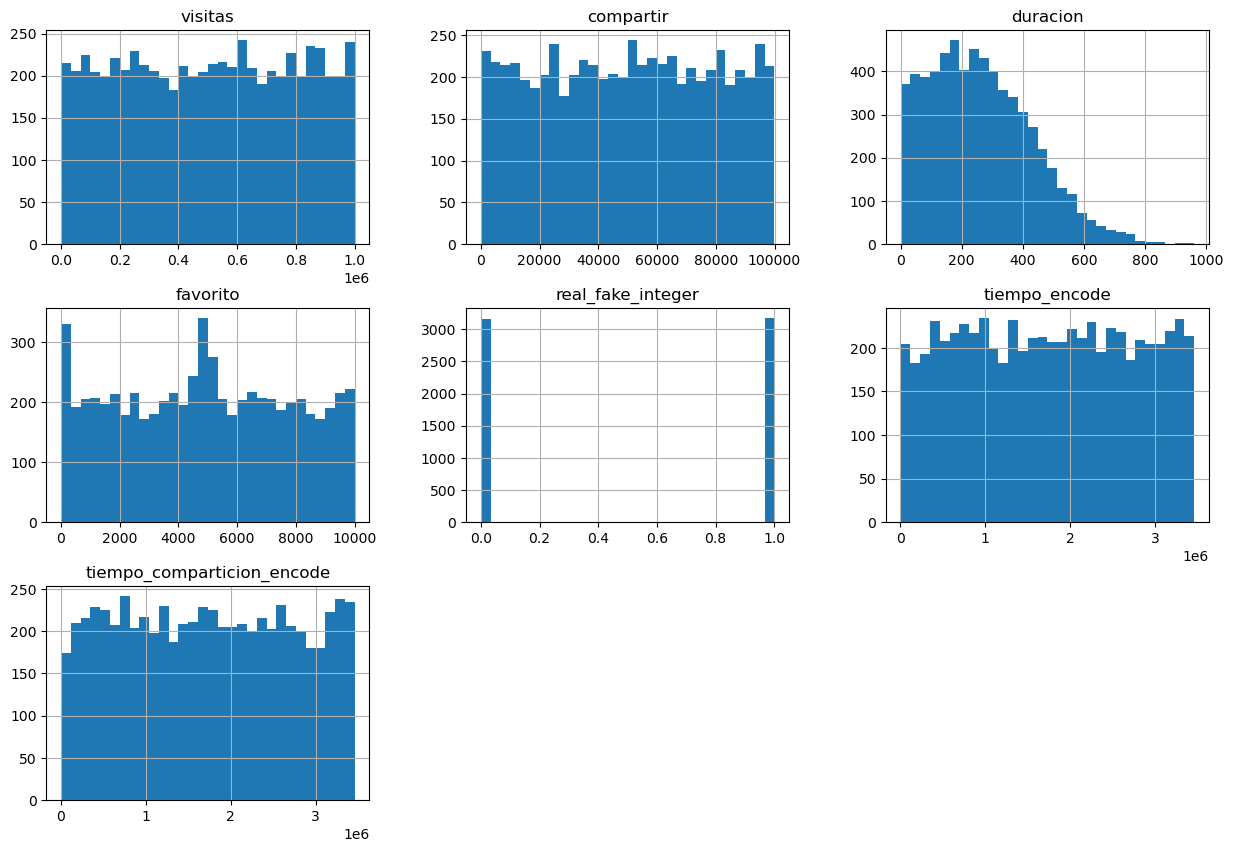

In [289]:
metricas = df_noticias.select_dtypes(include=np.number)
metricas.hist(bins=30, figsize= (15,10))

In [290]:
df_noticias.describe().round(2)

compartir_tiempo    visitas  compartir  duracion  \
count                           6333    6333.00    6333.00   6333.00   
mean   2022-09-27 22:12:17.849360384  502939.12   50014.13    263.04   
min              2022-09-01 19:00:00       3.00       1.00      0.00   
25%              2022-09-21 01:00:00  250705.00   24926.00    132.00   
50%              2022-09-29 11:00:00  507980.00   50641.00    246.00   
75%              2022-10-06 02:00:00  755690.00   74860.00    374.00   
max              2022-10-11 07:00:00  999864.00   99951.00    961.00   
std                              NaN  290714.75   29001.67    166.96   

       favorito                         tiempo  real_fake_integer  \
count   6333.00                           6333             6333.0   
mean    4898.15  2022-09-14 19:24:16.939838720                0.5   
min        0.00            2022-09-01 08:00:00                0.0   
25%     2451.00            2022-09-06 20:00:00                0.0   
50%     4890.00            2022-09-12 23:00:00                1.0   
75%     7308.00            2022-09-21 13:00:00                1.0   
max     9998.00            2022-10-10 16:00:00                1.0   
std     2891.00                            NaN                0.5   

       tiempo_encode  tiempo_comparticion_encode  
count        6333.00                     6333.00  
mean      1738594.22                  1730400.57  
min          3600.00                     3600.00  
25%        874800.00                   853200.00  
50%       1738800.00                  1720800.00  
75%       2599200.00                  2588400.00  
max       3456000.00                  3456000.00  
std        996047.72                   998695.95

## Duplicados  
No se buscarán duplicados en la métricas, ya que tiene sentido tener duraciones iguales, por ejemplo.   
Se mantendrán los duplicados para entrenar el modelo con y sin duplicados

In [291]:
print(df_noticias.duplicated().sum())

0


In [292]:
print(df_noticias.nunique())

id_noticia                    6333
cont_titulo                   6254
cont_texto                    6057
compartir_tiempo               889
real_fake                        2
autor                           35
fuente                          33
visitas                       6310
compartir                     6094
duracion                       726
favorito                      4488
pais                            35
idioma                           1
tiempo                         895
tipo                            21
real_fake_integer                2
real_fake_bool                   2
tiempo_encode                  958
tiempo_comparticion_encode     959
dtype: int64


In [293]:
# Cantidad de duplicados por columna
columnas = df_noticias.columns.tolist()
print("Cantidad de duplicados por columna\n")
for col in columnas:
    print(col, df_noticias[col].duplicated().sum())

Cantidad de duplicados por columna

id_noticia 0
cont_titulo 79
cont_texto 276
compartir_tiempo 5444
real_fake 6331
autor 6298
fuente 6300
visitas 23
compartir 239
duracion 5607
favorito 1845
pais 6298
idioma 6332
tiempo 5438
tipo 6312
real_fake_integer 6331
real_fake_bool 6331
tiempo_encode 5375
tiempo_comparticion_encode 5374


### Cont_titulo

In [294]:
# Comprobar si todos los duplicados son Fake
duplicados_titulo = df_noticias[df_noticias['cont_titulo'].duplicated()]
print("Cantidad de titulos duplicados totales",len(duplicados_titulo))

print("Duplicados FAKE",len(duplicados_titulo.loc[duplicados_titulo['real_fake'] == 'FAKE', 'real_fake']))
print("Duplicados REAL",len(duplicados_titulo.loc[duplicados_titulo['real_fake'] == 'REAL', 'real_fake']))
# En los duplicados tenemos FAKE Y REAL


Cantidad de titulos duplicados totales 79
Duplicados FAKE 57
Duplicados REAL 22


In [295]:
# Por ciento de duplicados en titulos
print(f" {round((len(duplicados_titulo) / df_noticias.shape[0])*100, 2)}% de duplicados en titulos")

 1.25% de duplicados en titulos


In [296]:
# Se comprueban duplicados de titulos
filtro_duplicados = df_noticias[df_noticias['cont_titulo'].duplicated(keep=False)].sort_values(by=['cont_titulo', 'compartir_tiempo']) # Se usa keep=False para mostrar todas las ocurrencias de registros duplicados, es decir, la primera vez que aparece la noticia y el duplicado.

filtro_duplicados.head(10)

id_noticia                                        cont_titulo  \
157       10241  18 State Swat Team Drill In Prep for Backlash ...   
4723       7597  18 State Swat Team Drill In Prep for Backlash ...   
3615       5966        6 Natural Herbs To Prevent Mental Disorders   
5124       8175        6 Natural Herbs To Prevent Mental Disorders   
5790       9194  After terrorizing America with Zika scaremonge...   
139       10210  After terrorizing America with Zika scaremonge...   
5117       8165                     All Governments Lie, The Movie   
4252       6898                     All Governments Lie, The Movie   
6309       9957                          American Dream, Revisited   
4078       6667                          American Dream, Revisited   

                                             cont_texto    compartir_tiempo  \
157   Previous 18 State Swat Team Drill In Prep for ... 2022-09-28 01:00:00   
4723  Paul Martin, through his sources has learned o... 2022-10-08 04:00:00   
3615  6 Natural Herbs To Prevent Mental Disorders An... 2022-09-23 13:00:00   
5124  By Alma Causey When it comes to our health, we... 2022-10-07 00:00:00   
5790  Site Map Select Page After terrorizing America... 2022-09-13 03:00:00   
139   March 2, 2016: Zika PAYDAY! Obama wants to fun... 2022-09-23 19:00:00   
5117  October Boomerang David Swanson is an author, ... 2022-09-24 20:00:00   
4252  Posted on October 30, 2016 by DavidSwanson Pic... 2022-09-29 23:00:00   
6309  Will Trump pull a Brexit times ten? What would... 2022-09-10 15:00:00   
4078  Share This: BY PEPE ESCOBAR W ill Trump pull a... 2022-10-10 18:00:00   

     real_fake            autor               fuente  visitas  compartir  \
157       FAKE       Logan Wong   World News Network   969592      25332   
4723      FAKE        Avery Kim    Sunrise Chronicle   655692      48372   
3615      FAKE        Lily Wang            Newsflash   645245      32039   
5124      FAKE      Ella Sharma         Morning Star   502092      14607   
5790      FAKE        Sin autor  Voice of the Nation   305739      33871   
139       FAKE        Aria Shah            The Pulse   239186      81393   
5117      FAKE        Lily Wang         Daily Beacon   617535      11944   
4252      FAKE  Isabella Nguyen  Voice of the Nation   486280      90125   
6309      FAKE    Samantha Chen     National Courier   921204      38930   
4078      FAKE        Aria Shah          Press Pulse   962227      91097   

      duracion  favorito            pais   idioma              tiempo  \
157        324      1476  United Kingdom  English 2022-09-15 09:00:00   
4723        91      9351        DR Congo  English 2022-09-09 00:00:00   
3615       432      1496        Pakistan  English 2022-09-13 04:00:00   
5124       198      4828          Brazil  English 2022-09-13 21:00:00   
5790       266      9271        Pakistan  English 2022-09-11 12:00:00   
139        128      5808            Iran  English 2022-09-17 18:00:00   
5117       186      8259       Indonesia  English 2022-09-16 15:00:00   
4252       222       309        Thailand  English 2022-09-26 04:00:00   
6309       421      3354          Uganda  English 2022-09-08 04:00:00   
4078       490      3525           Egypt  English 2022-10-03 11:00:00   

                        tipo  real_fake_integer  real_fake_bool  \
157            Noticia local                  1            True   
4723         Carta al editor                  1            True   
3615  Noticia de última hora                  1            True   
5124  Noticia de última hora                  0           False   
5790   Noticia internacional                  0           False   
139       Entrevista a fondo                  0           False   
5117      Entrevista a fondo                  0           False   
4252                 Columna                  1            True   
6309               Editorial                  1            True   
4078  Noticia de última hora                  1      

### Cont_text

In [297]:
print("Cantidad de duplicados",df_noticias['cont_texto'].duplicated().sum())
duplicados_texto = df_noticias[df_noticias['cont_texto'].duplicated()].sort_values(by='cont_texto')
duplicados_texto

Cantidad de duplicados 276


id_noticia                                        cont_titulo  \
4893       7843  BREAKING: Obama Says There Were No Scandals Du...   
3382       5608     Fighting Ghost Fascists While Aiding Real Ones   
6155       9725  Hillary’s “Big Tent” is Obama’s “Grand Bargain...   
3832       6279                     When Charlottesville Was Nuked   
1563       2906      US faces calls to ‘walk away’ from Iran talks   
...         ...                                                ...   
5549       8825                   Anonymous World War 3 Has Begun!   
4064       6647  WORLD WAR 3 is Now * HILLARY Clinton Is Mushro...   
6207       9799  WORLD WAR 3 Hillary Clinton Foundation Holocau...   
4131       6747  Joel Skousen on Scenario World War 3 NWO 2016 ...   
4349       7046  BUILD UP WW3 World War 3 Is Coming Current Sit...   

                                             cont_texto    compartir_tiempo  \
4893  0 comments Obama was speaking to donors at a p... 2022-09-27 12:00:00   
3382  2016 presidential campaign by BAR executive ed... 2022-10-01 07:00:00   
6155  2016 presidential campaign by BAR executive ed... 2022-09-18 00:00:00   
3832  A 23 kiloton tower shot called BADGER, fired o... 2022-10-10 01:00:00   
1563  A leading Republican critic of the Iranian nuc... 2022-10-07 09:00:00   
...                                                 ...                 ...   
5549  source Add To The Conversation Using Facebook ... 2022-09-18 01:00:00   
4064  source Add To The Conversation Using Facebook ... 2022-09-26 03:00:00   
6207  source Add To The Conversation Using Facebook ... 2022-10-05 10:00:00   
4131  source Add To The Conversation Using Facebook ... 2022-09-28 01:00:00   
4349  source Add To The Conversation Using Facebook ... 2022-09-22 05:00:00   

     real_fake           autor          fuente  visitas  compartir  duracion  \
4893      FAKE      Caleb Shah    Daily Beacon   742051      92157       675   
3382      FAKE      Nora Patel    The Informer   353226      55899        80   
6155      FAKE    Madison Wong        Newsline   528827      93529       524   
3832      FAKE  Gabriel Santos      Metro News   261735      89464        12   
1563      REAL       Aria Shah  Global Insight   288122      18752       441   
...        ...             ...             ...      ...        ...       ...   
5549      FAKE       Sin autor  Global Insight   464081      94274         3   
4064      FAKE  Maxwell Rivera      Urban News   924454      65573        87   
6207      FAKE         Zoe Lee    Daily Digest    41246      36924       175   
4131      FAKE       Lily Wang    Daily Beacon   994580      77469         4   
4349      FAKE       Mia Gupta    Morning Star   302984      77189        81   

      favorito         pais   idioma              tiempo  \
4893      5382      Nigeria  English 2022-09-11 15:00:00   
3382      6160         Iran  English 2022-09-27 18:00:00   
6155      5324  Philippines  English 2022-09-03 16:00:00   
3832      9004     Pakistan  English 2022-09-21 21:00:00   
1563      7229         Iran  English 2022-10-04 23:00:00   
...        ...          ...      ...                 ...   
5549      3020   Bangladesh  English 2022-09-15 11:00:00   
4064         0  Philippines  English 2022-09-25 08:00:00   
6207      9280      Vietnam  English 2022-09-05 08:00:00   
4131      5991      Vietnam  English 2022-09-02 10:00:00   
4349      3663  Philippines  English 2022-09-16 23:00:00   

                        tipo  real_fake_integer  real_fake_bool  \
4893                Sin tipo                  0           False   
3382        Columna de humor                  1            True   
6155     Artículo de opinión                  1            True   
3832                 Columna                  0           False   
1563        Columna de humor                  0           False   
...                      ...                ...             ...   
5549      Reportaje especial                  1            True 

In [298]:
# Comprobar si todos los duplicados son Fake
duplicados_texto = df_noticias[df_noticias['cont_texto'].duplicated()]
print("Cantidad de textos duplicados totales",len(duplicados_texto))

print("Duplicados FAKE",len(duplicados_texto.loc[duplicados_texto['real_fake'] == 'FAKE', 'real_fake']))
print("Duplicados REAL",len(duplicados_texto.loc[duplicados_texto['real_fake'] == 'REAL', 'real_fake']))
# En los duplicados tenemos FAKE Y REAL

Cantidad de textos duplicados totales 276
Duplicados FAKE 94
Duplicados REAL 182


In [299]:
# Porcentaje de duplicados en textos
print(f" {round((len(duplicados_texto) / df_noticias.shape[0])*100, 2)}% de duplicados en textos")

 4.36% de duplicados en textos


### Fuente, autor, tipo, idioma, pais

In [300]:
print(df_noticias['fuente'].duplicated().sum())
print(df_noticias['autor'].duplicated().sum())
print(df_noticias['tipo'].duplicated().sum())
print(df_noticias['idioma'].duplicated().sum())
print(df_noticias['pais'].duplicated().sum())

6300
6298
6312
6332
6298


### Tiempo y compartir tiempo

In [301]:
print(df_noticias['tiempo'].duplicated().sum())
print(df_noticias['compartir_tiempo'].duplicated().sum())

5438
5444


Esto es normal

Se mantendrán los duplicados para entrenar el modelo con y sin duplicados

### Df sin duplicados para posterior uso en el modelo


In [302]:
# Duplicados en texto y titulos, duplicados en texto o titulo
dup_tex_y_tit = df_noticias[(df_noticias['cont_texto'].duplicated()) & (df_noticias['cont_titulo'].duplicated())]
print(f"Duplicados en texto y titulo {len(dup_tex_y_tit)}")

duplicados_totales = df_noticias[(df_noticias['cont_texto'].duplicated()) | (df_noticias['cont_titulo'].duplicated())]
print(f"Duplicados en texto o titulo {len(duplicados_totales)}")

Duplicados en texto y titulo 30
Duplicados en texto o titulo 325


In [303]:
# ¿Estan los dupicados de texto y titulo en duplicados de texto y titulo?
print(len(dup_tex_y_tit.isin(duplicados_totales)))
dup_tex_y_tit.isin(duplicados_totales).sum()

30


id_noticia                    30
cont_titulo                   30
cont_texto                    30
compartir_tiempo              30
real_fake                     30
autor                         30
fuente                        30
visitas                       30
compartir                     30
duracion                      30
favorito                      30
pais                          30
idioma                        30
tiempo                        30
tipo                          30
real_fake_integer             30
real_fake_bool                30
tiempo_encode                 30
tiempo_comparticion_encode    30
dtype: int64

Esto quiere decir que todos los registros que tienen titulo y texto duplicados ya se recogen en la variable duplicados totales donde tambien aparecen registros que tienen o el titulo o el texto duplicados

In [304]:
# Se obtienen los indices de los duplicados totales para una posterior comprobación
duplicados_totales.index

Index([ 123,  199,  242,  263,  475,  508,  518,  519,  532,  535,
       ...
       6204, 6207, 6233, 6263, 6283, 6291, 6309, 6317, 6320, 6334],
      dtype='int64', length=325)

In [305]:
# Se visualizan duplicados en texto y titulo
df_noticias[(df_noticias['cont_texto'].duplicated(keep=False)) & (df_noticias['cont_titulo'].duplicated(keep=False))].sort_values(by='cont_texto').head(4)

id_noticia                                        cont_titulo  \
253       10399     Fighting Ghost Fascists While Aiding Real Ones   
3382       5608     Fighting Ghost Fascists While Aiding Real Ones   
6155       9725  Hillary’s “Big Tent” is Obama’s “Grand Bargain...   
6105       9652  Hillary’s “Big Tent” is Obama’s “Grand Bargain...   

                                             cont_texto    compartir_tiempo  \
253   2016 presidential campaign by BAR executive ed... 2022-10-04 02:00:00   
3382  2016 presidential campaign by BAR executive ed... 2022-10-01 07:00:00   
6155  2016 presidential campaign by BAR executive ed... 2022-09-18 00:00:00   
6105  2016 presidential campaign by BAR executive ed... 2022-09-30 10:00:00   

     real_fake         autor             fuente  visitas  compartir  duracion  \
253       FAKE  Madison Wong  Sunrise Chronicle   390442      71772        67   
3382      FAKE    Nora Patel       The Informer   353226      55899        80   
6155      FAKE  Madison Wong           Newsline   528827      93529       524   
6105      FAKE     Sin autor         Urban News   923239      59581       313   

      favorito           pais   idioma              tiempo  \
253       8301  United States  English 2022-09-22 19:00:00   
3382      6160           Iran  English 2022-09-27 18:00:00   
6155      5324    Philippines  English 2022-09-03 16:00:00   
6105      6859          Japan  English 2022-09-03 01:00:00   

                     tipo  real_fake_integer  real_fake_bool  tiempo_encode  \
253               Crítica                  0           False        2833200   
3382     Columna de humor                  1            True        2286000   
6155  Artículo de opinión                  1            True         205200   
6105        Noticia local                  0           False        2516400   

      tiempo_comparticion_encode  
253                      1857600  
3382                     2592000  
6155                     1443600  
6105                      151200

In [306]:
# Se visualizan duplicados en texto o titulo
df_noticias[(df_noticias['cont_texto'].duplicated(keep=False)) | (df_noticias['cont_titulo'].duplicated(keep=False))].sort_values(by='cont_texto').head(4)

id_noticia                                        cont_titulo  \
3205       5335                        Michael Moore Owes Me $4.99   
735        1628                     Democratic debate: 6 takeaways   
553        1351  Democratic debate: 's Reality Check team inspe...   
3674       6054  BREAKING: Obama: “We Have Not Had a Major Scan...   

                                             cont_texto    compartir_tiempo  \
3205  (128 fans) - Advertisement - Michael Moore has... 2022-09-17 06:00:00   
735   (CNN) Hillary Clinton , Bernie Sanders and Mar... 2022-10-09 14:00:00   
553   (CNN) The Democratic candidates for president ... 2022-09-23 13:00:00   
3674  0 comments Obama was speaking to donors at a p... 2022-09-30 05:00:00   

     real_fake           autor              fuente  visitas  compartir  \
3205      FAKE       Sin autor  The Daily Dispatch   879211      63312   
735       REAL  Michael Sharma     Express Tribune   626624      11302   
553       REAL    Madison Wong           City Beat   617748      19090   
3674      FAKE       Sin autor            Newsline   334581        572   

      duracion  favorito       pais   idioma              tiempo  \
3205       243      2255    Germany  English 2022-09-08 20:00:00   
735        232      1153  Argentina  English 2022-09-18 04:00:00   
553        102      2263    Nigeria  English 2022-09-22 16:00:00   
3674         9      6282     Russia  English 2022-09-07 11:00:00   

                    tipo  real_fake_integer  real_fake_bool  tiempo_encode  \
3205           Editorial                  1            True        1378800   
735            Editorial                  0           False        1458000   
553   Entrevista a fondo                  1            True        1846800   
3674            Análisis                  1            True        2498400   

      tiempo_comparticion_encode  
3205                      651600  
735                      3308400  
553                      1922400  
3674                      532800

In [307]:
# Se crea df sin duplicados
df_noticias_sin_duplicados = df_noticias.drop(duplicados_totales.index, axis=0)
print("Sin duplicados",len(df_noticias_sin_duplicados))
print("Con duplicados",len(df_noticias))

Sin duplicados 6008
Con duplicados 6333


In [308]:
# Se comprueba que se han quitado
for indice in duplicados_totales.index:
    if indice in df_noticias_sin_duplicados:
        print("Fallo")

# No printea nada, se ha hecho bien

In [309]:
# Comprobar si se conserva la proporción de la variable objetivo
print("Sin duplicados")
display(df_noticias_sin_duplicados.groupby('real_fake').agg(recuento=('id_noticia','count')))
print()
print("Con duplicados")
display(df_noticias.groupby('real_fake').agg(recuento=('id_noticia','count')))

Sin duplicados


recuento
real_fake          
FAKE           3023
REAL           2985


Con duplicados


recuento
real_fake          
FAKE           3162
REAL           3171

## Outliers  
Porqué hay outliers  
Hacer gráficos de cajas y bigotes  
Usar IQR * 3 e IQR 1.5

In [310]:
df_numericas = df_noticias.select_dtypes(include=[np.number])

IQR15 = df_numericas.quantile(0.75) + df_numericas.quantile(0.25) * 1.5

lim_sup = df_numericas.mean() + IQR15
lim_inf = df_numericas.mean() - IQR15

maxs = df_numericas.max()
mins = df_numericas.min()

out_sup = maxs > lim_sup
out_inf = mins < lim_inf

pd.concat([out_inf, out_sup], axis=1, keys=['limite inferior', 'limite superior'])

limite inferior  limite superior
visitas                               False            False
compartir                             False            False
duracion                              False             True
favorito                              False            False
real_fake_integer                     False            False
tiempo_encode                         False            False
tiempo_comparticion_encode            False            False

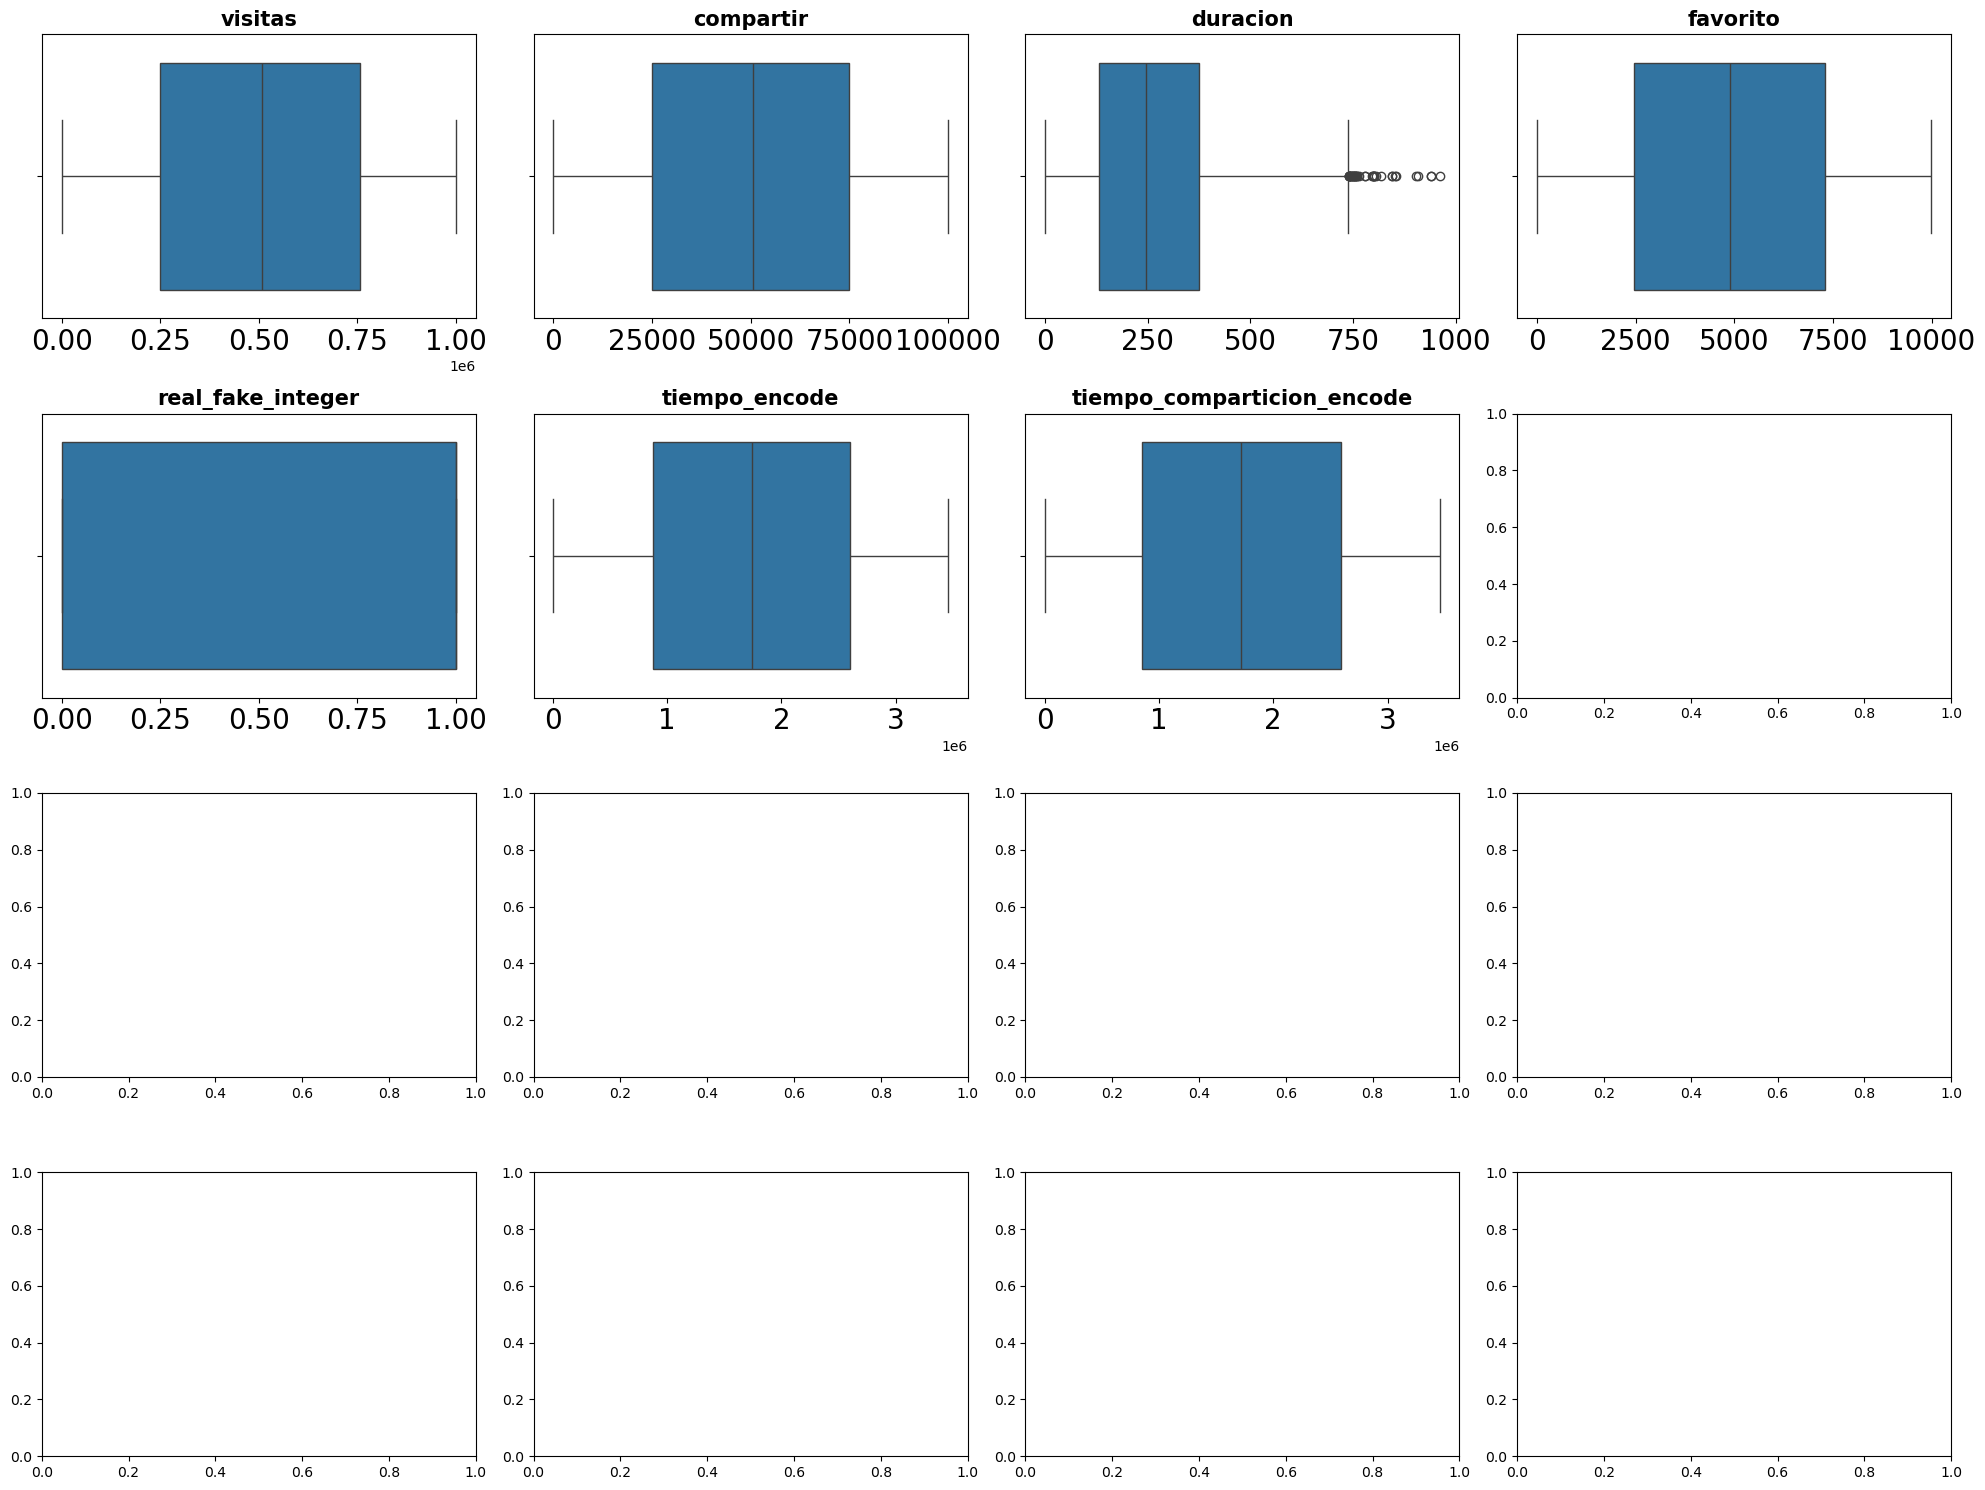

In [311]:
columnas = df_numericas.columns

fig, ax= plt.subplots(4, 4, figsize=(20, 15))

ax = ax.flat
for i, col in enumerate(columnas):
    sns.boxplot(x=df_numericas[col], ax=ax[i])
    ax[i].set_title(col, fontsize = 15, fontweight = "bold")
    ax[i].tick_params(labelsize = 20)
    ax[i].set_xlabel("")


fig.tight_layout()
plt.show()

Hay outliers en duración

#### Se crea df sin outliers

In [312]:
# se crea df sin outliers

df_sin_outliers = df_noticias[(df_noticias['duracion'] <= lim_sup['duracion']) & (df_noticias['duracion'] >= lim_inf['duracion'])]

print(f"Cantidad outliers en duración: {len(df_noticias) - len(df_sin_outliers)}")
df_sin_outliers.shape[0]

Cantidad outliers en duración: 9


6324

## Correlaciones

In [313]:
# Se añade real_fake como variable numérica y se crea un dataframe a parte para ver las correlaciones pues no se quiere que la nueva columna se meta en el modelo sin querer
df_noticias_corr = df_noticias[:]

df_noticias_corr['real_fake_integer'] = df_fake_real['real_fake'].map({'REAL': 1, 'FAKE': 0})
pd.concat([df_fake_real, df_noticias_corr['real_fake_integer']], axis=1)

real_fake id_noticia  real_fake_integer
0         FAKE       8476                0.0
1         FAKE      10294                0.0
2         REAL       3608                1.0
3         FAKE      10142                0.0
4         REAL        875                1.0
...        ...        ...                ...
6330      REAL       4490                1.0
6331      FAKE       8062                0.0
6332      FAKE       8622                0.0
6333      REAL       4021                1.0
6334      REAL       4330                1.0

[6335 rows x 3 columns]

In [314]:
corr = df_noticias_corr.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

In [315]:
df_noticias_corr.corr(numeric_only=True)

visitas  compartir  duracion  favorito  \
visitas                     1.000000   0.002474 -0.010170  0.005296   
compartir                   0.002474   1.000000  0.015824  0.020300   
duracion                   -0.010170   0.015824  1.000000 -0.005498   
favorito                    0.005296   0.020300 -0.005498  1.000000   
real_fake_integer          -0.014063   0.014992  0.000471 -0.008971   
real_fake_bool             -0.014063   0.014992  0.000471 -0.008971   
tiempo_encode              -0.005567  -0.006573  0.000152 -0.005279   
tiempo_comparticion_encode  0.005898   0.001763 -0.012006  0.018308   

                            real_fake_integer  real_fake_bool  tiempo_encode  \
visitas                             -0.014063       -0.014063      -0.005567   
compartir                            0.014992        0.014992      -0.006573   
duracion                             0.000471        0.000471       0.000152   
favorito                            -0.008971       -0.008971      -0.005279   
real_fake_integer                    1.000000        1.000000       0.016882   
real_fake_bool                       1.000000        1.000000       0.016882   
tiempo_encode                        0.016882        0.016882       1.000000   
tiempo_comparticion_encode           0.006984        0.006984       0.027848   

                            tiempo_comparticion_encode  
visitas                                       0.005898  
compartir                                     0.001763  
duracion                                     -0.012006  
favorito                                      0.018308  
real_fake_integer                             0.006984  
real_fake_bool                                0.006984  
tiempo_encode                                 0.027848  
tiempo_comparticion_encode                    1.000000

In [316]:
# Real_fake_bool no funciona en las correlaciones (devuelve Nan)
df_noticias['real_fake_bool'] = df_fake_real['real_fake'].astype(bool)

Habría que visualizar la distribución de las variables y también visualizar con un df sin outliers para ver como cambian las relaciones

## Distribucion de las variables

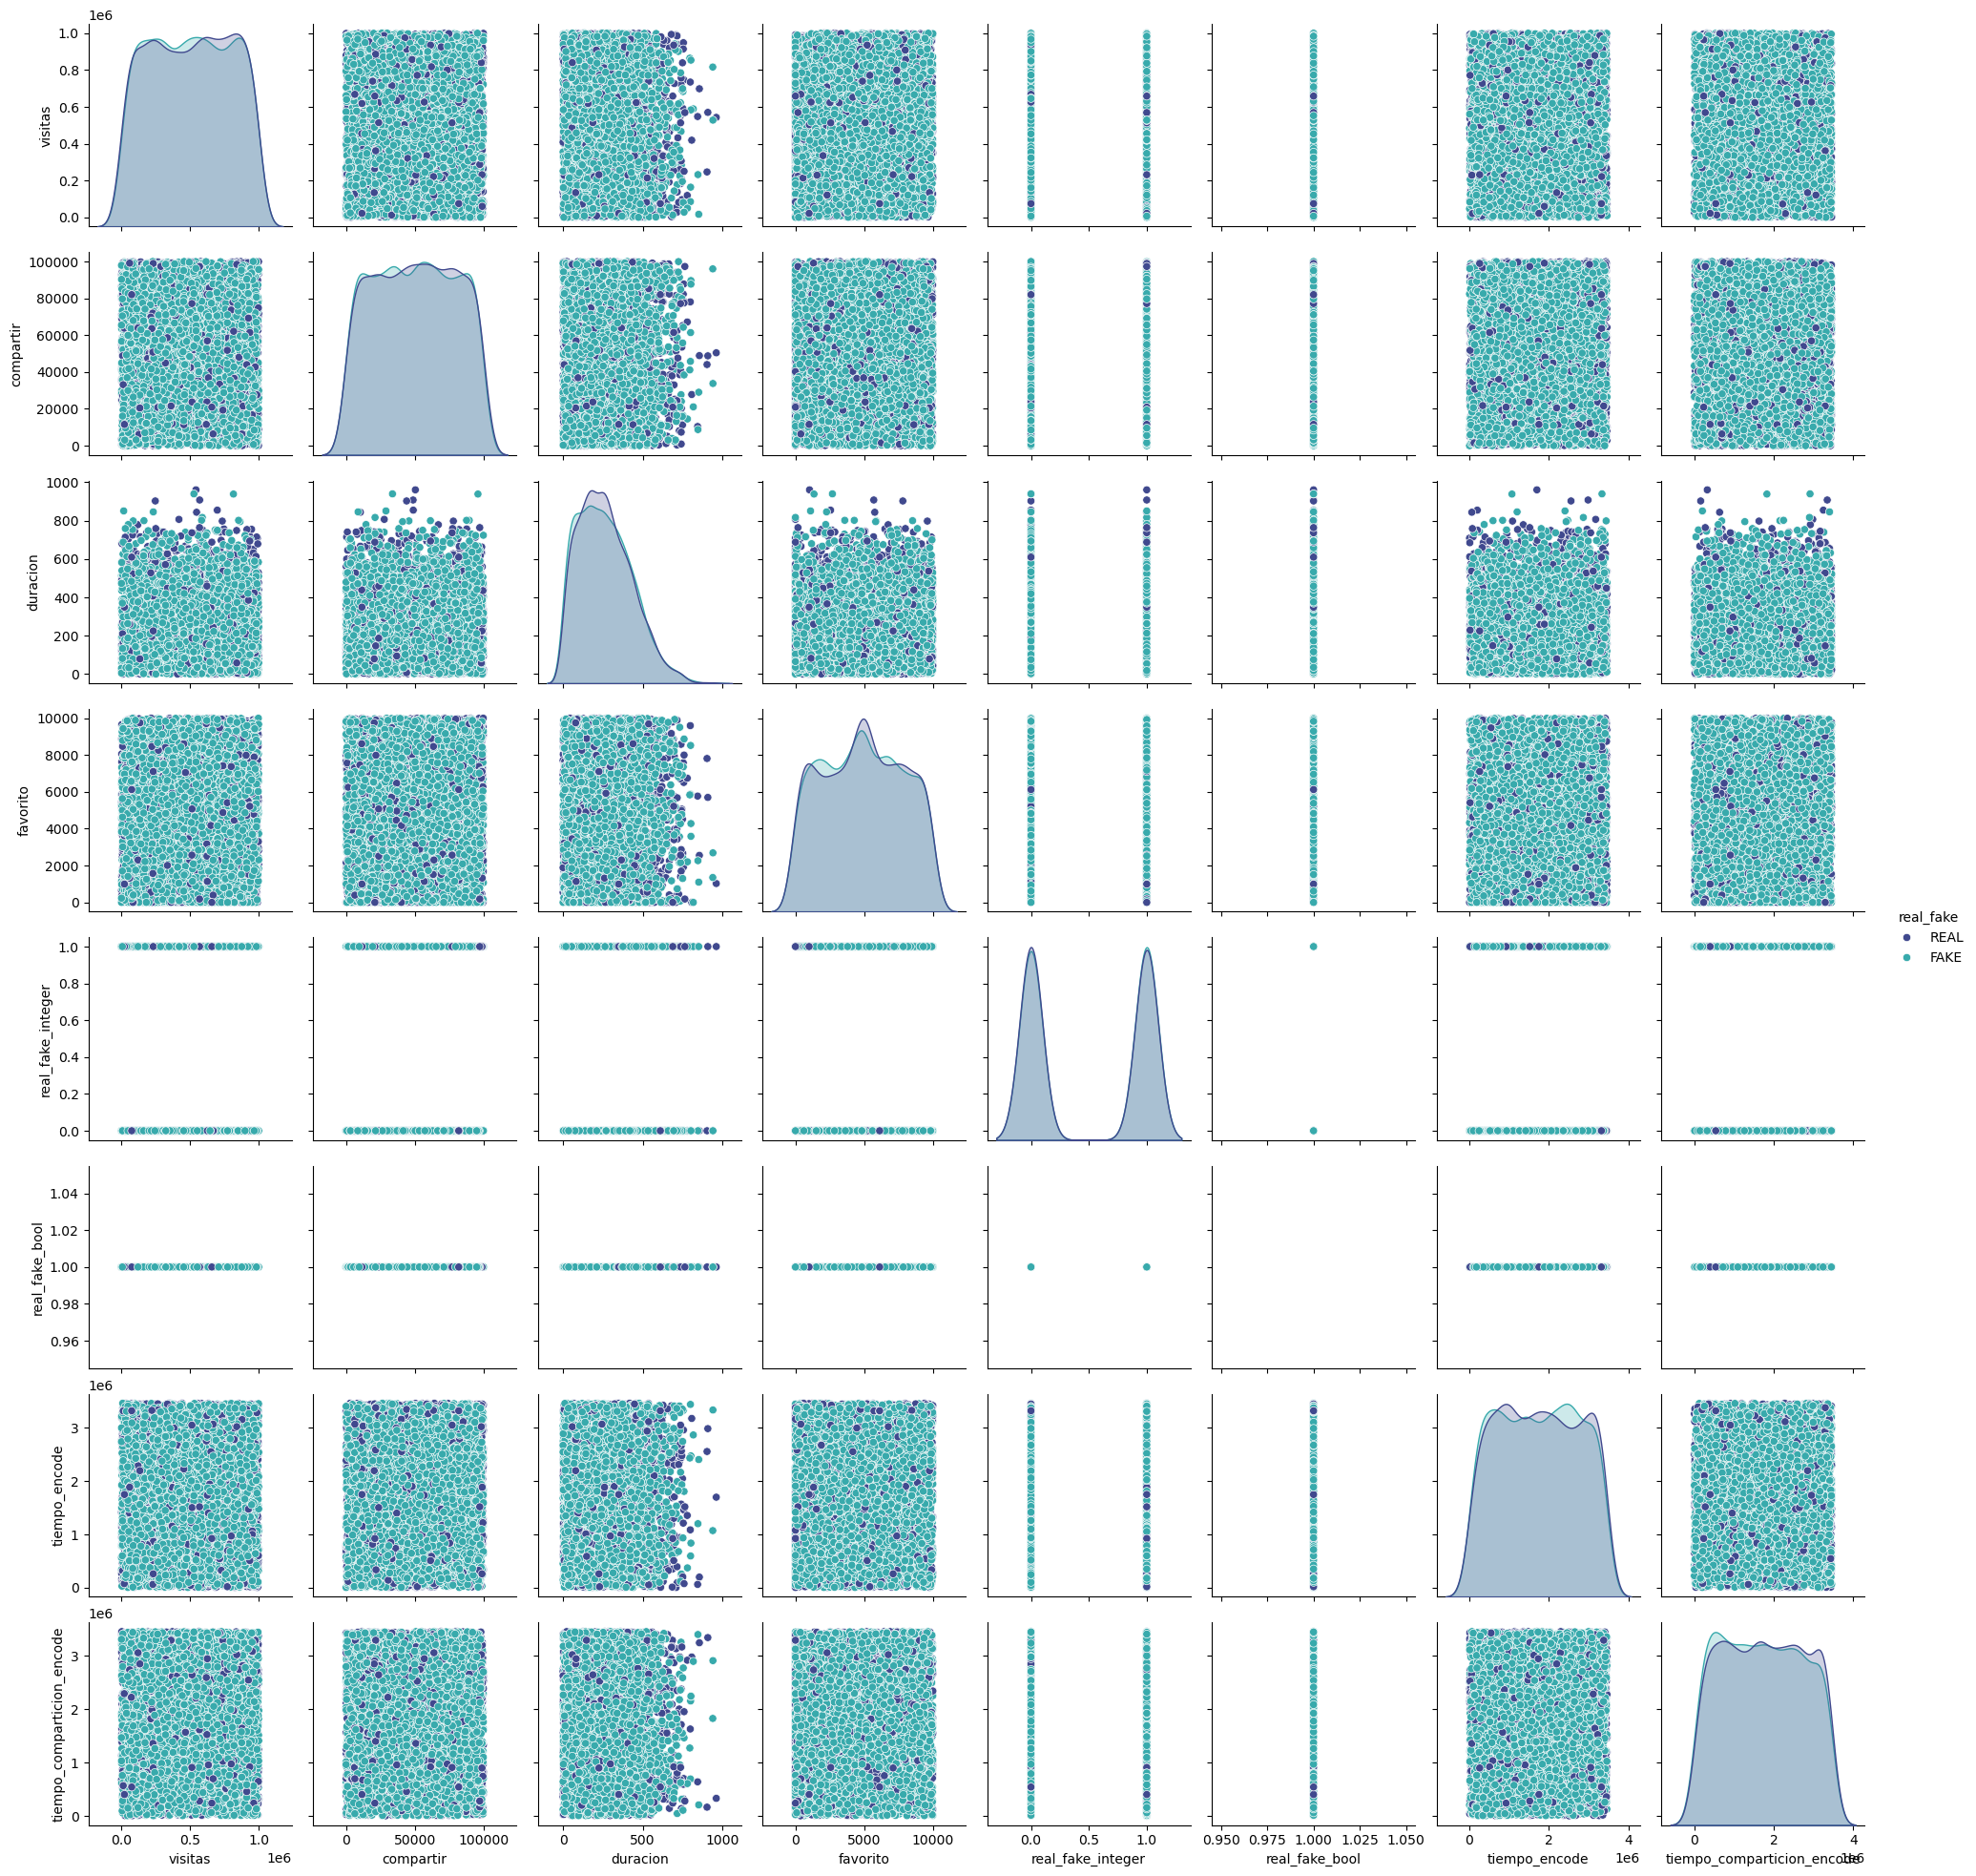

In [317]:
sns.pairplot(df_noticias, hue="real_fake", palette="mako", diag_kind="kde")
plt.show()

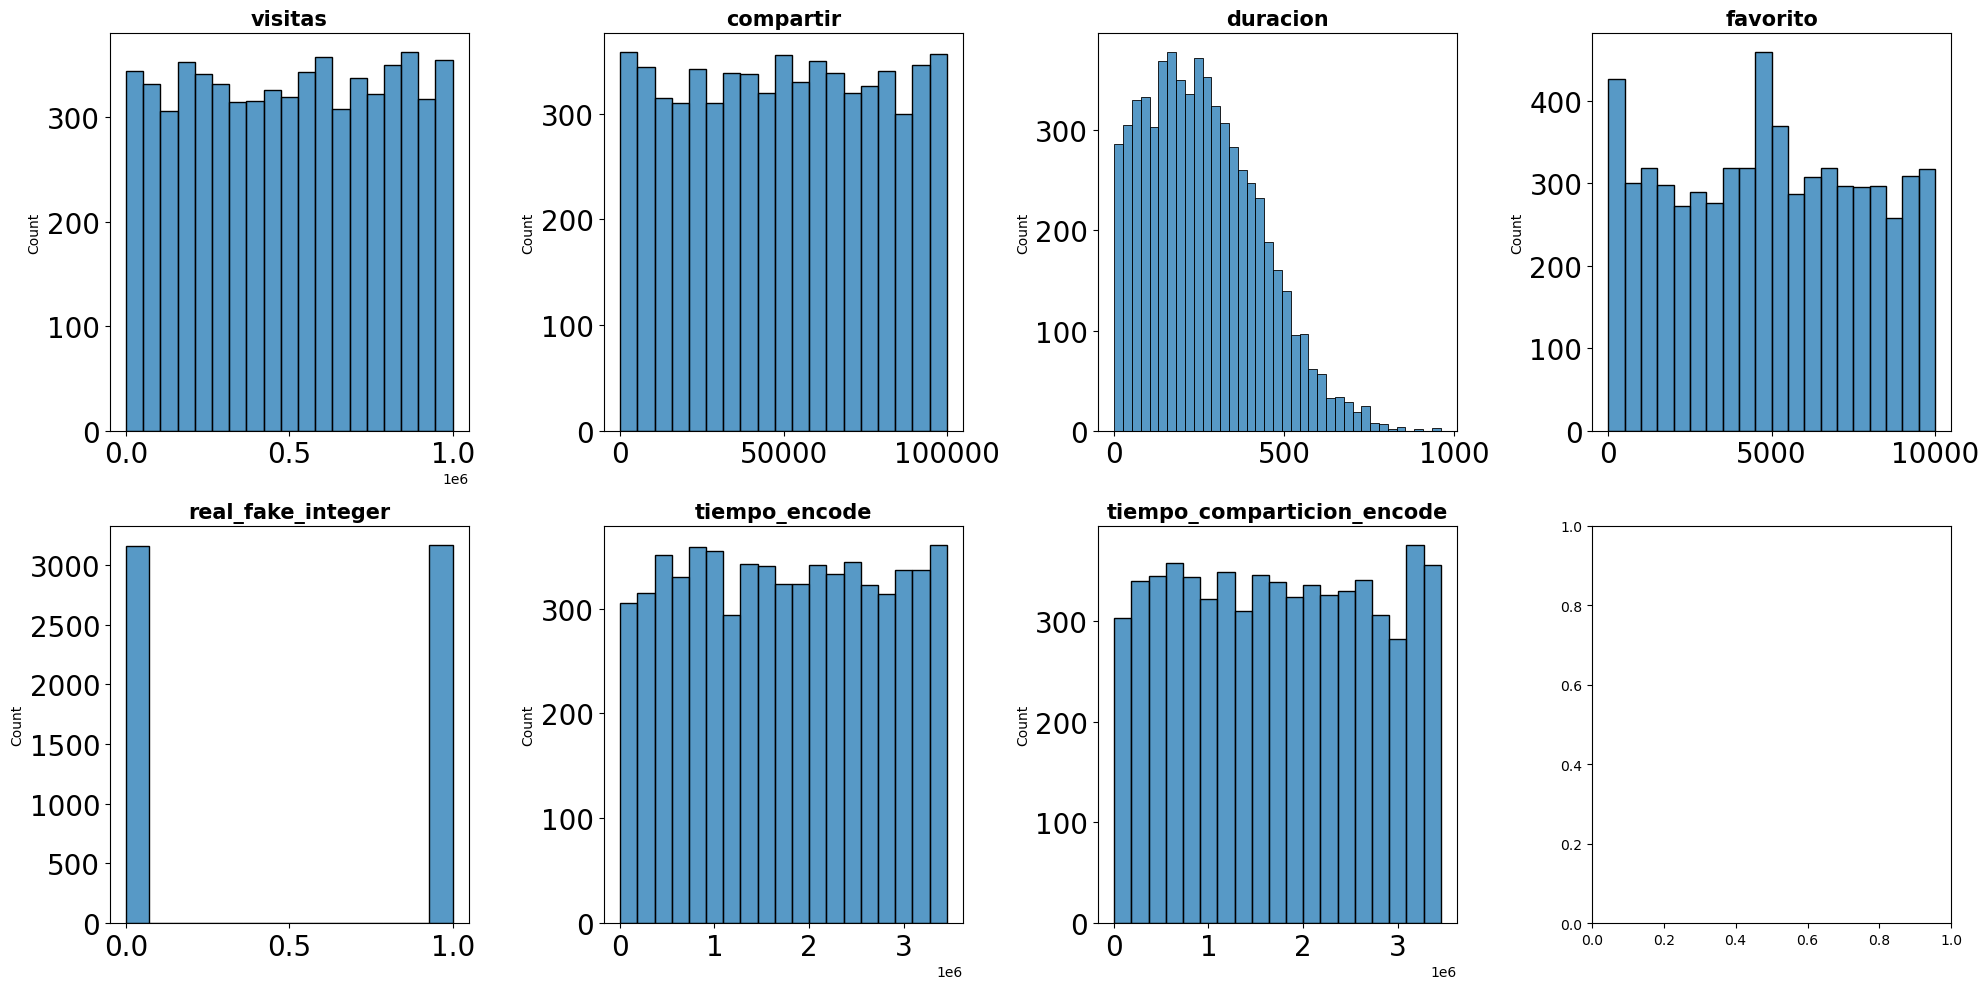

In [318]:
columnas = df_numericas.columns

fig, ax= plt.subplots(2, 4, figsize=(20, 10))

ax = ax.flat
for i, col in enumerate(columnas):
    sns.histplot(x=df_numericas[col], ax=ax[i])
    ax[i].set_title(col, fontsize = 15, fontweight = "bold")
    ax[i].tick_params(labelsize = 20)
    ax[i].set_xlabel("")


fig.tight_layout()
plt.show()

# Calculo tamaño textos  
Calcular el tamaño máximo de caracteres de columnas categóricas para meter en la base de datos

### Cont_texto

In [319]:
tamano_textos = df_noticias['cont_texto'].apply(len)
print(tamano_textos.head(3))
print()

max_texto = df_noticias['cont_texto'].apply(len).max()
print(f"Maximo tamaño en los textos {max_texto}")
print()

indice_max_texto = df_contenido['cont_texto'].apply(len).idxmax()
print(f"Indice del texto con mayor longitud {indice_max_texto}")
print()

print(f"Id de la noticia con más longitud {df_noticias['id_noticia'].iloc[indice_max_texto]}")
print()

# print(f"Texto de mayor longitud\n {df_noticias['cont_texto'].iloc[indice_max_texto]}")

0    6507
1    6568
2    1892
Name: cont_texto, dtype: int64

Maximo tamaño en los textos 112017

Indice del texto con mayor longitud 4733

Id de la noticia con más longitud 7614



### Cont_titulo

In [320]:
tamano_textos = df_noticias['cont_titulo'].apply(len)
print(tamano_textos.head(3))
print()

max_texto = df_noticias['cont_titulo'].apply(len).max()
print(f"Maximo tamaño en los titulos {max_texto}")
print()

indice_max_texto = df_noticias['cont_titulo'].apply(len).idxmax()
print(f"Indice del título con mayor longitud {indice_max_texto}")
print()

print(f"id del titulo con más longitud {df_noticias['id_noticia'].iloc[indice_max_texto]}")
print()

0    83
1    53
2    37
Name: cont_titulo, dtype: int64

Maximo tamaño en los titulos 289

Indice del título con mayor longitud 5694

id del titulo con más longitud 9069



### Autor

In [321]:
tamano_textos = df_noticias['autor'].apply(len)
print(tamano_textos.head(3))
print()

max_texto = df_noticias['autor'].apply(len).max()
print(f"Maximo tamaño en los autores {max_texto}")
print()

indice_max_texto = df_noticias['autor'].apply(len).idxmax()
print(f"Indice del autor con mayor longitud {indice_max_texto}")
print()

print(f"id de autor con más longitud {df_noticias['id_noticia'].iloc[indice_max_texto]}")
print()

0     7
1    10
2     9
Name: autor, dtype: int64

Maximo tamaño en los autores 15

Indice del autor con mayor longitud 5

id de autor con más longitud 10008



### Fuente

In [322]:
tamano_textos = df_noticias['fuente'].apply(len)
print(tamano_textos.head(3))
print()

max_texto = df_noticias['fuente'].apply(len).max()
print(f"Maximo tamaño en las fuentes {max_texto}")
print()

indice_max_texto = df_noticias['fuente'].apply(len).idxmax()
print(f"Indice de fuente con mayor longitud {indice_max_texto}")
print()

print(f"Identificador de la fuente con más longitud {df_noticias['id_noticia'].iloc[indice_max_texto]}")
print()

0    11
1     8
2     8
Name: fuente, dtype: int64

Maximo tamaño en las fuentes 19

Indice de fuente con mayor longitud 18

Identificador de la fuente con más longitud 10028



### Tipo

In [323]:
tamano_textos = df_noticias['tipo'].apply(len)
print(tamano_textos.head(3))
print()

max_texto = df_noticias['tipo'].apply(len).max()
print(f"Maximo tamaño en los tipo {max_texto}")
print()

indice_max_texto = df_noticias['tipo'].apply(len).idxmax()
print(f"Indice de tipo con mayor longitud {indice_max_texto}")
print()

print(f"id de la noticia del tipo con más longitud {df_noticias['id_noticia'].iloc[indice_max_texto]}")
print()

0    10
1    18
2     6
Name: tipo, dtype: int64

Maximo tamaño en los tipo 25

Indice de tipo con mayor longitud 20

id de la noticia del tipo con más longitud 1003



# Calculo tamaño métricas

In [324]:
visitas = df_noticias['visitas'].apply(lambda x: len(str(x)))
print(f"Cantidad dígitos máximos visitas {visitas.max()}")

favorito = df_noticias['favorito'].apply(lambda x: len(str(x)))
print(f"Cantida digitos máximos favorito {favorito.max()}")

duracion = df_noticias['duracion'].apply(lambda x: len(str(x)))
print(f"Cantidad digitos máximos duracion {duracion.max()}")

compartir = df_noticias['compartir'].apply(lambda x: len(str(x)))
print(f"Cantidad digitos máximos compartir {compartir.max()}")

Cantidad dígitos máximos visitas 6
Cantida digitos máximos favorito 4
Cantidad digitos máximos duracion 3
Cantidad digitos máximos compartir 5


In [325]:
print(f"Cantidad de dígitos\n{visitas}")
print(df_noticias['visitas'].head(4))

Cantidad de dígitos
0       5
1       6
2       6
3       6
4       6
       ..
6330    6
6331    6
6332    6
6333    6
6334    6
Name: visitas, Length: 6333, dtype: int64
0     24881
1    737334
2    563200
3    883120
Name: visitas, dtype: int64


# Identificaciones de errores e incidencias  
* Una columna no puede tener más de 2.500 caracteres.  
* El tiempo de lectura no puede ser mayor a 20 minutos.  
* No se publican más de 50 noticias al día.  
* Una misma fuente no publica noticias más de dos idiomas distintos.

### Tiempo de lectura y cantidad de caracteres

In [326]:
# COMPROBACIÓN POR CONDICIONES:
resultado_falsedad = []

for i, fila in df_noticias.iterrows():
  if isinstance(fila['cont_texto'], str) and len(fila['cont_texto']) < 2500 and (fila['duracion']) < 20:
    resultado_falsedad.append(fila['real_fake'])

# print(resultado_falsedad)

In [327]:
df_noticias['duracion'].describe()
# Se entiende que duración está en segundos

count    6333.000000
mean      263.043265
std       166.960550
min         0.000000
25%       132.000000
50%       246.000000
75%       374.000000
max       961.000000
Name: duracion, dtype: float64

In [328]:
# Se crea df de apoyo para contar la cantidad de caracteres de cada registro y la duracion en minutos
df_sin_incidencias = df_noticias[:]

df_sin_incidencias['cantidad_caracteres'] = df_sin_incidencias['cont_texto'].apply(len)
# df_sin_incidencias['duracion'] = pd.to_timedelta(df_sin_incidencias['duracion'], unit='second')
df_sin_incidencias['duracion_minutos'] = df_sin_incidencias['duracion'] / 60

###### Como duración esta en segundos se ha calculado una columna con la duracion en minutos

# Cantidad de registros que pasan el filtro de errores e incidencias
df_sin_incidencias = df_sin_incidencias[((isinstance(df_sin_incidencias['cont_texto'], str)) | (df_sin_incidencias['cantidad_caracteres'] <2500)) & (df_sin_incidencias['duracion_minutos'] < 20)]

print(len(df_sin_incidencias[((isinstance(df_sin_incidencias['cont_texto'], str)) | (df_sin_incidencias['cantidad_caracteres'] <=2500)) & (df_sin_incidencias['duracion_minutos'] <= 20)]))

2327


C:\Users\lcc00\AppData\Local\Temp\ipykernel_22300\2691579412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_incidencias['cantidad_caracteres'] = df_sin_incidencias['cont_texto'].apply(len)
C:\Users\lcc00\AppData\Local\Temp\ipykernel_22300\2691579412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_incidencias['duracion_minutos'] = df_sin_incidencias['duracion'] / 60


In [329]:
df_sin_incidencias[['duracion','cantidad_caracteres','duracion_minutos']].sample(5)

duracion  cantidad_caracteres  duracion_minutos
174        475                 2110          7.916667
4530       323                 2187          5.383333
4268        11                 1079          0.183333
3443        83                  114          1.383333
352        150                 1135          2.500000

In [330]:
# Comprobacion de si se ha hecho el df sin incidencias bien
print(df_sin_incidencias['duracion_minutos'].max())
print(df_sin_incidencias['cantidad_caracteres'].max())

15.666666666666666
2497


### Comprobación de "no se pueden publicar más de 50 noticias al día"

In [331]:
# Se crean columna anio, mes, dia, hora de tiempo y compartir_tiempo para codificación al meter los datos en el modelo
df_noticias['anio_publicacion'] = df_noticias['tiempo'].dt.year
df_noticias['mes_publicacion'] = df_noticias['tiempo'].dt.month
df_noticias['dia_publicacion'] = df_noticias['tiempo'].dt.day
df_noticias['hora_publicacion'] = df_noticias['tiempo'].dt.hour


df_noticias['anio_comparticion'] = df_noticias['compartir_tiempo'].dt.year
df_noticias['mes_comparticion'] = df_noticias['compartir_tiempo'].dt.month
df_noticias['dia_comparticion'] = df_noticias['compartir_tiempo'].dt.day
df_noticias['hora_comparticion'] = df_noticias['compartir_tiempo'].dt.hour

# Según el control de incidencias y errores no se pueden publicar más de 50 noticias al día
# Se visualizan la cantidad de noticias publicadas por día

df_noticias.groupby(['mes_publicacion','dia_publicacion']).agg(noticias_por_dia = ('id_noticia','count')).sort_values(by='noticias_por_dia', ascending=False).reset_index()

mes_publicacion  dia_publicacion  noticias_por_dia
0                 9                5               322
1                 9                6               285
2                 9                3               282
3                 9                2               279
4                 9                4               279
5                 9                7               279
6                 9                8               268
7                 9                9               261
8                 9               10               258
9                 9               11               243
10                9               12               236
11                9               13               206
12                9               14               205
13                9               16               202
14                9               15               192
15                9               17               183
16                9               20               180
17                9                1               178
18                9               18               167
19                9               21               164
20                9               19               153
21                9               24               148
22                9               23               143
23                9               25               134
24                9               22               132
25                9               27               120
26                9               26               109
27                9               30               107
28                9               29                97
29                9               28                95
30               10                1                82
31               10                3                59
32               10                2                55
33               10                5                49
34               10                6                45
35               10                4                41
36               10                7                40
37               10                8                24
38               10                9                21
39               10               10                10

In [332]:
# Una misma fuente no publica noticias más de dos idiomas distintos.
df_noticias.groupby('fuente').agg(cantidad_idiomas=('idioma','nunique')).reset_index()

fuente  cantidad_idiomas
0       Capital Gazette                 1
1         Central Times                 1
2             City Beat                 1
3            City Times                 1
4          Daily Beacon                 1
5          Daily Digest                 1
6             Echo News                 1
7          Evening Echo                 1
8       Express Tribune                 1
9       Frontline Times                 1
10       Global Gazette                 1
11       Global Insight                 1
12     Insider Insights                 1
13           Metro News                 1
14         Morning Star                 1
15     National Courier                 1
16            Newsflash                 1
17             Newsline                 1
18          Press Pulse                 1
19        Star Sentinel                 1
20    Sunrise Chronicle                 1
21        The Chronicle                 1
22   The Daily Dispatch                 1
23   The Herald Tribune                 1
24         The Informer                 1
25          The Insight                 1
26         The Observer                 1
27            The Pulse                 1
28         The Reporter                 1
29          Times Today                 1
30           Urban News                 1
31  Voice of the Nation                 1
32   World News Network                 1

# Guardar csv

Cambios para la base de datos:  
- Se crea df_noticias_base_de_datos  
- Pasar id_noticia a entero  
- Eliminar real_fake_bool  
- Se crea real_fake_integer  
- Se elimina real_fake para solo tener esa columna en numérico

### Para la base de datos con duplicados y outliers
Se eliminan columnas tiempo_encode y tiempo_comparticion_encode no necesarias en la BD

In [333]:
# Se crea un dataframe df_noticias_base_de_datos
df_noticias_base_de_datos = df_noticias[:]

# Se cambia el tipo de dato de id_noticia a entero para ordenar en la base de datos
df_noticias_base_de_datos['id_noticia'] = df_noticias_base_de_datos['id_noticia'].astype('int64')

# Se elimina la columna real_fake_bool y real_fake
df_noticias_base_de_datos = df_noticias_base_de_datos.drop(columns='real_fake')
df_noticias_base_de_datos = df_noticias_base_de_datos.drop(columns='real_fake_bool')
df_noticias_base_de_datos = df_noticias_base_de_datos.drop(columns='tiempo_encode')
df_noticias_base_de_datos = df_noticias_base_de_datos.drop(columns='tiempo_comparticion_encode')

In [334]:
print(df_noticias_base_de_datos.shape)
df_noticias_base_de_datos.columns

(6333, 23)


Index(['id_noticia', 'cont_titulo', 'cont_texto', 'compartir_tiempo', 'autor',
       'fuente', 'visitas', 'compartir', 'duracion', 'favorito', 'pais',
       'idioma', 'tiempo', 'tipo', 'real_fake_integer', 'anio_publicacion',
       'mes_publicacion', 'dia_publicacion', 'hora_publicacion',
       'anio_comparticion', 'mes_comparticion', 'dia_comparticion',
       'hora_comparticion'],
      dtype='object')

### Sin duplicados

In [335]:
# Se hace lo mismo para df_noticias_sin_duplicados

# Se cambia el tipo de dato de id_noticia a entero
df_noticias_sin_duplicados['id_noticia'] = df_noticias_sin_duplicados['id_noticia'].astype('int64')

### Sin outliers

In [336]:
# Se cambia el tipo de dato de id_noticia a entero
df_sin_outliers['id_noticia'] = df_sin_outliers['id_noticia'].astype('int64')
print(df_sin_outliers['id_noticia'].dtype)

int64


C:\Users\lcc00\AppData\Local\Temp\ipykernel_22300\226567028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers['id_noticia'] = df_sin_outliers['id_noticia'].astype('int64')


### Sin incidencias

In [337]:
print(df_sin_incidencias.shape)
print(df_sin_incidencias.columns)

(2327, 21)
Index(['id_noticia', 'cont_titulo', 'cont_texto', 'compartir_tiempo',
       'real_fake', 'autor', 'fuente', 'visitas', 'compartir', 'duracion',
       'favorito', 'pais', 'idioma', 'tiempo', 'tipo', 'real_fake_integer',
       'real_fake_bool', 'tiempo_encode', 'tiempo_comparticion_encode',
       'cantidad_caracteres', 'duracion_minutos'],
      dtype='object')


### Sin incidencias ni duplicados

In [338]:
duplicados_incidencias = df_sin_incidencias[(df_sin_incidencias['cont_texto'].duplicated()) | (df_sin_incidencias['cont_titulo'].duplicated())]
print(f"Duplicados en texto o titulo {len(duplicados_incidencias)}")

Duplicados en texto o titulo 256


In [339]:
duplicados_incidencias.index

Index([ 123,  199,  242,  263,  475,  508,  518,  519,  532,  535,
       ...
       6047, 6087, 6113, 6116, 6150, 6196, 6207, 6233, 6263, 6317],
      dtype='int64', length=256)

In [340]:
df_sin_incidencias_duplicados = df_sin_incidencias.drop(duplicados_incidencias.index, axis=0)
print(df_sin_incidencias_duplicados.shape)

(2071, 21)


### Se crean los csv para diferentes propósitos

In [341]:
# csv para seguir trabajando
df_noticias.to_csv("Noticias.csv", index=False, sep='|')
# df_noticias.to_csv("Noticias.zip", sep="|", index=False, compression="zip") # Usar esta opción si los csv pesan mucho

# csv para la base de datos
df_noticias_base_de_datos.to_csv("NoticiasBD.csv", index=False, sep='|')
# df_noticias_base_de_datos.to_csv("NoticiasBD.zip", sep="|", index=False, compression="zip") # Usar esta opción si los csv pesan mucho

# Sin duplicados
# df_noticias_sin_duplicados.to_csv("Noticias_sin_duplicados.csv", index=False, sep='|')
df_noticias_sin_duplicados.to_csv("Noticias_sin_duplicados.csv", sep="|", index=False) # Usar esta opción si los csv pesan mucho

# Sin outliers
# df_sin_outliers.to_csv("Noticias_sin_outliers.csv", index=False, sep='|')
df_sin_outliers.to_csv("Noticias_sin_outliers.zip", sep="|", index=False, compression="zip") # Usar esta opción si los csv pesan mucho

# Sin incidencias
df_sin_incidencias.to_csv('Noticias_sin_incidencias.csv', sep="|", index=False)

# Sin incidencias ni duplicados
df_sin_incidencias_duplicados.to_csv("df_limpio.csv", sep='|', index=False)


# Para leer los archivos zip usar:
# df_noticias = pd.read_csv("Noticias.zip", sep="|", compression="zip")

Noticias y NoticiasBD se guandan en formato csv, noticias_sin_duplicados y noticias_sin_ouliers se guardan en formato zip.

In [342]:
# Comprobación
print(df_noticias.shape)
print(df_sin_outliers.shape)
print(df_noticias_base_de_datos.shape)
print(df_noticias_sin_duplicados.shape)
print(df_sin_incidencias.shape)

(6333, 27)
(6324, 19)
(6333, 23)
(6008, 19)
(2327, 21)


# Comprobaciones a limpiar

In [1080]:
raise Exception("Eliminar esta sección de pruebas")

Exception: Eliminar esta sección de pruebas

In [ ]:
# Ver la codificación de una cadena en Python
string = "tu cadena aquí"
encoded_string = string.encode('utf-8')
print(len(encoded_string))  # Longitud en bytes
print(len(string))  # Longitud en caracteres

In [ ]:
# eliminar espacios en blanco
import re

string = "tu cadena aquí"
cleaned_string = re.sub(r'\s+', '', string)  # Elimina todos los espacios en blanco
print(len(cleaned_string))

In [ ]:
# Contat cantidad de espacios en blanco de los textos
print(df_noticias['cont_texto'].str.count('\n'))
print(df_noticias['cont_texto'].str.count('\n').sum())

# Comprobación
print(df_noticias['cont_texto'].iloc[1])

In [5]:
# Prueba compresion csv
import pandas as pd

df_noticias = pd.read_csv("Noticias.csv", sep="|")
df_noticias.head(1)

id_noticia                                        cont_titulo  \
0          10  Scalia’s death comes just a month before the c...   

                                          cont_texto     compartir_tiempo  \
0  The unexpected death of Justice Antonin Scalia...  2022-09-08 14:00:00   

  real_fake    autor       fuente  visitas  compartir  duracion  ...  \
0      REAL  Zoe Lee  The Insight    24881      59275       558  ...   

   tiempo_encode tiempo_comparticion_encode anio_publicacion mes_publicacion  \
0         540000                     630000             2022               9   

  dia_publicacion  hora_publicacion  anio_comparticion  mes_comparticion  \
0               7                13               2022                 9   

   dia_comparticion  hora_comparticion  
0                 8                 14  

[1 rows x 27 columns]

In [ ]:
df.to_csv("noticias_de_prueba.zip", sep="|", index=False, compression="zip")

In [ ]:
df_noticias = pd.read_csv("noticias_de_prueba.zip", sep="|", compression="zip")
df_noticias.head(1)

## trabajando en las incidencias (no se publicarán más de 50 noticias al dia)

In [618]:
# Se crea df de apoyo para contar la cantidad de caracteres de cada registro y la duracion en minutos
df_sin_incidencias = df_noticias_sin_duplicados[:]

df_sin_incidencias['cantidad_caracteres'] = df_sin_incidencias['cont_texto'].apply(len)
# df_sin_incidencias['duracion'] = pd.to_timedelta(df_sin_incidencias['duracion'], unit='second')
df_sin_incidencias['duracion_minutos'] = df_sin_incidencias['duracion'] / 60

###### Como duración esta en segundos se ha calculado una columna con la duracion en minutos

# Cantidad de registros que pasan el filtro de errores e incidencias
df_sin_incidencias = df_sin_incidencias[((isinstance(df_sin_incidencias['cont_texto'], str)) | (df_sin_incidencias['cantidad_caracteres'] <2500)) & (df_sin_incidencias['duracion_minutos'] < 20)]

print(len(df_sin_incidencias[((isinstance(df_sin_incidencias['cont_texto'], str)) | (df_sin_incidencias['cantidad_caracteres'] <=2500)) & (df_sin_incidencias['duracion_minutos'] <= 20)]))

2058


C:\Users\lcc00\AppData\Local\Temp\ipykernel_24432\1385444162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_incidencias['cantidad_caracteres'] = df_sin_incidencias['cont_texto'].apply(len)
C:\Users\lcc00\AppData\Local\Temp\ipykernel_24432\1385444162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_incidencias['duracion_minutos'] = df_sin_incidencias['duracion'] / 60


In [625]:
df_sin_incidencias[['duracion','cantidad_caracteres','duracion_minutos']].sample(5)

duracion  cantidad_caracteres  duracion_minutos
3821        91                 1106          1.516667
3988       219                  981          3.650000
4205       277                 1880          4.616667
5803       478                 2003          7.966667
5534        98                  749          1.633333

In [626]:
# Comprobacion de si se ha hecho el df sin incidencias bien
print(df_sin_incidencias['duracion_minutos'].max())
print(df_sin_incidencias['cantidad_caracteres'].max())

15.666666666666666
2497


In [628]:
# Se crean columna anio, mes, dia, hora de tiempo y compartir_tiempo para codificación al meter los datos en el modelo
df_sin_incidencias['anio_publicacion'] = df_sin_incidencias['tiempo'].dt.year
df_sin_incidencias['mes_publicacion'] = df_sin_incidencias['tiempo'].dt.month
df_sin_incidencias['dia_publicacion'] = df_sin_incidencias['tiempo'].dt.day
df_sin_incidencias['hora_publicacion'] = df_sin_incidencias['tiempo'].dt.hour


df_sin_incidencias['anio_comparticion'] = df_sin_incidencias['compartir_tiempo'].dt.year
df_sin_incidencias['mes_comparticion'] = df_sin_incidencias['compartir_tiempo'].dt.month
df_sin_incidencias['dia_comparticion'] = df_sin_incidencias['compartir_tiempo'].dt.day
df_sin_incidencias['hora_comparticion'] = df_sin_incidencias['compartir_tiempo'].dt.hour

# Según el control de incidencias y errores no se pueden publicar más de 50 noticias al día
# Se visualizan la cantidad de noticias publicadas por día

df_sin_incidencias.groupby(['mes_publicacion','dia_publicacion']).agg(noticias_por_dia = ('id_noticia','count')).sort_values(by='noticias_por_dia', ascending=False).reset_index()

mes_publicacion  dia_publicacion  noticias_por_dia
0                 9                5               102
1                 9                9                99
2                 9                6                98
3                 9                4                95
4                 9                2                91
5                 9                7                90
6                 9               10                90
7                 9                8                83
8                 9               11                83
9                 9                3                79
10                9               14                76
11                9               12                73
12                9               13                72
13                9               16                68
14                9               17                63
15                9               20                63
16                9                1                58
17                9               21                55
18                9               15                52
19                9               19                50
20                9               18                50
21                9               22                48
22                9               23                47
23                9               24                47
24                9               25                39
25                9               27                34
26                9               28                33
27                9               30                29
28                9               29                28
29                9               26                25
30               10                1                25
31               10                2                24
32               10                3                21
33               10                6                21
34               10                7                14
35               10                5                10
36               10                4                 9
37               10                9                 5
38               10               10                 5
39               10                8                 4